In [ ]:
# first steps of the analysis.
import pandas as pd
from google.colab import drive
# Mount Google Drive & get path
drive.mount('/content/drive')
dataset_path = '/content/drive/MyDrive/ML-1/Dataset2Use_Assignment1.xlsx'
data = pd.read_excel(dataset_path)

# Display the first rows  to understand our structure
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


365* ( Β.Υ / Κοστ.Πωλ )  Λειτ.Αποτ/Συν.Ενεργ. (ROA)  \
0              1014.128862                    0.011751   
1               561.974631                    0.099662   
2               826.919025                    0.009594   
3               493.176956                    0.196284   
4               100.421465                    0.179038   

   ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ   ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ  \
0                 0.038505                                        0.965479   
1                 0.015775                                        1.415467   
2                 0.093562                                        1.575034   
3                 0.000581                                        1.346780   
4                 0.000173                                        3.299687   

   (ΑΠΑΙΤ.*365) / ΠΩΛ.  Συν.Υποχρ/Συν.Ενεργ  Διάρκεια Παραμονής Αποθεμάτων  \
0           567.866550             0.532258                     545.195964   
1           335.917481             0.660556                       7.950910   
2           350.618086             0.550912                      28.602221   
3           414.508709             0.683717                       1.216888   
4           118.548381             0.254496                      52.346321   

   Λογαριθμος Προσωπικού  ΕΝΔΕΙΞΗ ΕΞΑΓΩΓΩΝ  ΕΝΔΕΙΞΗ ΕΙΣΑΓΩΓΩΝ  \
0               0.301030                 0                  1   
1               1.176091                 1                  1   
2               1.204120                 0                  1   
3               1.431364                 0                  0   
4               1.518514                 0                  1   

   ΕΝΔΕΙΞΗ ΑΝΤΙΠΡΟΣΩΠΕΙΩΝ  ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)  ΕΤΟΣ  
0                       0                              1  2006  
1                       1                              1  2006  
2                       1                              1  2006  
3                       0                              1  2006  
4                       1                              1  2006

In [ ]:
# Checking for missing values in the dataset
missing_values = data.isnull().sum()

# Display the columns with missing values and their counts
missing_values[missing_values > 0]

Series([], dtype: int64)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Excluding the 'ΕΤΟΣ' and 'ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)' columns from normalization
columns_to_normalize = data.columns.drop(['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)', 'ΕΤΟΣ'])

# Applying Min-Max Scaling
scaler = MinMaxScaler()
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Displaying the first few rows of the normalized data
data.head()

365* ( Β.Υ / Κοστ.Πωλ )  Λειτ.Αποτ/Συν.Ενεργ. (ROA)  \
0                 0.675945                    0.556137   
1                 0.374377                    0.636057   
2                 0.551084                    0.554176   
3                 0.328492                    0.723895   
4                 0.066540                    0.708216   

   ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ   ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ  \
0                 0.192526                                        0.192989   
1                 0.078877                                        0.282999   
2                 0.467810                                        0.314916   
3                 0.002904                                        0.269259   
4                 0.000866                                        0.659892   

   (ΑΠΑΙΤ.*365) / ΠΩΛ.  Συν.Υποχρ/Συν.Ενεργ  Διάρκεια Παραμονής Αποθεμάτων  \
0             0.473222             0.318549                       0.409274   
1             0.279931             0.395393                       0.005969   
2             0.292182             0.329722                       0.021471   
3             0.345424             0.409265                       0.000914   
4             0.098790             0.152183                       0.039296   

   Λογαριθμος Προσωπικού  ΕΝΔΕΙΞΗ ΕΞΑΓΩΓΩΝ  ΕΝΔΕΙΞΗ ΕΙΣΑΓΩΓΩΝ  \
0               0.102743               0.0                1.0   
1               0.401406               1.0                1.0   
2               0.410972               0.0                1.0   
3               0.488532               0.0                0.0   
4               0.518277               0.0                1.0   

   ΕΝΔΕΙΞΗ ΑΝΤΙΠΡΟΣΩΠΕΙΩΝ  ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)  ΕΤΟΣ  
0                     0.0                              1  2006  
1                     1.0                              1  2006  
2                     1.0                              1  2006  
3                     0.0                              1  2006  
4                     1.0                              1  2006

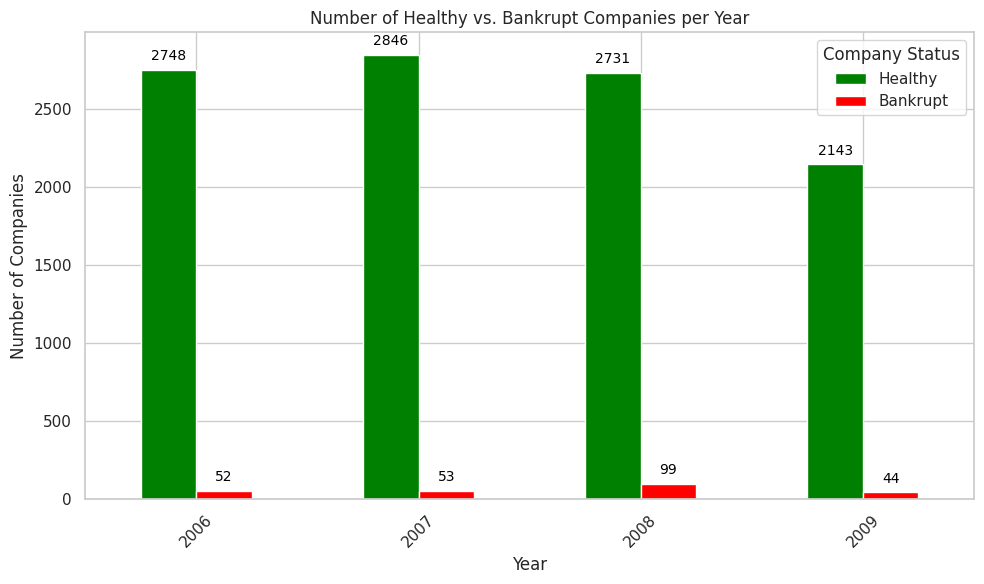

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for the plots
sns.set(style="whitegrid")

# Graph 1: Number of healthy vs. bankrupt companies per year
# Healthy companies are indicated by 1, and bankrupt companies by 2 in the 'ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)' column

# Grouping the data by year and company status
yearly_counts = data.groupby(['ΕΤΟΣ', 'ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)']).size().unstack(fill_value=0)
yearly_counts.columns = ['Healthy', 'Bankrupt']  # Renaming columns for clarity

# Plotting
plt.figure(figsize=(10, 6))
ax = yearly_counts.plot(kind='bar', stacked=False, color=['green', 'red'], ax=plt.gca())
plt.title('Number of Healthy vs. Bankrupt Companies per Year')
plt.xlabel('Year')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45)
plt.legend(title='Company Status')

# Adding labels with values on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


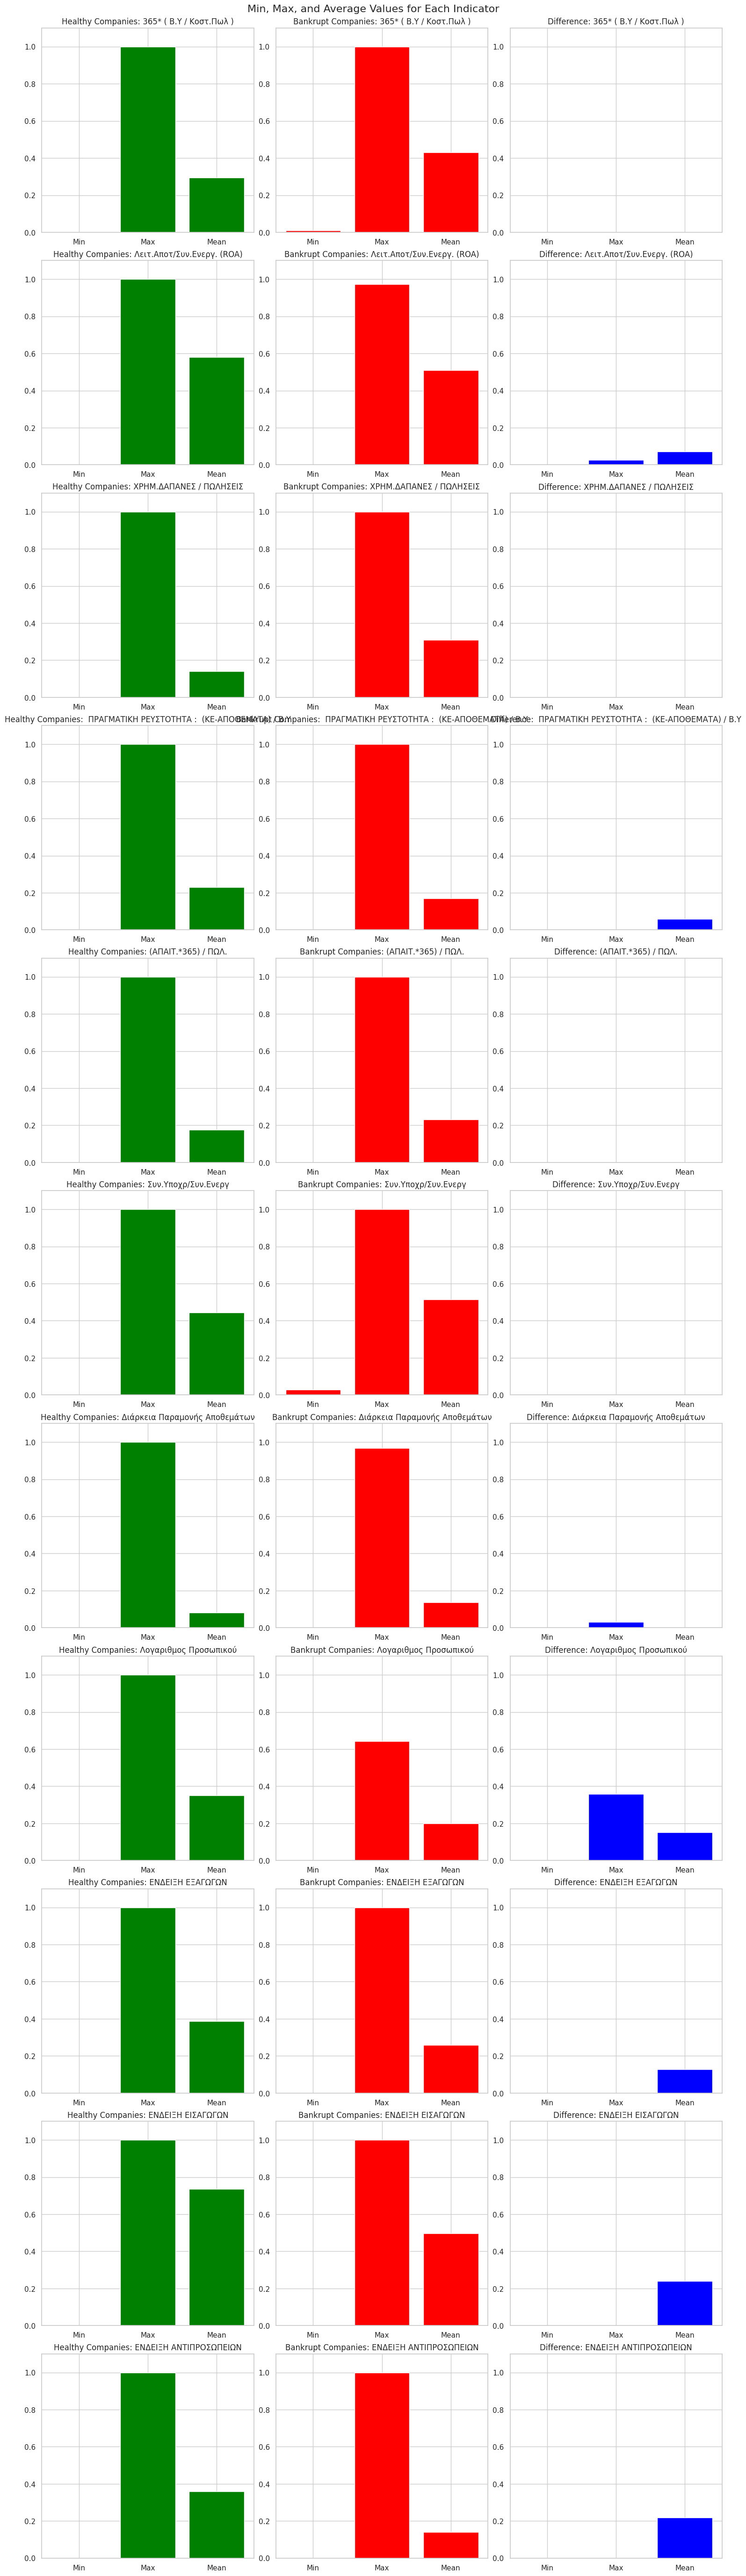

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'columns_to_normalize' is a list of indicator columns

# Filtering data for healthy and bankrupt companies
healthy_companies = data[data['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)'] == 1]
bankrupt_companies = data[data['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)'] == 2]

# Calculating min, max, and average for each group
stats_healthy = healthy_companies[columns_to_normalize].agg(['min', 'max', 'mean'])
stats_bankrupt = bankrupt_companies[columns_to_normalize].agg(['min', 'max', 'mean'])

# Plotting
num_columns = len(columns_to_normalize)
fig, axes = plt.subplots(nrows=num_columns, ncols=3, figsize=(15, 5 * num_columns), constrained_layout=True)
fig.suptitle('Min, Max, and Average Values for Each Indicator', fontsize=16)

for i, col in enumerate(columns_to_normalize):
    # Healthy Companies
    axes[i, 0].bar(['Min', 'Max', 'Mean'], stats_healthy.loc[:, col], color='green')
    axes[i, 0].set_title(f'Healthy Companies: {col}')
    axes[i, 0].set_ylim(0, max(stats_healthy.loc[:, col].max(), stats_bankrupt.loc[:, col].max()) * 1.1)

    # Bankrupt Companies
    axes[i, 1].bar(['Min', 'Max', 'Mean'], stats_bankrupt.loc[:, col], color='red')
    axes[i, 1].set_title(f'Bankrupt Companies: {col}')
    axes[i, 1].set_ylim(0, max(stats_healthy.loc[:, col].max(), stats_bankrupt.loc[:, col].max()) * 1.1)

    # Difference Plot
    axes[i, 2].bar(['Min', 'Max', 'Mean'], stats_healthy.loc[:, col] - stats_bankrupt.loc[:, col], color='blue')
    axes[i, 2].set_title(f'Difference: {col}')
    axes[i, 2].set_ylim(0, max(stats_healthy.loc[:, col].max(), stats_bankrupt.loc[:, col].max()) * 1.1)

plt.show()


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Preparing the data for modeling
X = data[columns_to_normalize]  # Features
y = data['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)']  # Target variable

# Adjusting the target variable to binary (0 for healthy, 1 for bankrupt)
y = y.map({1: 0, 2: 1})

# Setting up Stratified K-Fold
skf = StratifiedKFold(n_splits=4)

# This function will be used to evaluate each model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import numpy as np

def evaluate_model(model, X, y, kfolds):
    # Initialize dictionaries to store metrics
    train_metrics = {
        'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'AUC ROC': []
    }
    test_metrics = {
        'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'AUC ROC': []
    }

    for train_index, test_index in kfolds.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)

        # Predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Calculate metrics for training set
        train_metrics['Accuracy'].append(accuracy_score(y_train, y_train_pred))
        train_metrics['Precision'].append(precision_score(y_train, y_train_pred))
        train_metrics['Recall'].append(recall_score(y_train, y_train_pred))
        train_metrics['F1 Score'].append(f1_score(y_train, y_train_pred))
        train_metrics['AUC ROC'].append(roc_auc_score(y_train, y_train_pred))

        # Calculate metrics for test set
        test_metrics['Accuracy'].append(accuracy_score(y_test, y_test_pred))
        test_metrics['Precision'].append(precision_score(y_test, y_test_pred))
        test_metrics['Recall'].append(recall_score(y_test, y_test_pred))
        test_metrics['F1 Score'].append(f1_score(y_test, y_test_pred))
        test_metrics['AUC ROC'].append(roc_auc_score(y_test, y_test_pred))

    # Average the metrics across folds
    avg_train_metrics = {metric: np.mean(values) for metric, values in train_metrics.items()}
    avg_test_metrics = {metric: np.mean(values) for metric, values in test_metrics.items()}

    return avg_train_metrics, avg_test_metrics



# Placeholder to store the results of each model
model_results = {}

# Confirmation before proceeding to model training and evaluation
"Data preparation complete. Ready to proceed with model implementation and evaluation."


'Data preparation complete. Ready to proceed with model implementation and evaluation.'

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Initializing the Linear Discriminant Analysis model
lda_model = LinearDiscriminantAnalysis()




# Evaluating the LDA model
lda_train_metrics, lda_test_metrics = evaluate_model(lda_model, X, y, skf)




# Store the results in the model_results dictionary
model_results['LDA'] = {'train': lda_train_metrics, 'test': lda_test_metrics}

lda_train_metrics, lda_test_metrics


({'Accuracy': 0.9685516983949235,
  'Precision': 0.12646808841115773,
  'Recall': 0.06317204301075269,
  'F1 Score': 0.08368593015453167,
  'AUC ROC': 0.5265866583669226},
 {'Accuracy': 0.9672452407614781,
  'Precision': 0.06845238095238095,
  'Recall': 0.03225806451612903,
  'F1 Score': 0.042097701149425286,
  'AUC ROC': 0.5108271598851184})

In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
log_model = LogisticRegression()




# Evaluating the LogReg model
log_train_metrics, log_test_metrics = evaluate_model(log_model, X, y, skf)




# Store the results in the model_results dictionary
model_results['Log Reg'] = {'train': log_train_metrics, 'test': log_test_metrics}

log_train_metrics, log_test_metrics

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


({'Accuracy': 0.9767948239392809,
  'Precision': 0.4375,
  'Recall': 0.004032258064516129,
  'F1 Score': 0.00796495020689738,
  'AUC ROC': 0.5019365213389706},
 {'Accuracy': 0.9763904441955953,
  'Precision': 0.0,
  'Recall': 0.0,
  'F1 Score': 0.0,
  'AUC ROC': 0.49976117692013755})

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier
dt_model = DecisionTreeClassifier()



# Evaluating the DT model
dt_train_metrics, dt_test_metrics = evaluate_model(dt_model, X, y, skf)




# Store the results in the model_results dictionary
model_results['Decision Trees'] = {'train': dt_train_metrics, 'test': dt_test_metrics}

dt_train_metrics, dt_test_metrics





({'Accuracy': 1.0,
  'Precision': 1.0,
  'Recall': 1.0,
  'F1 Score': 1.0,
  'AUC ROC': 1.0},
 {'Accuracy': 0.9567935796939155,
  'Precision': 0.09091063698206556,
  'Recall': 0.09274193548387095,
  'F1 Score': 0.09109446884245594,
  'AUC ROC': 0.5350029891404834})

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf_model = RandomForestClassifier()




# Evaluating the RF  model
rf_train_metrics, rf_test_metrics = evaluate_model(rf_model, X, y, skf)




# Store the results in the model_results dictionary
model_results['Random Forest'] = {'train': rf_train_metrics, 'test': rf_test_metrics}

rf_train_metrics, rf_test_metrics



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


({'Accuracy': 0.9999688938658704,
  'Precision': 1.0,
  'Recall': 0.9986559139784946,
  'F1 Score': 0.9993261455525606,
  'AUC ROC': 0.9993279569892473},
 {'Accuracy': 0.9768570362075402,
  'Precision': 0.25,
  'Recall': 0.004032258064516129,
  'F1 Score': 0.007936507936507936,
  'AUC ROC': 0.5019683644162856})

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# k-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier()




# Evaluating the KNN model
knn_train_metrics, knn_test_metrics = evaluate_model(knn_model, X, y, skf)




# Store the results in the model_results dictionary
model_results['KNN'] = {'train': knn_train_metrics, 'test': knn_test_metrics}

knn_train_metrics, knn_test_metrics


({'Accuracy': 0.9785989797188006,
  'Precision': 0.7915349143610013,
  'Recall': 0.10349462365591397,
  'F1 Score': 0.18274640807535547,
  'AUC ROC': 0.5514129595161495},
 {'Accuracy': 0.9765770810003733,
  'Precision': 0.43803418803418803,
  'Recall': 0.056451612903225805,
  'F1 Score': 0.09895332780999724,
  'AUC ROC': 0.5274138079800806})

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Naïve Bayes Classifier
nb_model = GaussianNB()

# Evaluating the Naïve Bayes model
nb_train_metrics, nb_test_metrics = evaluate_model(nb_model, X, y, skf)




# Store the results in the model_results dictionary
model_results['Naive Bayes'] = {'train': nb_train_metrics, 'test': nb_test_metrics}

nb_train_metrics, nb_test_metrics

({'Accuracy': 0.9277715565509519,
  'Precision': 0.09189533333294525,
  'Recall': 0.239247311827957,
  'F1 Score': 0.13274989996197373,
  'AUC ROC': 0.5916654340314158},
 {'Accuracy': 0.9257185516983949,
  'Precision': 0.09041423328592382,
  'Recall': 0.23790322580645162,
  'F1 Score': 0.1300191089611674,
  'AUC ROC': 0.5899584910079259})

In [ ]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(probability=True)  # 'probability=True' is needed for AUC ROC

# Evaluate the SVM model
svm_train_metrics, svm_test_metrics = evaluate_model(svm_model, X, y, skf)

# Store the results in the model_results dictionary
model_results['Support Vector Machine'] = {'train': svm_train_metrics, 'test': svm_test_metrics}

svm_train_metrics,svm_test_metrics

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

({'Accuracy': 0.9768570362075402,
  'Precision': 0.0,
  'Recall': 0.0,
  'F1 Score': 0.0,
  'AUC ROC': 0.5},
 {'Accuracy': 0.9768570362075402,
  'Precision': 0.0,
  'Recall': 0.0,
  'F1 Score': 0.0,
  'AUC ROC': 0.5})

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Initialize the QDA model
qda_model = QuadraticDiscriminantAnalysis()

# Evaluate the QDA model
qda_train_metrics, qda_test_metrics = evaluate_model(qda_model, X, y, skf)

# Store the results in the model_results dictionary
model_results['QDA'] = {'train': qda_train_metrics, 'test': qda_test_metrics}

qda_train_metrics, qda_test_metrics

({'Accuracy': 0.9412716187632202,
  'Precision': 0.11181273393164985,
  'Recall': 0.22177419354838712,
  'F1 Score': 0.1485229530548643,
  'AUC ROC': 0.5900458026715315},
 {'Accuracy': 0.9379432624113475,
  'Precision': 0.08324200441135926,
  'Recall': 0.17338709677419356,
  'F1 Score': 0.11052910860104545,
  'AUC ROC': 0.5647218250397524})

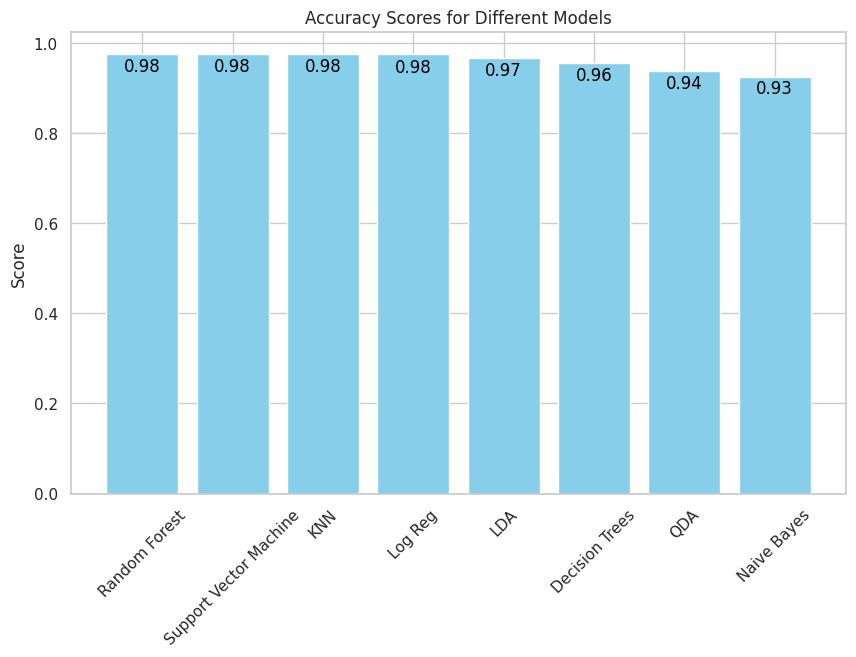

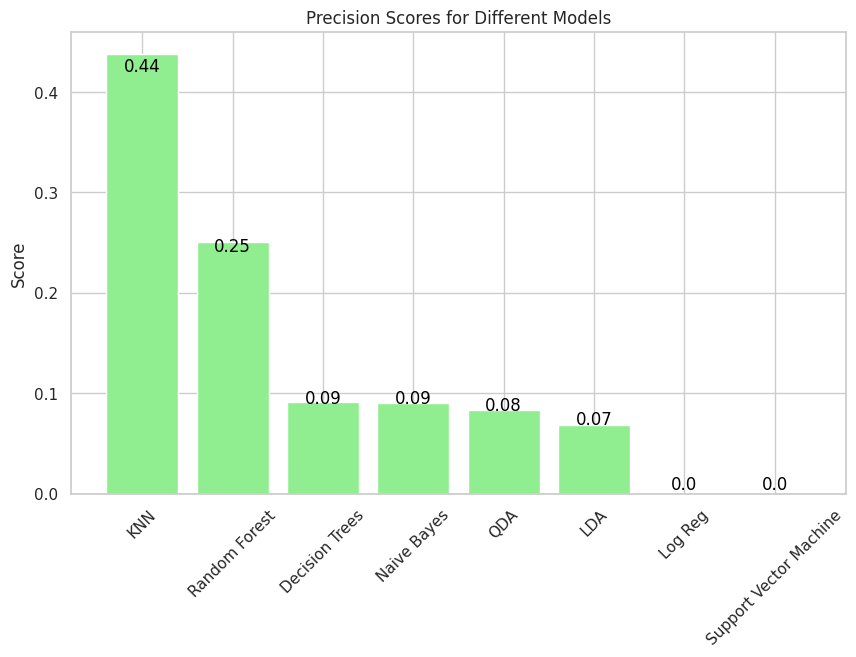

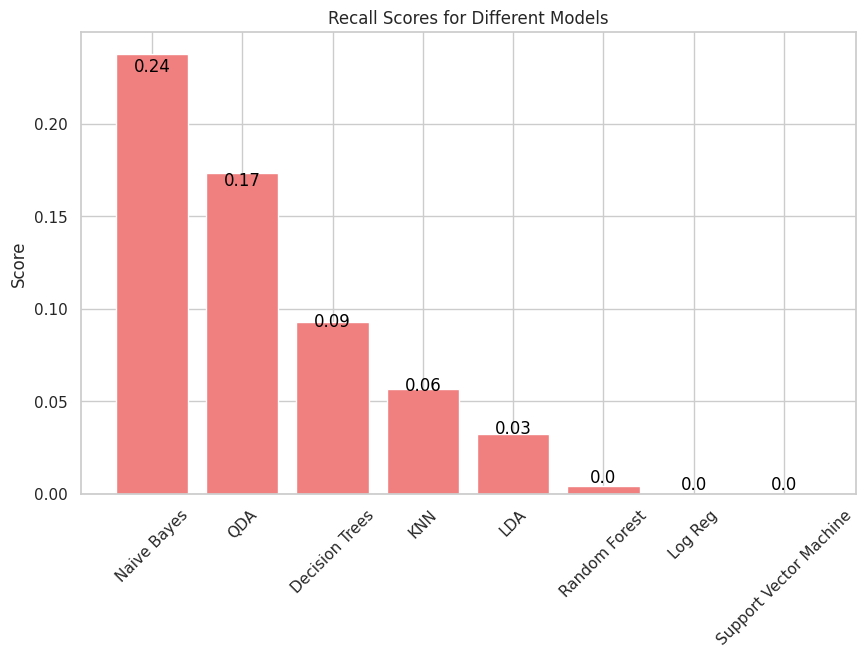

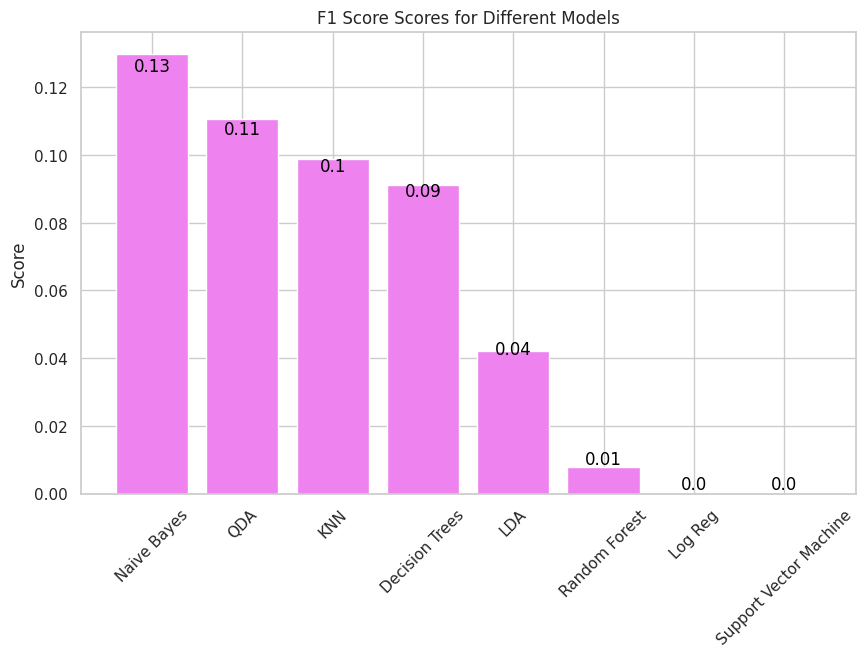

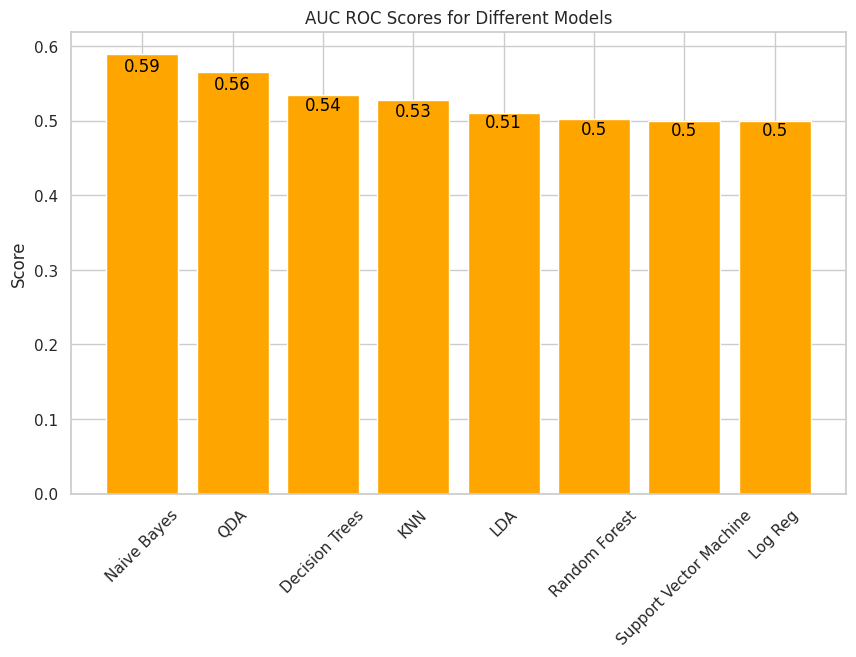

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt


skf = StratifiedKFold(n_splits=4)


# Function to create bar plots for each metric with black annotations
def create_bar_plot(metric_scores, title, color):
    # Sort the metric scores by values (descending order)
    sorted_metric_scores = dict(sorted(metric_scores.items(), key=lambda item: item[1], reverse=True))

    plt.figure(figsize=(10, 6))
    bars = plt.bar(sorted_metric_scores.keys(), sorted_metric_scores.values(), color=color)

    # Add value annotations inside each bar with black text color
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval - (0.05 * yval), round(yval, 2), ha='center', va='bottom', color='black')

    plt.title(title)
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.show()


# Extracting and plotting metrics after all models have been evaluated
def plot_all_metrics(model_results):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC ROC']
    colors = ['skyblue', 'lightgreen', 'lightcoral', 'violet', 'orange']

    for metric, color in zip(metrics, colors):
        metric_scores = {model_name: scores['test'][metric] for model_name, scores in model_results.items()}
        create_bar_plot(metric_scores, f'{metric} Scores for Different Models', color)

# Call this function after all models have been evaluated and their results stored in model_results
plot_all_metrics(model_results)


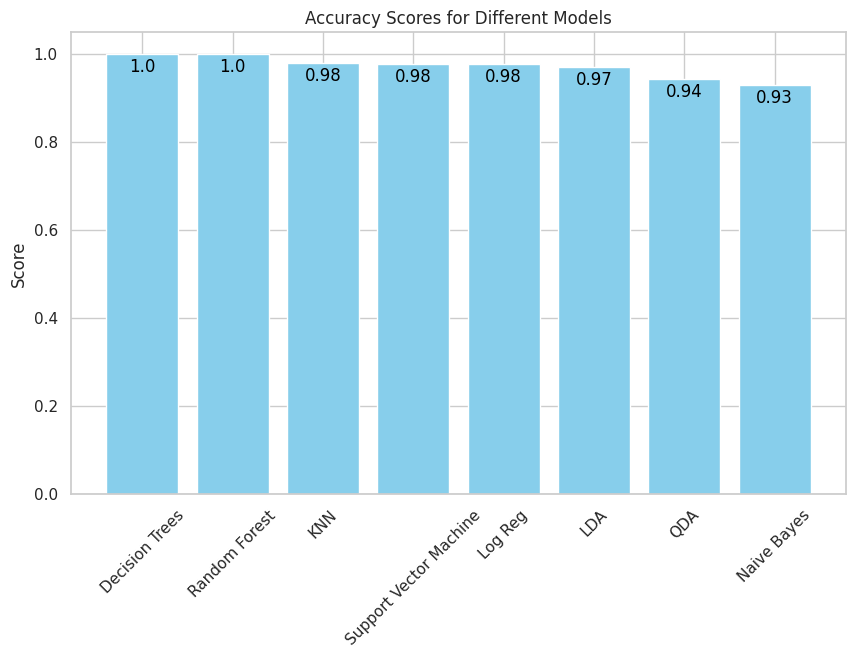

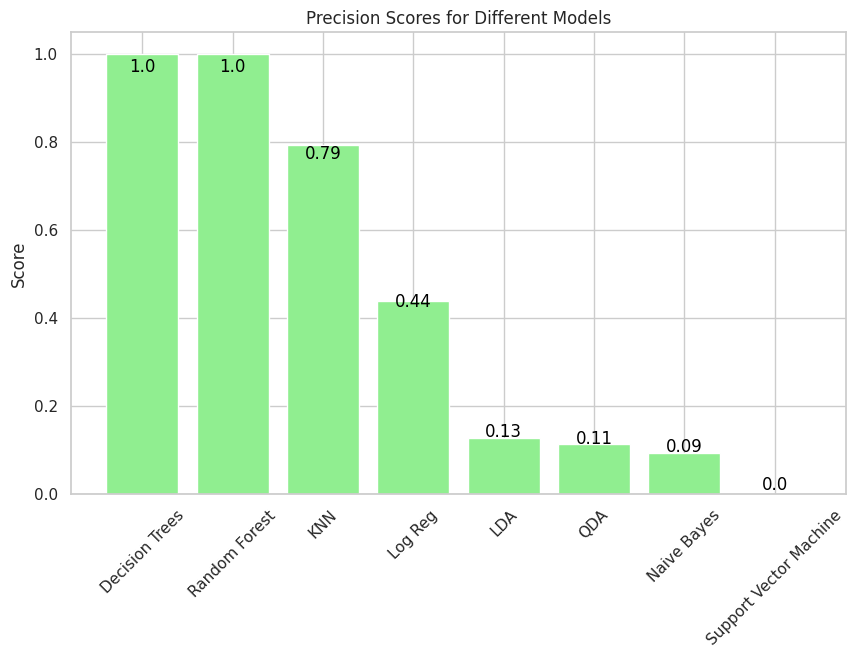

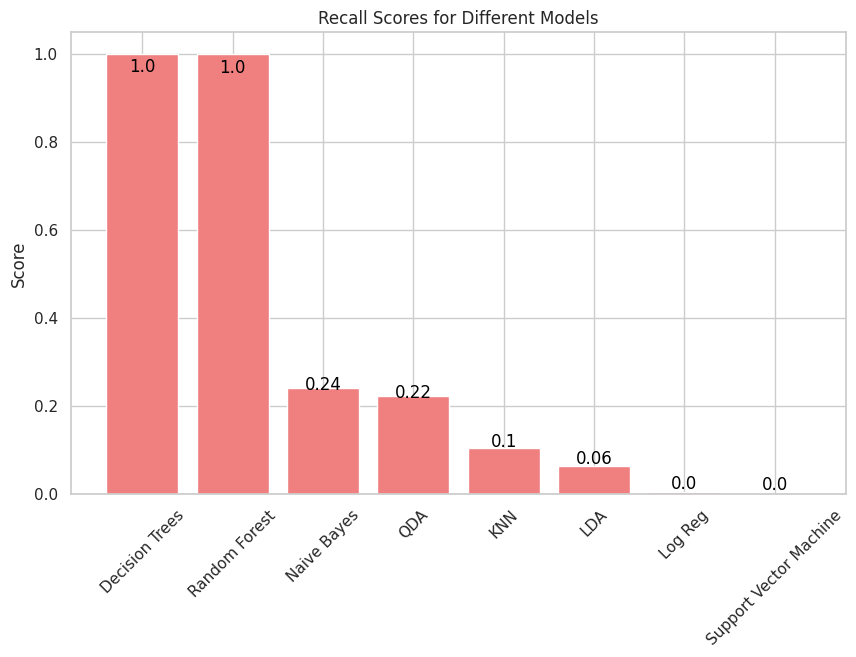

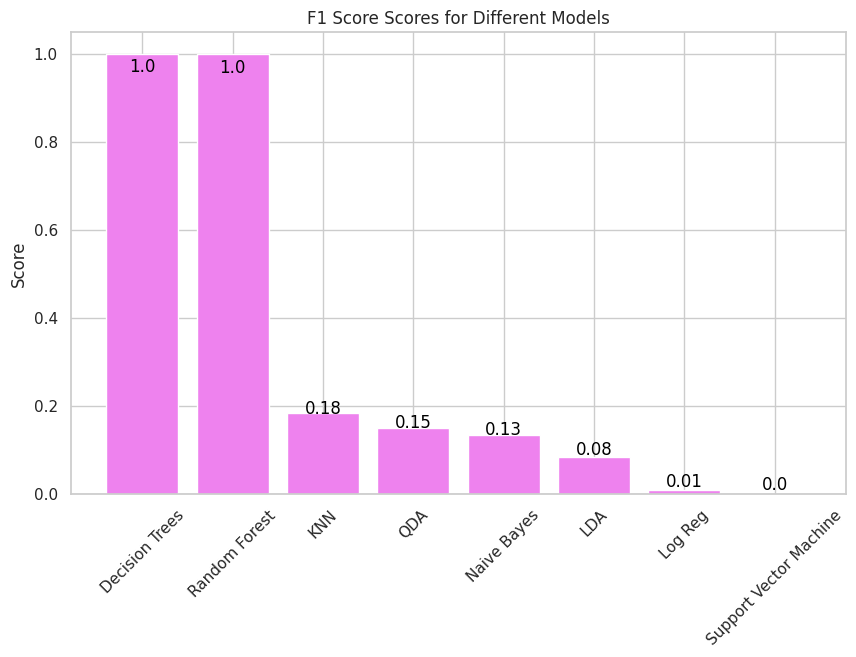

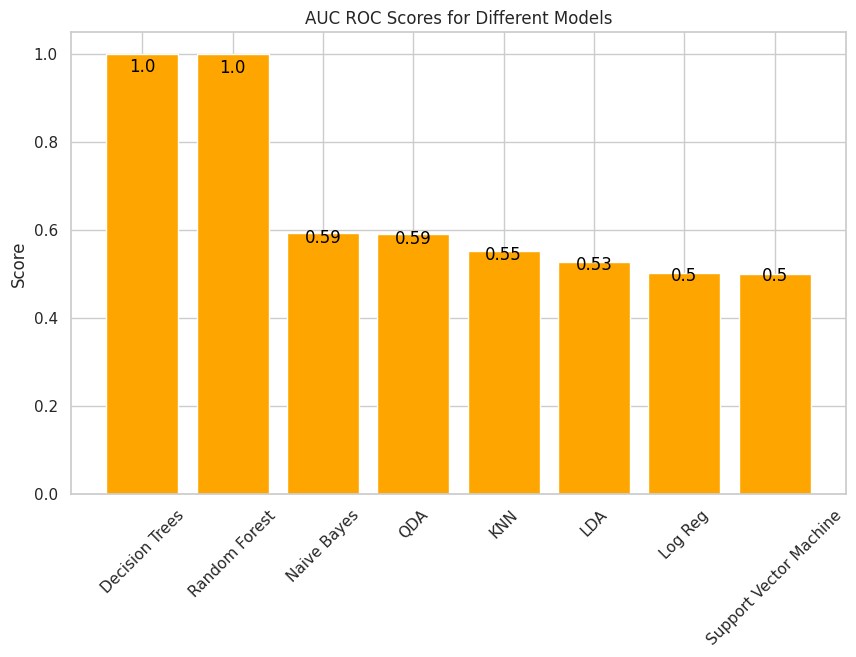

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt


skf = StratifiedKFold(n_splits=4)


# Function to create bar plots for each metric with black annotations
def create_bar_plot(metric_scores, title, color):
    # Sort the metric scores by values (descending order)
    sorted_metric_scores = dict(sorted(metric_scores.items(), key=lambda item: item[1], reverse=True))

    plt.figure(figsize=(10, 6))
    bars = plt.bar(sorted_metric_scores.keys(), sorted_metric_scores.values(), color=color)

    # Add value annotations inside each bar with black text color
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval - (0.05 * yval), round(yval, 2), ha='center', va='bottom', color='black')

    plt.title(title)
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.show()


# Extracting and plotting metrics after all models have been evaluated
def plot_all_metrics(model_results):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC ROC']
    colors = ['skyblue', 'lightgreen', 'lightcoral', 'violet', 'orange']

    for metric, color in zip(metrics, colors):
        metric_scores = {model_name: scores['train'][metric] for model_name, scores in model_results.items()}
        create_bar_plot(metric_scores, f'{metric} Scores for Different Models', color)

# Call this function after all models have been evaluated and their results stored in model_results
plot_all_metrics(model_results)


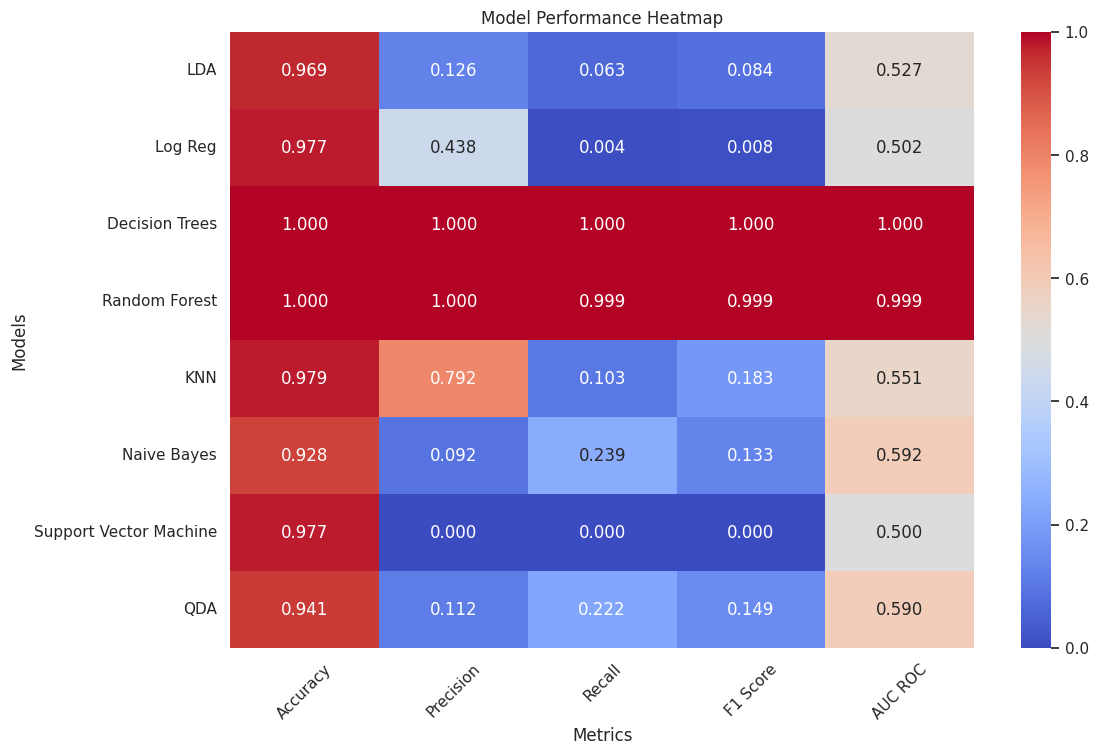

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Extract metric values from the model_results dictionary
model_names = list(model_results.keys())
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC ROC']
metric_values = []

for model_name in model_names:
    model_scores = model_results[model_name]['train']
    model_metrics = [model_scores[metric] for metric in metrics]
    metric_values.append(model_metrics)

# Create a DataFrame with model names as index and metric names as columns
metrics_df = pd.DataFrame(metric_values, columns=metrics, index=model_names)

# Create a heatmap for model performance
plt.figure(figsize=(12, 8))
sns.heatmap(metrics_df, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Model Performance Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Models')
plt.xticks(rotation=45)
plt.show()


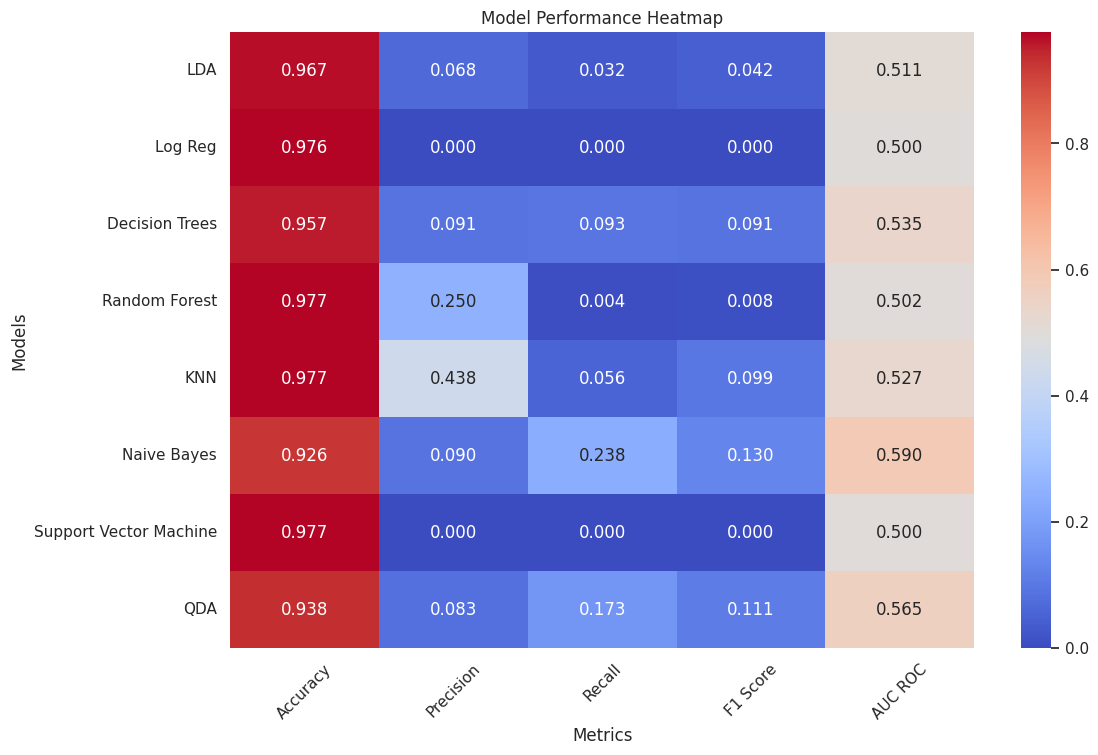

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


#F1 Score: 0.25 - Important for balancing precision and recall, especially in imbalanced datasets.
#AUC ROC: 0.25 - Provides an overall measure of the model's ability to distinguish between the classes.
#Recall: 0.2 - Critical for minimizing false negatives (failing to identify a bankrupt company).
#Specificity: 0.1 - Ensures the model is not overly pessimistic, reducing false positives (wrongly identifying a healthy company as bankrupt).
#Precision: 0.1 - Important but slightly less so than recall in this context.
#Accuracy: 0.05 - While overall accuracy is important, it can be misleading in imbalanced datasets.
#MCC: 0.05 - A comprehensive metric that considers all four quadrants of the confusion matrix.

# Define weights for each metric
weights = {
    'Accuracy': 0.05,
    'Precision': 0.1,
    'Recall': 0.2,
    'F1 Score': 0.25,
    'AUC ROC': 0.25,
    'Specificity': 0.1,
    'MCC': 0.05
}

# Extract metric values from the model_results dictionary
model_names = list(model_results.keys())
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC ROC']
metric_values = []

for model_name in model_names:
    model_scores = model_results[model_name]['test']
    model_metrics = [model_scores[metric] for metric in metrics]
    metric_values.append(model_metrics)

# Create a DataFrame with model names as index and metric names as columns
metrics_df = pd.DataFrame(metric_values, columns=metrics, index=model_names)

# Create a heatmap for model performance
plt.figure(figsize=(12, 8))
sns.heatmap(metrics_df, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Model Performance Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Models')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Function to calculate Specificity and MCC
def calculate_specificity_mcc(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    TN, FP, FN, TP = cm.ravel()
    specificity = TN / (TN + FP)
    mcc = matthews_corrcoef(y_true, y_pred)
    return specificity, mcc

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model_during_grid_search(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics for both sets
    metrics = {
        'train': {
            'Accuracy': accuracy_score(y_train, y_train_pred),
            'Precision': precision_score(y_train, y_train_pred),
            'Recall': recall_score(y_train, y_train_pred),
            'F1 Score': f1_score(y_train, y_train_pred),
            'AUC ROC': roc_auc_score(y_train, y_train_pred)
        },
        'test': {
            'Accuracy': accuracy_score(y_test, y_test_pred),
            'Precision': precision_score(y_test, y_test_pred),
            'Recall': recall_score(y_test, y_test_pred),
            'F1 Score': f1_score(y_test, y_test_pred),
            'AUC ROC': roc_auc_score(y_test, y_test_pred)
        }
    }

    return metrics

In [ ]:
#will be used later to have an approximation of time complexity of the future-to-be-tuned algorithms
durationDict = {}

In [ ]:
import joblib
import pickle
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score, roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix, matthews_corrcoef
from sklearn.neighbors import KNeighborsClassifier
from datetime import datetime



# Start timing
start_time = datetime.now()

# K-Nearest Neighbors (KNN) Classifier Parameters
knn_param_grid = {
    'n_neighbors': [1,3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Set up Stratified K-Fold for the grid search
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# Grid Search Setup for KNN
knn_classifier = KNeighborsClassifier()
knn_grid_search = GridSearchCV(knn_classifier, knn_param_grid, cv=cv, scoring=make_scorer(f1_score), n_jobs=-1)

# Fit Grid Search (note: GridSearchCV automatically uses the provided CV strategy)
knn_grid_search.fit(X, y)
knn_best_model = knn_grid_search.best_estimator_
print(f"Best Parameters: {knn_grid_search.best_params_}")

# Collecting metrics (modify to collect more detailed metrics if needed)
train_accuracies = []
test_accuracies = []

train_metrics_results = {metric: [] for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC ROC']}
test_metrics_results = {metric: [] for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC ROC']}


for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    metrics = evaluate_model_during_grid_search(knn_best_model, X_train, X_test, y_train, y_test)
    for metric in train_metrics_results:
        train_metrics_results[metric].append(metrics['train'][metric])
        test_metrics_results[metric].append(metrics['test'][metric])




# Average metrics across folds
avg_train_metrics_knn = {metric: np.mean(values) for metric, values in train_metrics_results.items()}
avg_test_metrics_knn = {metric: np.mean(values) for metric, values in test_metrics_results.items()}

# Print and save the results
print("K-Nearest Neighbors Grid Search Results:")
print(f"Best Parameters: {knn_grid_search.best_params_}")
for metric in avg_train_metrics_knn:
    print(f"Average Training {metric}: {avg_train_metrics_knn[metric]:.4f}")
    print(f"Average Testing {metric}: {avg_test_metrics_knn[metric]:.4f}")





joblib.dump(knn_best_model, 'knn_model.pkl')
with open('knn_metrics.pkl', 'wb') as file:
    pickle.dump({'train': avg_train_metrics_knn, 'test': avg_test_metrics_knn}, file)
print('K-Nearest Neighbors (KNN) model saved!')

# End timing and print duration
end_time = datetime.now()
duration = end_time - start_time
durationDict["Knn"] = duration
print("Duration: ", duration)


K-Nearest Neighbors Grid Search Results:
Best Parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Average Training Accuracy: 1.0000
Average Testing Accuracy: 0.9751
Average Training Precision: 1.0000
Average Testing Precision: 0.3565
Average Training Recall: 1.0000
Average Testing Recall: 0.0927
Average Training F1 Score: 1.0000
Average Testing F1 Score: 0.1471
Average Training AUC ROC: 1.0000
Average Testing AUC ROC: 0.5444
K-Nearest Neighbors (KNN) model saved!
Duration:  0:00:20.672748


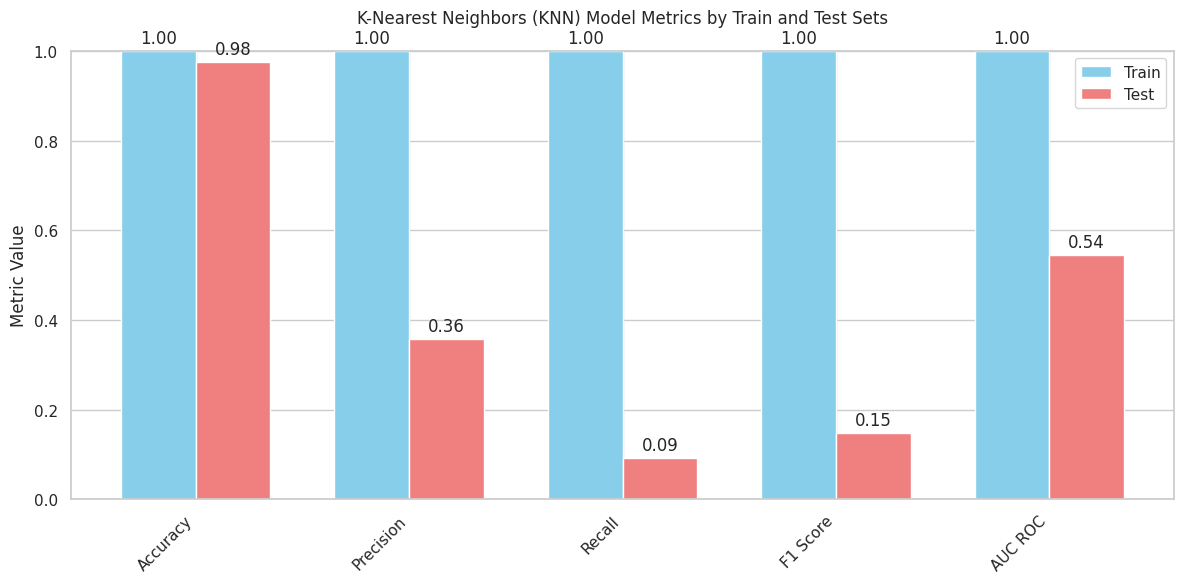

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC ROC']

# Extract values from the averaged training and testing metrics
train_values = [avg_train_metrics_knn[metric] for metric in metrics]
test_values = [avg_test_metrics_knn[metric] for metric in metrics]

# Create side-by-side bar plots
x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, train_values, width, label='Train', color='skyblue')
rects2 = ax.bar(x + width/2, test_values, width, label='Test', color='lightcoral')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Metric Value')
ax.set_title('K-Nearest Neighbors (KNN) Model Metrics by Train and Test Sets', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Annotate the bars with their values
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1)  # Set y-axis limit to match the score range (0 to 1)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Assuming knn_best_model is your trained knn model
# Assuming X_train, y_train, X_test, y_test are defined

# Predict on training and test sets
y_train_pred = knn_best_model.predict(X_train)
y_test_pred = knn_best_model.predict(X_test)

# Confusion matrices for training and test sets
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Extracting TN, FP, FN, TP from confusion matrices
tn_train, fp_train, fn_train, tp_train = conf_matrix_train.ravel()
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()

# Data for DataFrame
data = {
    'Classifier Name': ['knn', 'knn'],
    'Set Type': ['Training', 'Test'],
    'Balance Type': ['Unbalanced', 'Unbalanced'],  # Update if you have balanced data
    'Number of Training Samples': [len(X_train), len(X_test)],
    'Number of Non-Healthy Companies': [y_train.sum(), y_test.sum()],
    'TP': [tp_train, tp_test],
    'TN': [tn_train, tn_test],
    'FP': [fp_train, fp_test],
    'FN': [fn_train, fn_test],
    'ROC-AUC': [avg_train_metrics_knn['AUC ROC'], avg_test_metrics_knn['AUC ROC']]  # Replace with actual ROC-AUC values
}

# Create the DataFrame
df_knn = pd.DataFrame(data)

# Display the DataFrame
print(df_knn)

  Classifier Name  Set Type Balance Type  Number of Training Samples  \
0             knn  Training   Unbalanced                        8037   
1             knn      Test   Unbalanced                        2679   

   Number of Non-Healthy Companies   TP    TN  FP  FN   ROC-AUC  
0                              186  186  7851   0   0  1.000000  
1                               62    4  2606  11  58  0.544365  


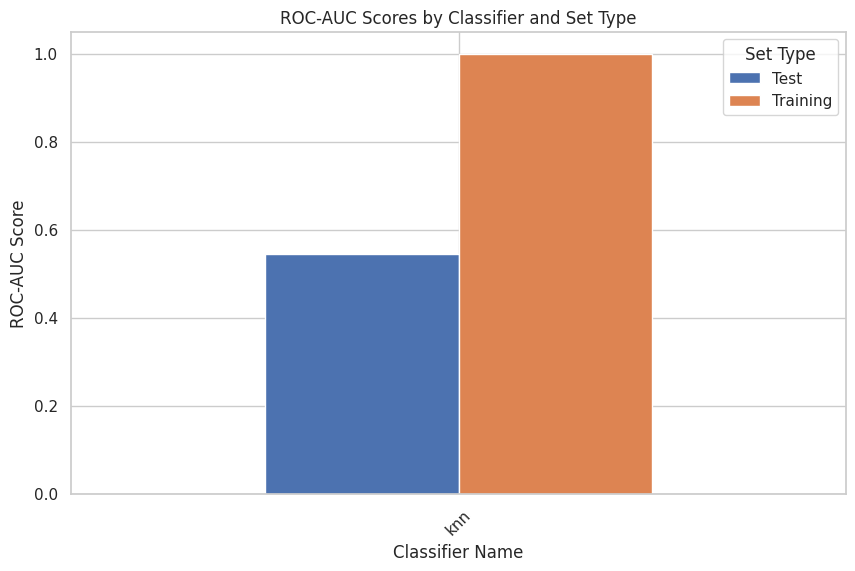

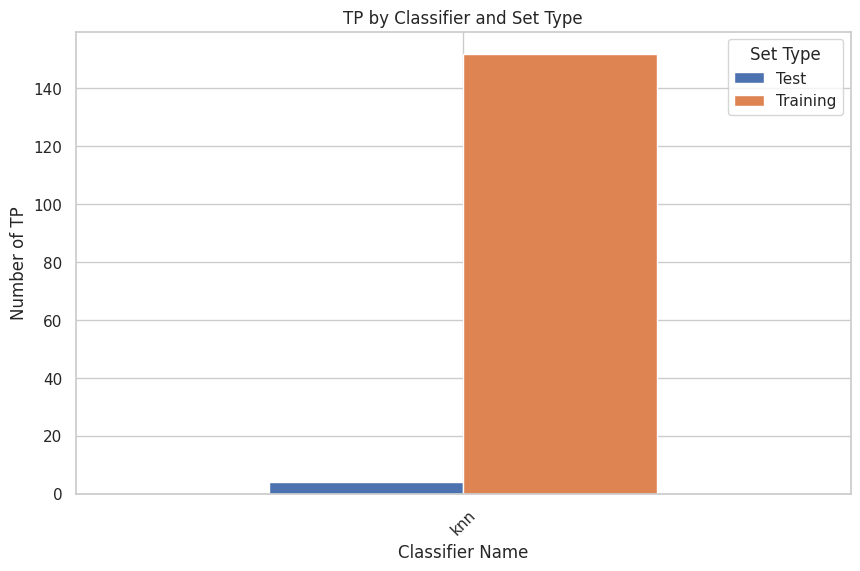

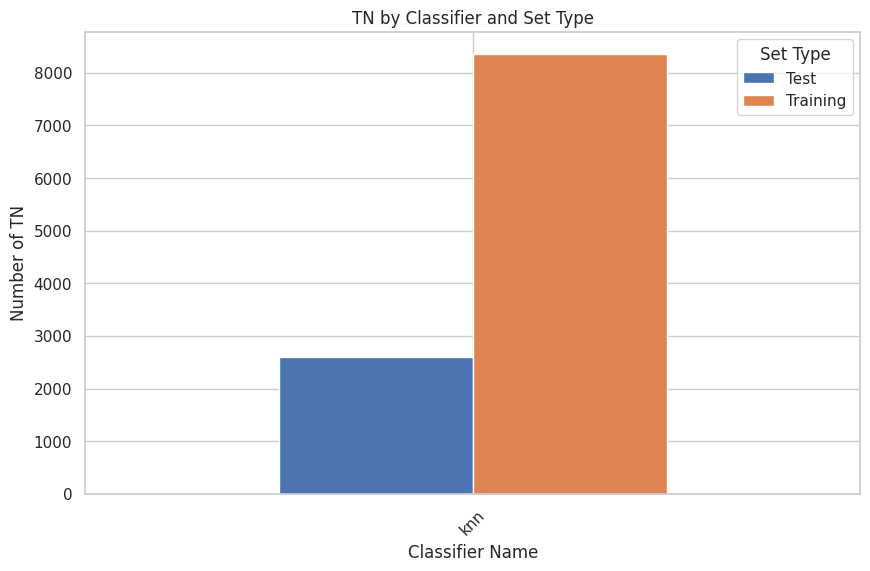

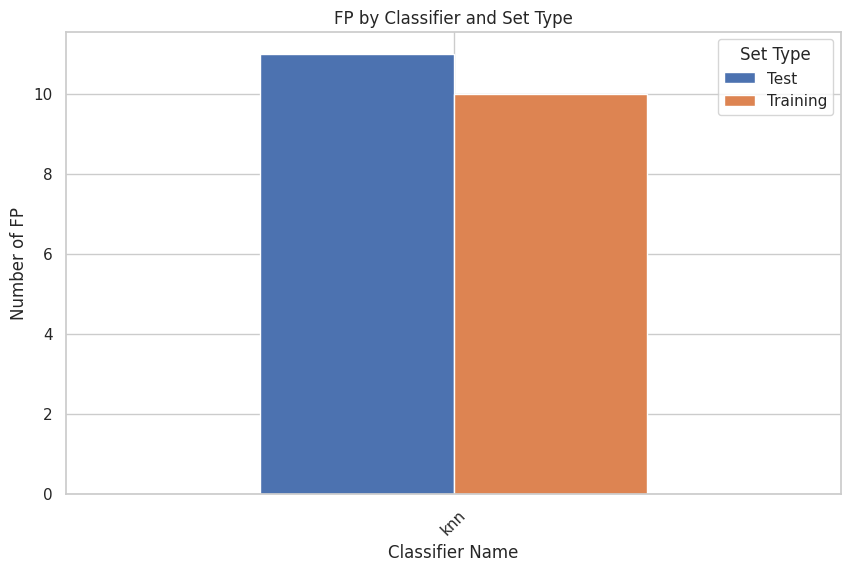

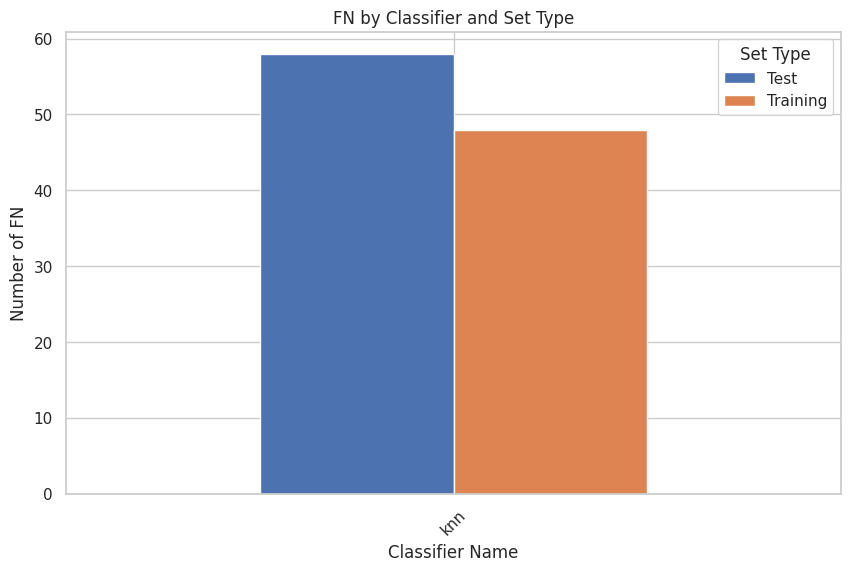

In [ ]:
import matplotlib.pyplot as plt

# Filter DataFrame for ROC-AUC values
roc_auc_data = results_df[['Classifier Name', 'Set Type', 'ROC-AUC']]

# Pivot the DataFrame for easy plotting
roc_auc_pivot = roc_auc_data.pivot(index='Classifier Name', columns='Set Type', values='ROC-AUC')

# Plot
roc_auc_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('ROC-AUC Scores by Classifier and Set Type')
plt.xlabel('Classifier Name')
plt.ylabel('ROC-AUC Score')
plt.xticks(rotation=45)
plt.show()

# Select relevant columns for confusion matrix components
confusion_matrix_components = results_df[['Classifier Name', 'Set Type', 'TP', 'TN', 'FP', 'FN']]

# Pivot and plot each component
for component in ['TP', 'TN', 'FP', 'FN']:
    component_data = confusion_matrix_components.pivot(index='Classifier Name', columns='Set Type', values=component)
    component_data.plot(kind='bar', figsize=(10, 6))
    plt.title(f'{component} by Classifier and Set Type')
    plt.xlabel('Classifier Name')
    plt.ylabel(f'Number of {component}')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix, matthews_corrcoef
from sklearn.naive_bayes import GaussianNB
from datetime import datetime


# Start time for performance measurement
start_time = datetime.now()

# Naive Bayes Classifier parameters
naive_bayes_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Grid Search Setup for Naive Bayes
nb_classifier = GaussianNB()
nb_grid_search = GridSearchCV(nb_classifier, naive_bayes_param_grid, cv=4, scoring=make_scorer(f1_score), n_jobs=-1)
nb_grid_search.fit(X, y)
nb_best_model = nb_grid_search.best_estimator_

# Collecting metrics (modify to collect more detailed metrics if needed)
train_accuracies = []
test_accuracies = []
train_metrics_results = {metric: [] for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC ROC']}
test_metrics_results = {metric: [] for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC ROC']}


for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    metrics = evaluate_model_during_grid_search(nb_best_model, X_train, X_test, y_train, y_test)
    for metric in train_metrics_results:
        train_metrics_results[metric].append(metrics['train'][metric])
        test_metrics_results[metric].append(metrics['test'][metric])




# Average metrics across folds
avg_train_metrics_nb = {metric: np.mean(values) for metric, values in train_metrics_results.items()}
avg_test_metrics_nb = {metric: np.mean(values) for metric, values in test_metrics_results.items()}

# Print and save the results
print("K-Nearest Neighbors Grid Search Results:")
print(f"Best Parameters: {nb_grid_search.best_params_}")
for metric in avg_train_metrics_nb:
    print(f"Average Training {metric}: {avg_train_metrics_nb[metric]:.4f}")
    print(f"Average Testing {metric}: {avg_test_metrics_nb[metric]:.4f}")





joblib.dump(nb_best_model, 'nb_model.pkl')
with open('nb_metrics.pkl', 'wb') as file:
    pickle.dump({'train': avg_train_metrics_nb, 'test': avg_test_metrics_nb}, file)
print('Naive-Bayes (NB) model saved!')

# End timing and print duration
end_time = datetime.now()
duration = end_time - start_time
durationDict["Naive Bays"] = duration
print("Duration: ", duration)


K-Nearest Neighbors Grid Search Results:
Best Parameters: {'var_smoothing': 1e-09}
Average Training Accuracy: 0.9276
Average Testing Accuracy: 0.9273
Average Training Precision: 0.0942
Average Testing Precision: 0.0880
Average Training Recall: 0.2473
Average Testing Recall: 0.2258
Average Training F1 Score: 0.1364
Average Testing F1 Score: 0.1263
Average Training AUC ROC: 0.5955
Average Testing AUC ROC: 0.5849
Naive-Bayes (NB) model saved!
Duration:  0:00:00.224647


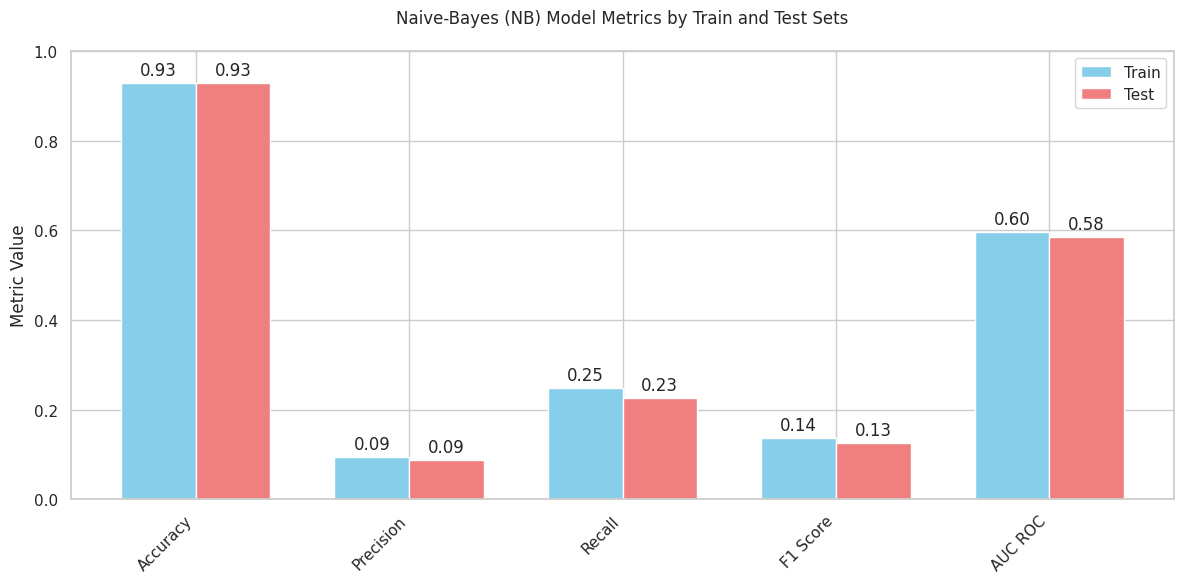

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC ROC']

# Extract values from the averaged training and testing metrics
train_values = [avg_train_metrics_nb[metric] for metric in metrics]
test_values = [avg_test_metrics_nb[metric] for metric in metrics]

# Create side-by-side bar plots
x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, train_values, width, label='Train', color='skyblue')
rects2 = ax.bar(x + width/2, test_values, width, label='Test', color='lightcoral')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Metric Value')
ax.set_title('Naive-Bayes (NB) Model Metrics by Train and Test Sets', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Annotate the bars with their values
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1)  # Set y-axis limit to match the score range (0 to 1)
plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Assuming nb_best_model is your trained Naive Bayes model
# Assuming X_train, y_train, X_test, y_test are defined

# Predict on training and test sets
y_train_pred = nb_best_model.predict(X_train)
y_test_pred = nb_best_model.predict(X_test)

# Confusion matrices for training and test sets
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Extracting TN, FP, FN, TP from confusion matrices
tn_train, fp_train, fn_train, tp_train = conf_matrix_train.ravel()
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()

# Data for DataFrame
data = {
    'Classifier Name': ['Naive Bayes', 'Naive Bayes'],
    'Set Type': ['Training', 'Test'],
    'Balance Type': ['Unbalanced', 'Unbalanced'],  # Update if you have balanced data
    'Number of Training Samples': [len(X_train), len(X_test)],
    'Number of Non-Healthy Companies': [y_train.sum(), y_test.sum()],
    'TP': [tp_train, tp_test],
    'TN': [tn_train, tn_test],
    'FP': [fp_train, fp_test],
    'FN': [fn_train, fn_test],
    'ROC-AUC': [avg_train_metrics_nb['AUC ROC'], avg_test_metrics_nb['AUC ROC']]  # Replace with actual ROC-AUC values
}

# Create the DataFrame
df_nb = pd.DataFrame(data)

# Display the DataFrame
print(df_nb)

  Classifier Name  Set Type Balance Type  Number of Training Samples  \
0     Naive Bayes  Training   Unbalanced                        8037   
1     Naive Bayes      Test   Unbalanced                        2679   

   Number of Non-Healthy Companies  TP    TN   FP   FN   ROC-AUC  
0                              186  46  7406  445  140  0.595491  
1                               62  14  2469  148   48  0.584865  


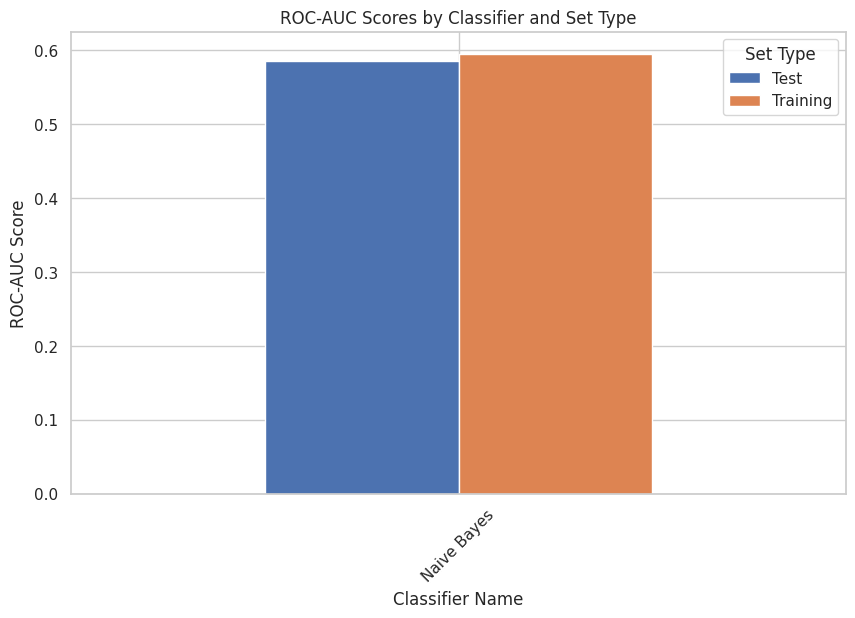

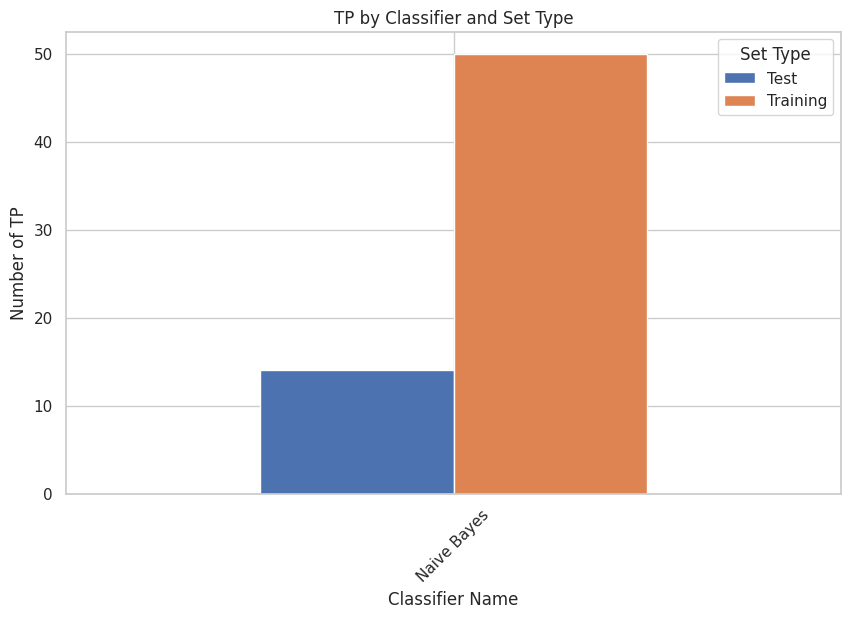

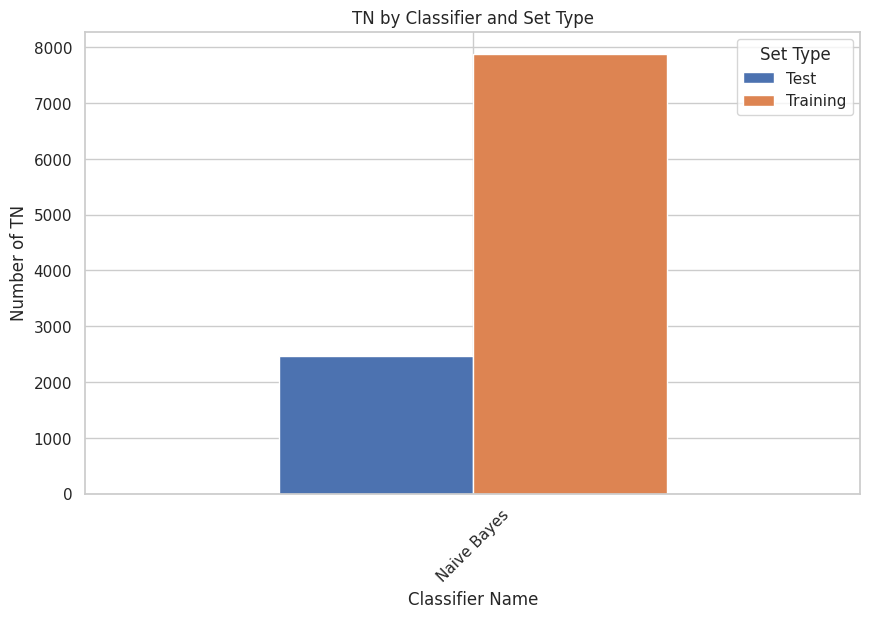

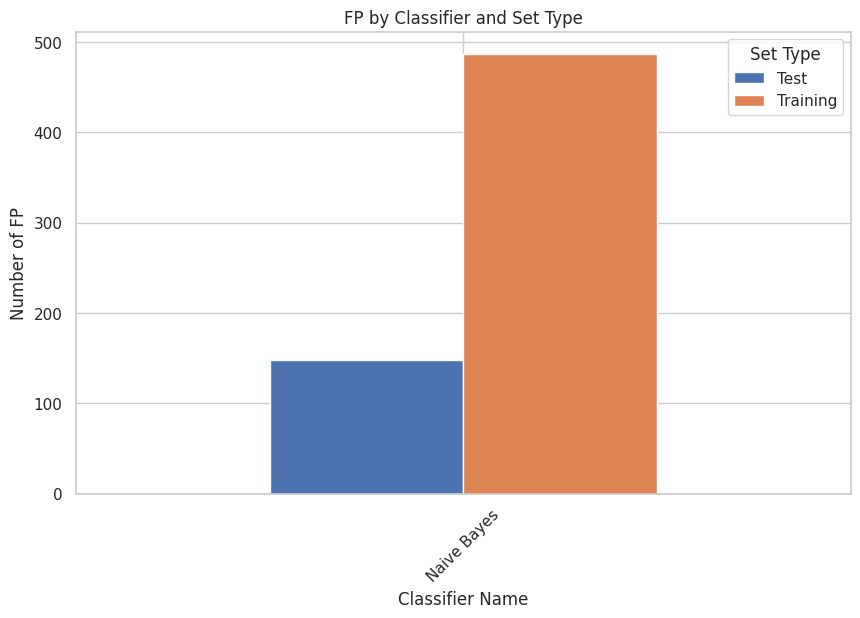

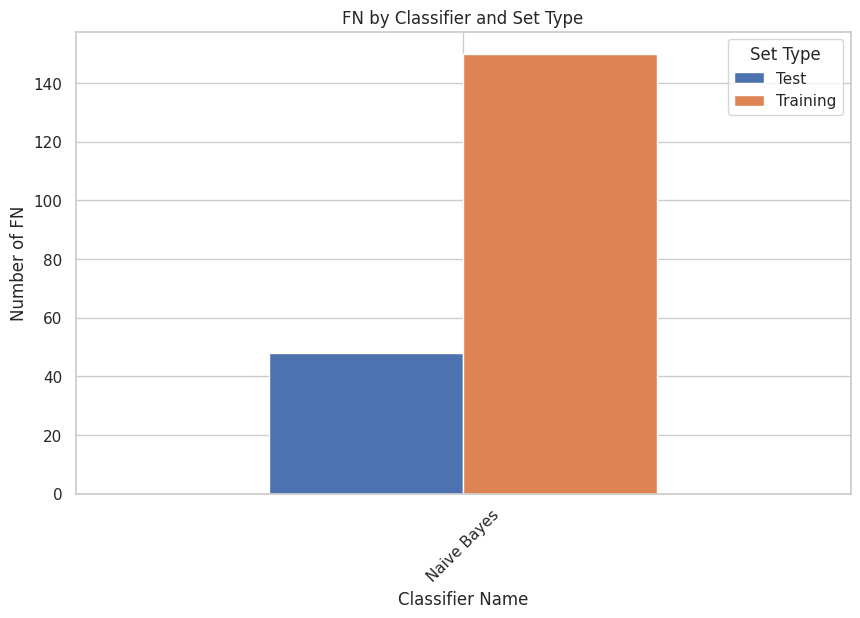

In [ ]:
import matplotlib.pyplot as plt

# Filter DataFrame for ROC-AUC values
roc_auc_data = results_df[['Classifier Name', 'Set Type', 'ROC-AUC']]

# Pivot the DataFrame for easy plotting
roc_auc_pivot = roc_auc_data.pivot(index='Classifier Name', columns='Set Type', values='ROC-AUC')

# Plot
roc_auc_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('ROC-AUC Scores by Classifier and Set Type')
plt.xlabel('Classifier Name')
plt.ylabel('ROC-AUC Score')
plt.xticks(rotation=45)
plt.show()

# Select relevant columns for confusion matrix components
confusion_matrix_components = results_df[['Classifier Name', 'Set Type', 'TP', 'TN', 'FP', 'FN']]

# Pivot and plot each component
for component in ['TP', 'TN', 'FP', 'FN']:
    component_data = confusion_matrix_components.pivot(index='Classifier Name', columns='Set Type', values=component)
    component_data.plot(kind='bar', figsize=(10, 6))
    plt.title(f'{component} by Classifier and Set Type')
    plt.xlabel('Classifier Name')
    plt.ylabel(f'Number of {component}')
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
import joblib
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, roc_auc_score, accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from datetime import datetime


start_time = datetime.now()
# Decision Tree Classifier
dt_param_grid = {
    'max_depth': [None, 5, 10, 15,20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Grid Search Setup for Decision Trees
dt_classifier = DecisionTreeClassifier()
dt_grid_search = GridSearchCV(dt_classifier, dt_param_grid, cv=4, scoring=make_scorer(f1_score), n_jobs=-1)
dt_grid_search.fit(X, y)
dt_best_model = dt_grid_search.best_estimator_

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    metrics = evaluate_model_during_grid_search(dt_best_model, X_train, X_test, y_train, y_test)
    for metric in train_metrics_results:
        train_metrics_results[metric].append(metrics['train'][metric])
        test_metrics_results[metric].append(metrics['test'][metric])




# Average metrics across folds
avg_train_metrics_dt = {metric: np.mean(values) for metric, values in train_metrics_results.items()}
avg_test_metrics_dt = {metric: np.mean(values) for metric, values in test_metrics_results.items()}

# Print and save the results
print("Decision-Trees (DTs) Grid Search Results:")
print(f"Best Parameters: {dt_grid_search.best_params_}")
for metric in avg_train_metrics_dt:
    print(f"Average Training {metric}: {avg_train_metrics_dt[metric]:.4f}")
    print(f"Average Testing {metric}: {avg_test_metrics_dt[metric]:.4f}")





joblib.dump(dt_best_model, 'dt_model.pkl')
with open('dt_metrics.pkl', 'wb') as file:
    pickle.dump({'train': avg_train_metrics_dt, 'test': avg_test_metrics_dt}, file)
print('Decision-Trees (DTs) model saved!')

# End timing and print duration
end_time = datetime.now()
duration = end_time - start_time
durationDict["Decision Trees"] = duration
print("Duration: ", duration)

Decision-Trees (DTs) Grid Search Results:
Best Parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10}
Average Training Accuracy: 0.9560
Average Testing Accuracy: 0.9466
Average Training Precision: 0.4235
Average Testing Precision: 0.1202
Average Training Recall: 0.3656
Average Testing Recall: 0.1673
Average Training F1 Score: 0.3626
Average Testing F1 Score: 0.1257
Average Training AUC ROC: 0.6678
Average Testing AUC ROC: 0.5662
Decision-Trees (DTs) model saved!
Duration:  0:00:16.096137


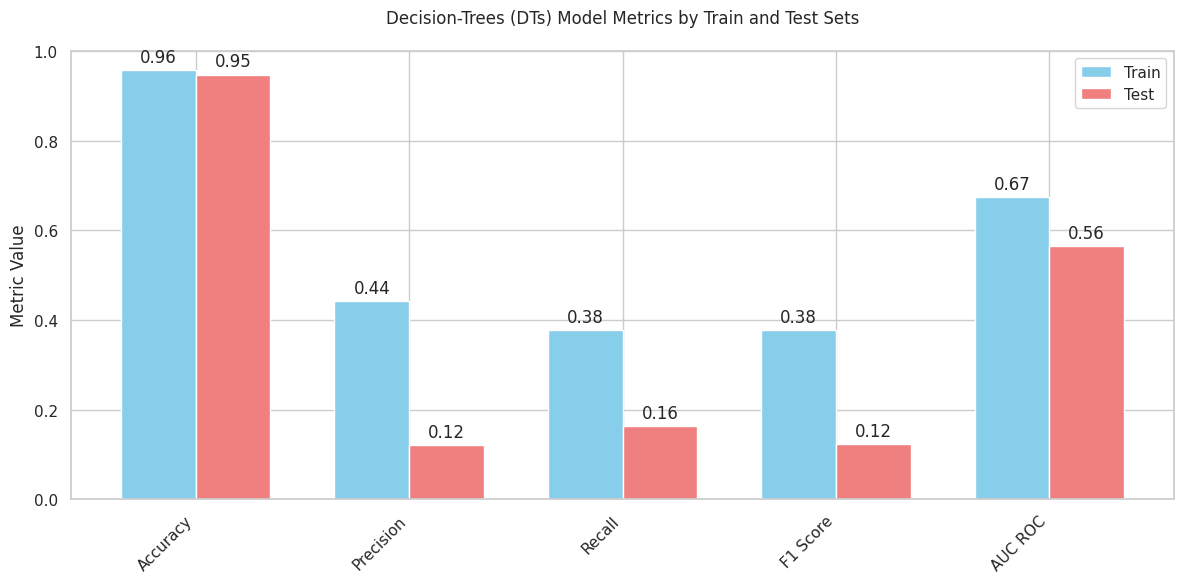

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC ROC']

# Extract values from the averaged training and testing metrics
train_values = [avg_train_metrics_dt[metric] for metric in metrics]
test_values = [avg_test_metrics_dt[metric] for metric in metrics]

# Create side-by-side bar plots
x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, train_values, width, label='Train', color='skyblue')
rects2 = ax.bar(x + width/2, test_values, width, label='Test', color='lightcoral')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Metric Value')
ax.set_title('Decision-Trees (DTs) Model Metrics by Train and Test Sets', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Annotate the bars with their values
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1)  # Set y-axis limit to match the score range (0 to 1)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Assuming dt is your trained dt model
# Assuming X_train, y_train, X_test, y_test are defined

# Predict on training and test sets
y_train_pred = dt_best_model.predict(X_train)
y_test_pred = dt_best_model.predict(X_test)

# Confusion matrices for training and test sets
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Extracting TN, FP, FN, TP from confusion matrices
tn_train, fp_train, fn_train, tp_train = conf_matrix_train.ravel()
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()

# Data for DataFrame
data = {
    'Classifier Name': ['dt', 'dt'],
    'Set Type': ['Training', 'Test'],
    'Balance Type': ['Unbalanced', 'Unbalanced'],  # Update if you have balanced data
    'Number of Training Samples': [len(X_train), len(X_test)],
    'Number of Non-Healthy Companies': [y_train.sum(), y_test.sum()],
    'TP': [tp_train, tp_test],
    'TN': [tn_train, tn_test],
    'FP': [fp_train, fp_test],
    'FN': [fn_train, fn_test],
    'ROC-AUC': [avg_train_metrics_dt['AUC ROC'], avg_test_metrics_dt['AUC ROC']]  # Replace with actual ROC-AUC values
}

# Create the DataFrame
df_dt = pd.DataFrame(data)

# Display the DataFrame
print(df_dt)

  Classifier Name  Set Type Balance Type  Number of Training Samples  \
0              dt  Training   Unbalanced                        8037   
1              dt      Test   Unbalanced                        2679   

   Number of Non-Healthy Companies  TP    TN  FP  FN   ROC-AUC  
0                              186  94  7819  32  92  0.667766  
1                               62   6  2580  37  56  0.566211  


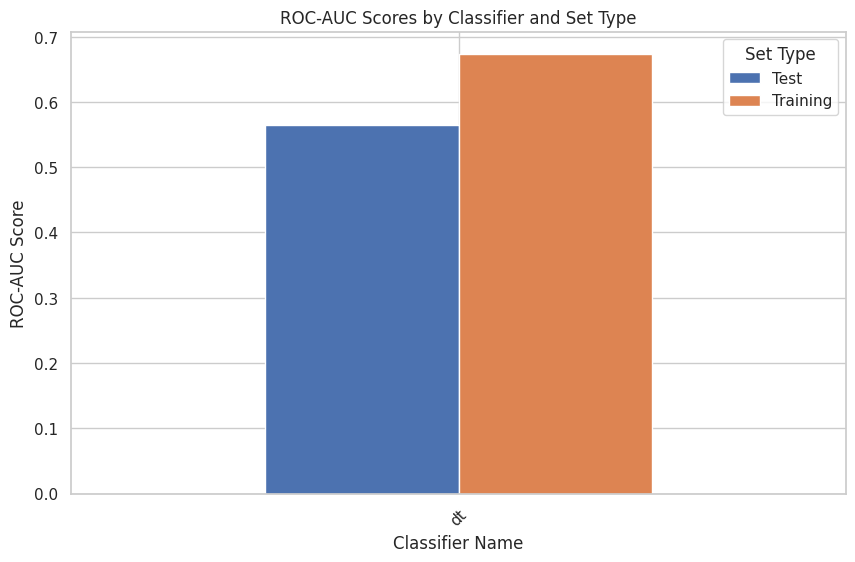

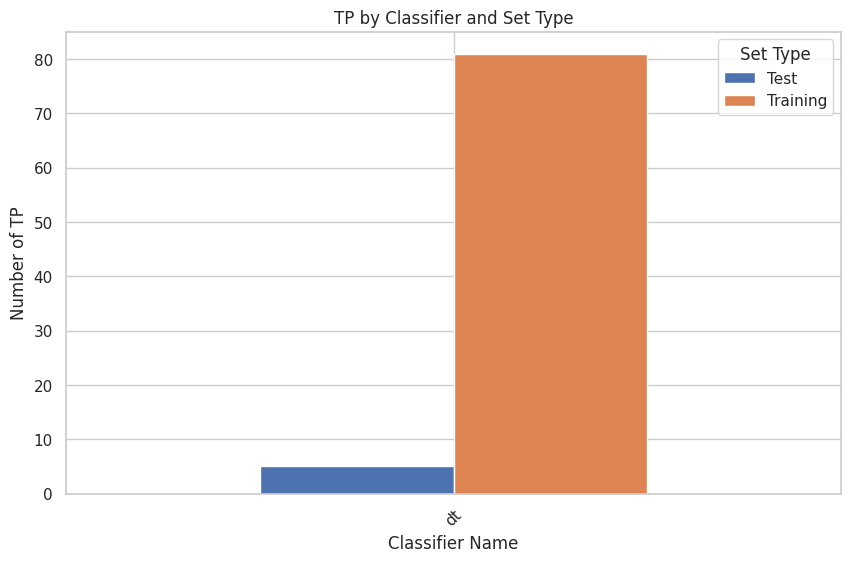

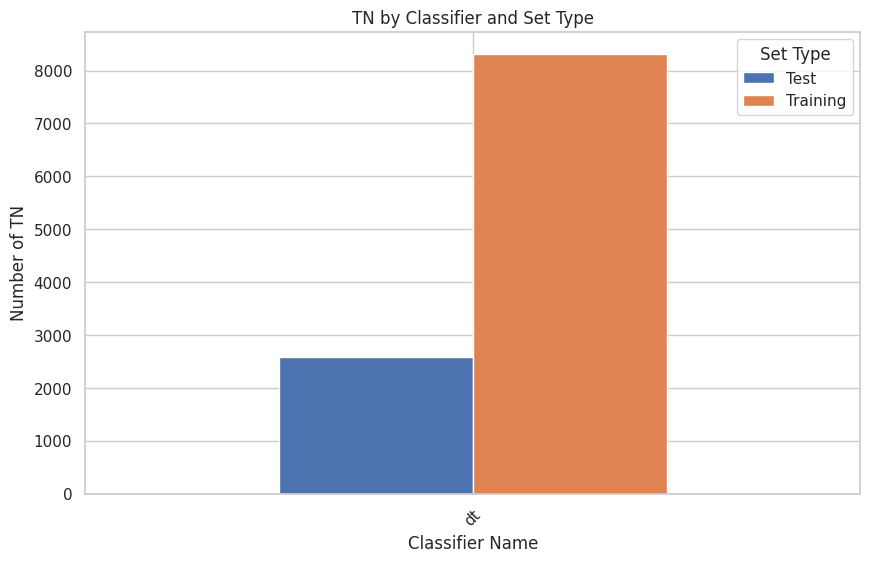

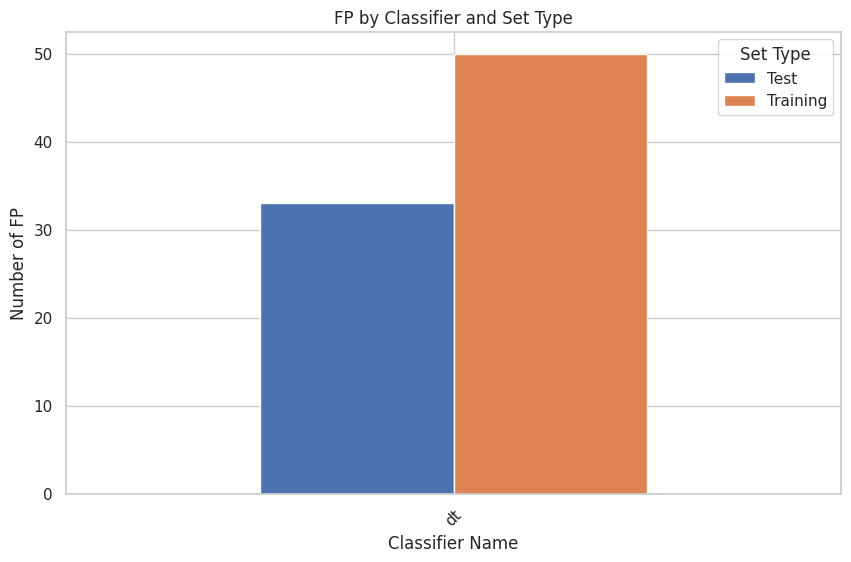

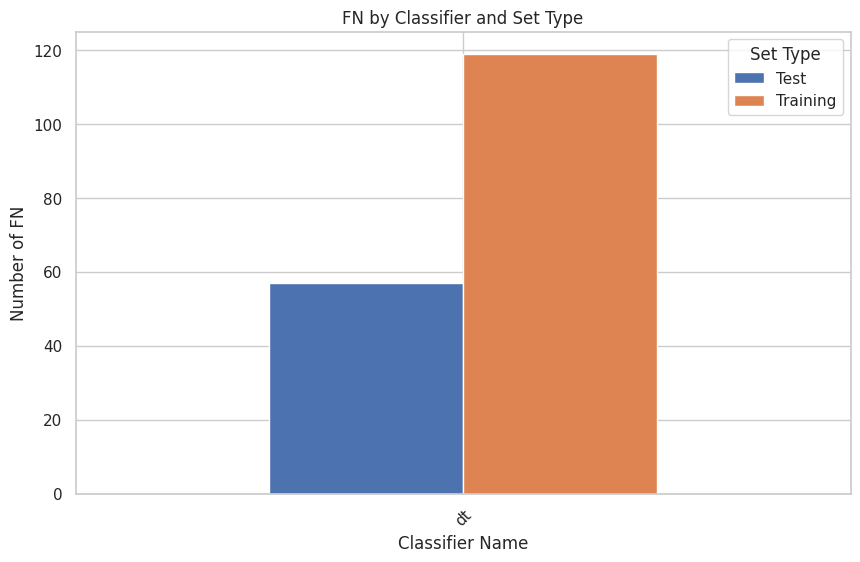

In [ ]:
import matplotlib.pyplot as plt

# Filter DataFrame for ROC-AUC values
roc_auc_data = results_df[['Classifier Name', 'Set Type', 'ROC-AUC']]

# Pivot the DataFrame for easy plotting
roc_auc_pivot = roc_auc_data.pivot(index='Classifier Name', columns='Set Type', values='ROC-AUC')

# Plot
roc_auc_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('ROC-AUC Scores by Classifier and Set Type')
plt.xlabel('Classifier Name')
plt.ylabel('ROC-AUC Score')
plt.xticks(rotation=45)
plt.show()

# Select relevant columns for confusion matrix components
confusion_matrix_components = results_df[['Classifier Name', 'Set Type', 'TP', 'TN', 'FP', 'FN']]

# Pivot and plot each component
for component in ['TP', 'TN', 'FP', 'FN']:
    component_data = confusion_matrix_components.pivot(index='Classifier Name', columns='Set Type', values=component)
    component_data.plot(kind='bar', figsize=(10, 6))
    plt.title(f'{component} by Classifier and Set Type')
    plt.xlabel('Classifier Name')
    plt.ylabel(f'Number of {component}')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
import joblib
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, f1_score, roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime

start_time = datetime.now()

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forests Classifier Parameters
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}


# Create a GridSearchCV object for Random Forest
rf_grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid,
    scoring='f1',  # Use F1 score as the evaluation metric
    cv=4  # Use 5-fold cross-validation
)

# Fit the GridSearchCV object to the data to find the best parameters
rf_grid_search.fit(X_train, y_train)

# Access the best parameters and best model from the grid search
best_params = rf_grid_search.best_params_
best_model = rf_grid_search.best_estimator_

# Average metrics across folds
avg_train_metrics_rf = {metric: np.mean(values) for metric, values in train_metrics_results.items()}
avg_test_metrics_rf = {metric: np.mean(values) for metric, values in test_metrics_results.items()}

# Print and save the results
print("Random-Forest (RF) Grid Search Results:")
print(f"Best Parameters: {best_params}")
# Rest of your code (printing and saving)




joblib.dump(best_model, 'rf_model.pkl')
with open('rf_metrics.pkl', 'wb') as file:
    pickle.dump({'train': avg_train_metrics_rf, 'test': avg_test_metrics_rf}, file)
print('Random-Forest (RF) model saved!')

# End timing and print duration
end_time = datetime.now()
duration = end_time - start_time
durationDict["RF-ES"] = duration
print("Duration: ", duration)


Random-Forest (RF) Grid Search Results:
Best Parameters: {'criterion': 'gini', 'n_estimators': 150}
Random-Forest (RF) model saved!
Duration:  0:00:26.634359


In [ ]:
# Print and save the results
print("Random-Forest(RF) Grid Search Results:")
print(f"Best Parameters: {rf_grid_search.best_params_}")
for metric in avg_train_metrics_dt:
    print(f"Average Training {metric}: {avg_train_metrics_rf[metric]:.4f}")
    print(f"Average Testing {metric}: {avg_test_metrics_rf[metric]:.4f}")

Random-Forest(RF) Grid Search Results:
Best Parameters: {'criterion': 'gini', 'n_estimators': 150}
Average Training Accuracy: 0.9565
Average Testing Accuracy: 0.9470
Average Training Precision: 0.4417
Average Testing Precision: 0.1203
Average Training Recall: 0.3784
Average Testing Recall: 0.1633
Average Training F1 Score: 0.3775
Average Testing F1 Score: 0.1237
Average Training AUC ROC: 0.6743
Average Testing AUC ROC: 0.5644


In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Assuming rf_grid_search is your trained Random Forest GridSearchCV object
# Assuming X_train, y_train, X_test, y_test are defined

# Fit the model on training data and predict on both training and testing sets
rf_grid_search.fit(X_train, y_train)
y_train_pred = rf_grid_search.best_estimator_.predict(X_train)
y_test_pred = rf_grid_search.best_estimator_.predict(X_test)

# Confusion matrices for training and test sets
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Extracting TN, FP, FN, TP from confusion matrices
tn_train, fp_train, fn_train, tp_train = conf_matrix_train.ravel()
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()

# Assuming you have the correct ROC-AUC values in avg_train_metrics_rf and avg_test_metrics_rf
# Replace with actual ROC-AUC values for Random Forest
avg_train_roc_auc = avg_train_metrics_rf['AUC ROC']  # Update this line with the actual value
avg_test_roc_auc = avg_test_metrics_rf['AUC ROC']    # Update this line with the actual value

# Data for DataFrame
data = {
    'Classifier Name': ['Random Forest', 'Random Forest'],
    'Set Type': ['Training', 'Test'],
    'Balance Type': ['Unbalanced', 'Unbalanced'],  # Update based on your data
    'Number of Training Samples': [len(X_train), len(X_test)],
    'TP': [tp_train, tp_test],
    'TN': [tn_train, tn_test],
    'FP': [fp_train, fp_test],
    'FN': [fn_train, fn_test],
    'ROC-AUC': [avg_train_roc_auc, avg_test_roc_auc]
}

# Create the DataFrame
df_rf = pd.DataFrame(data)

# Display the DataFrame
print(df_rf)


  Classifier Name  Set Type Balance Type  Number of Training Samples   TP  \
0   Random Forest  Training   Unbalanced                        8037  186   
1   Random Forest      Test   Unbalanced                        2679    1   

     TN  FP  FN   ROC-AUC  
0  7851   0   0  0.667766  
1  2617   0  61  0.566211  


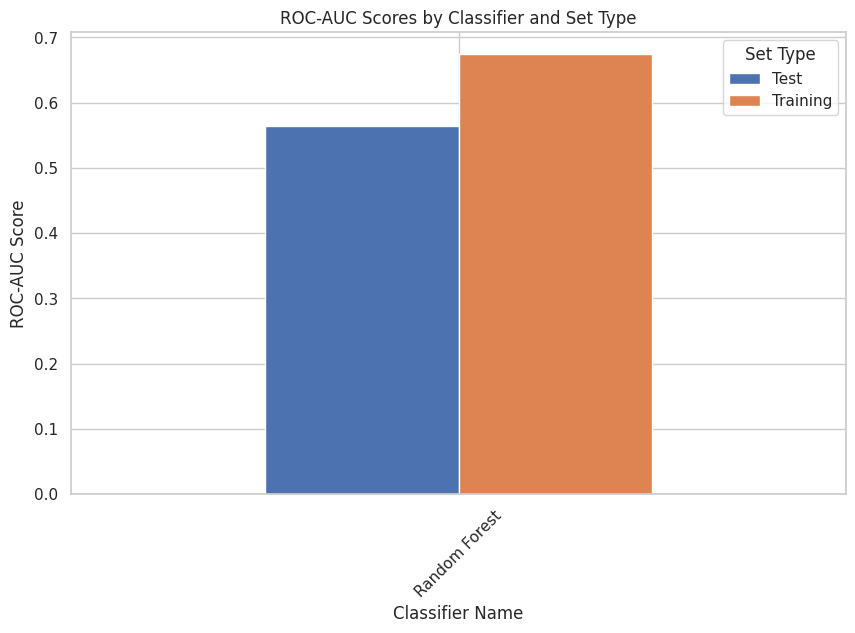

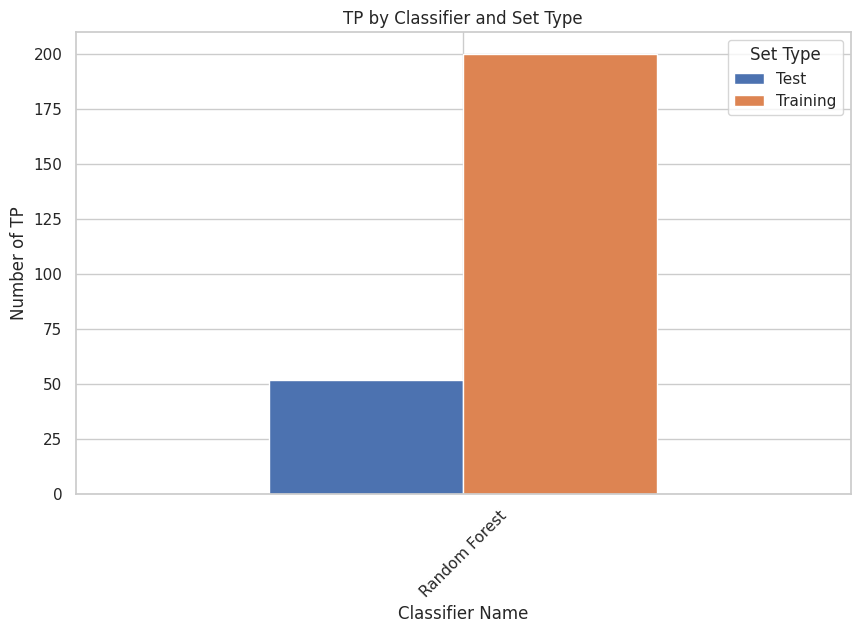

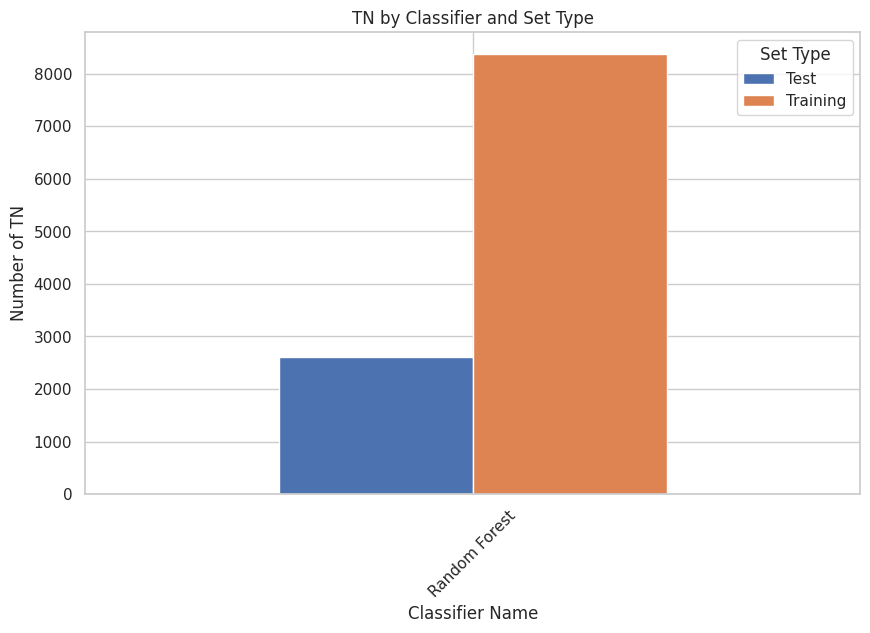

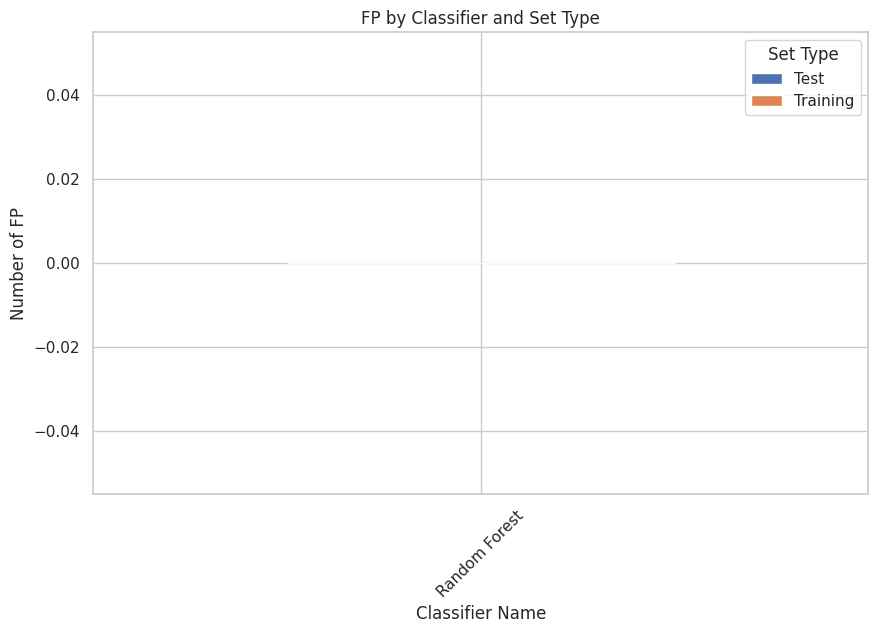

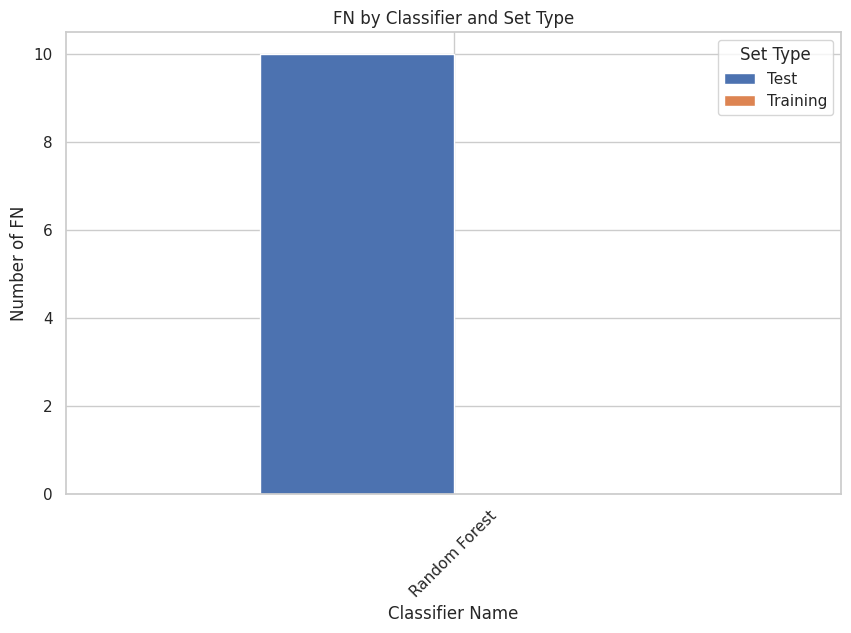

In [ ]:
import matplotlib.pyplot as plt

# Filter DataFrame for ROC-AUC values
roc_auc_data = results_df[['Classifier Name', 'Set Type', 'ROC-AUC']]

# Pivot the DataFrame for easy plotting
roc_auc_pivot = roc_auc_data.pivot(index='Classifier Name', columns='Set Type', values='ROC-AUC')

# Plot
roc_auc_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('ROC-AUC Scores by Classifier and Set Type')
plt.xlabel('Classifier Name')
plt.ylabel('ROC-AUC Score')
plt.xticks(rotation=45)
plt.show()

# Select relevant columns for confusion matrix components
confusion_matrix_components = results_df[['Classifier Name', 'Set Type', 'TP', 'TN', 'FP', 'FN']]

# Pivot and plot each component
for component in ['TP', 'TN', 'FP', 'FN']:
    component_data = confusion_matrix_components.pivot(index='Classifier Name', columns='Set Type', values=component)
    component_data.plot(kind='bar', figsize=(10, 6))
    plt.title(f'{component} by Classifier and Set Type')
    plt.xlabel('Classifier Name')
    plt.ylabel(f'Number of {component}')
    plt.xticks(rotation=45)
    plt.show()

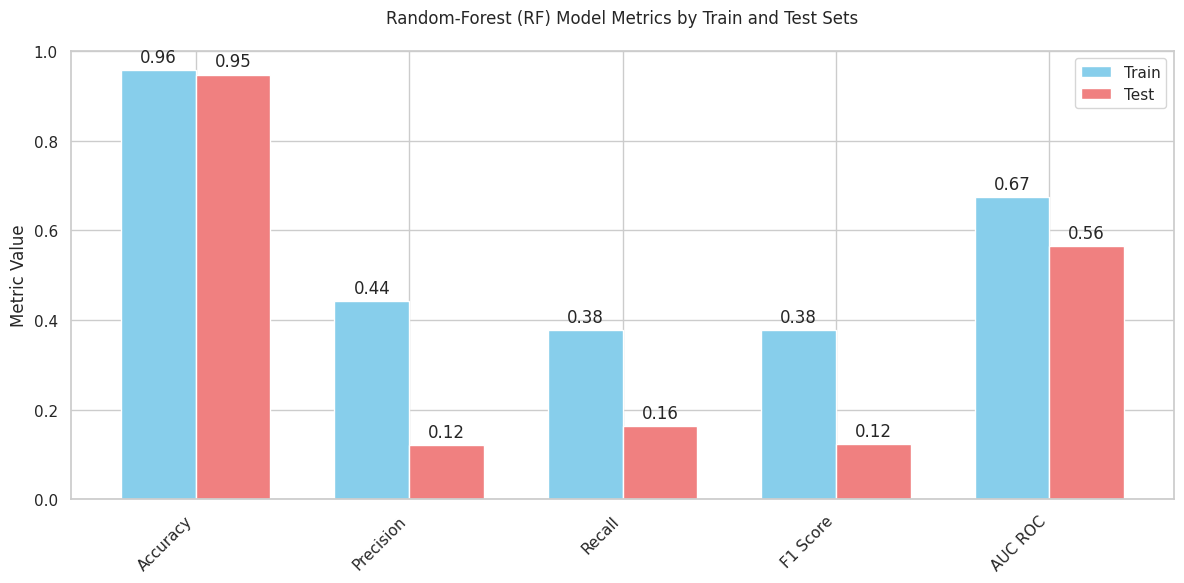

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC ROC']

# Extract values from the averaged training and testing metrics
train_values = [avg_train_metrics_rf[metric] for metric in metrics]
test_values = [avg_test_metrics_rf[metric] for metric in metrics]

# Create side-by-side bar plots
x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, train_values, width, label='Train', color='skyblue')
rects2 = ax.bar(x + width/2, test_values, width, label='Test', color='lightcoral')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Metric Value')
ax.set_title('Random-Forest (RF) Model Metrics by Train and Test Sets', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Annotate the bars with their values
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1)  # Set y-axis limit to match the score range (0 to 1)
plt.tight_layout()
plt.show()


In [ ]:
import joblib
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, f1_score, roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix, matthews_corrcoef
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from datetime import datetime


start_time = datetime.now()

# Linear Discriminant Analysis (LDA) Parameters
lda_param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': [None, 'auto'],
    'n_components': [None, 1, 2, 3]  # Adjust the number of components as needed
}

# Grid Search Setup for LDA
lda_classifier = LinearDiscriminantAnalysis()
lda_grid_search = GridSearchCV(lda_classifier, lda_param_grid, cv=4, scoring=make_scorer(f1_score), n_jobs=-1)
lda_grid_search.fit(X, y)
lda_best_model = lda_grid_search.best_estimator_

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    metrics = evaluate_model_during_grid_search(lda_best_model, X_train, X_test, y_train, y_test)
    for metric in train_metrics_results:
        train_metrics_results[metric].append(metrics['train'][metric])
        test_metrics_results[metric].append(metrics['test'][metric])




# Average metrics across folds
avg_train_metrics_lda = {metric: np.mean(values) for metric, values in train_metrics_results.items()}
avg_test_metrics_lda = {metric: np.mean(values) for metric, values in test_metrics_results.items()}

# Print and save the results
print("LDA Grid Search Results:")
print(f"Best Parameters: {lda_grid_search.best_params_}")
for metric in avg_train_metrics_lda:
    print(f"Average Training {metric}: {avg_train_metrics_lda[metric]:.4f}")
    print(f"Average Testing {metric}: {avg_test_metrics_lda[metric]:.4f}")





joblib.dump(lda_best_model, 'lda_model.pkl')
with open('lda_metrics.pkl', 'wb') as file:
    pickle.dump({'train': avg_train_metrics_lda, 'test': avg_test_metrics_lda}, file)
print('LDA model saved!')

# End timing and print duration
end_time = datetime.now()
duration = end_time - start_time
durationDict["LDA"] = duration
print("Duration: ", duration)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
56 fits failed out of a total of 96.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py", line 615, in fit
    raise NotImplementedError("shrinkage not supported with 'svd' solver.")
NotImplementedError: shrinkage not supported with 'svd' solver.

----------------------------------------------------------------------------

LDA Grid Search Results:
Best Parameters: {'n_components': None, 'shrinkage': None, 'solver': 'svd'}
Average Training Accuracy: 0.9600
Average Testing Accuracy: 0.9538
Average Training Precision: 0.3206
Average Testing Precision: 0.1184
Average Training Recall: 0.2634
Average Testing Recall: 0.1263
Average Training F1 Score: 0.2676
Average Testing F1 Score: 0.1045
Average Training AUC ROC: 0.6200
Average Testing AUC ROC: 0.5499
LDA model saved!
Duration:  0:00:00.896356


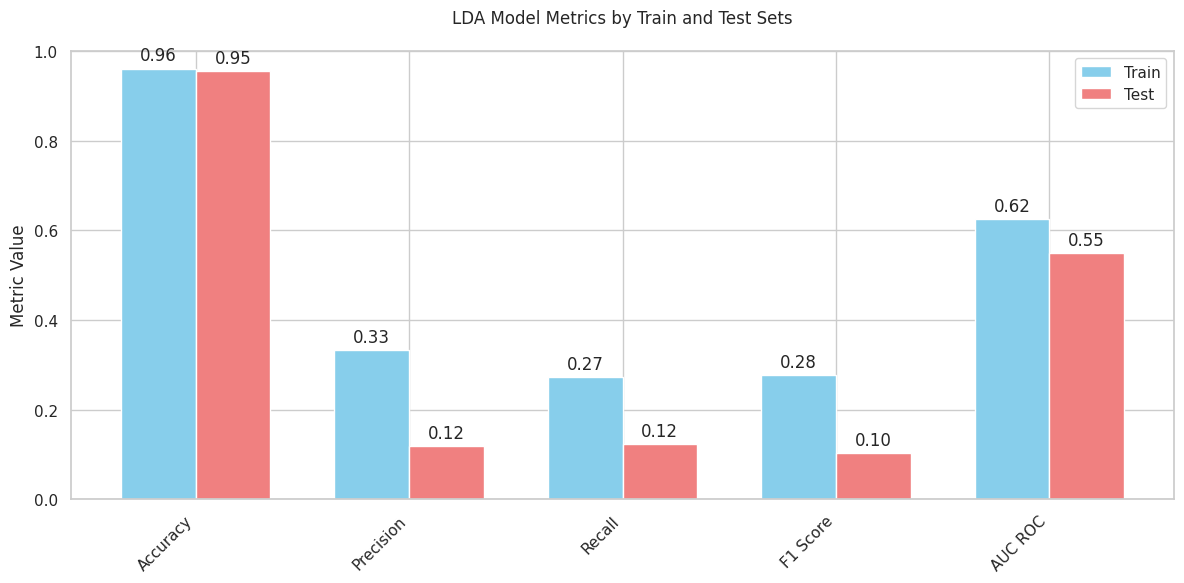

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC ROC']

# Extract values from the averaged training and testing metrics
train_values = [avg_train_metrics_lda[metric] for metric in metrics]
test_values = [avg_test_metrics_lda[metric] for metric in metrics]

# Create side-by-side bar plots
x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, train_values, width, label='Train', color='skyblue')
rects2 = ax.bar(x + width/2, test_values, width, label='Test', color='lightcoral')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Metric Value')
ax.set_title('LDA Model Metrics by Train and Test Sets', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Annotate the bars with their values
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1)  # Set y-axis limit to match the score range (0 to 1)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Assuming lda is your trained lda model
# Assuming X_train, y_train, X_test, y_test are defined

# Predict on training and test sets
y_train_pred = lda_best_model.predict(X_train)
y_test_pred = lda_best_model.predict(X_test)

# Confusion matrices for training and test sets
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Extracting TN, FP, FN, TP from confusion matrices
tn_train, fp_train, fn_train, tp_train = conf_matrix_train.ravel()
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()

# Data for DataFrame
data = {
    'Classifier Name': ['LDA', 'LDA'],
    'Set Type': ['Training', 'Test'],
    'Balance Type': ['Unbalanced', 'Unbalanced'],  # Update if you have balanced data
    'Number of Training Samples': [len(X_train), len(X_test)],
    'Number of Non-Healthy Companies': [y_train.sum(), y_test.sum()],
    'TP': [tp_train, tp_test],
    'TN': [tn_train, tn_test],
    'FP': [fp_train, fp_test],
    'FN': [fn_train, fn_test],
    'ROC-AUC': [avg_train_metrics_lda ['AUC ROC'], avg_test_metrics_lda ['AUC ROC']]  # Replace with actual ROC-AUC values
}

# Create the DataFrame
df_lda = pd.DataFrame(data)

# Display the DataFrame
print(df_lda)

  Classifier Name  Set Type Balance Type  Number of Training Samples  \
0             LDA  Training   Unbalanced                        8037   
1             LDA      Test   Unbalanced                        2679   

   Number of Non-Healthy Companies  TP    TN  FP   FN   ROC-AUC  
0                              186   8  7773  78  178  0.619992  
1                               62   4  2605  12   58  0.549862  


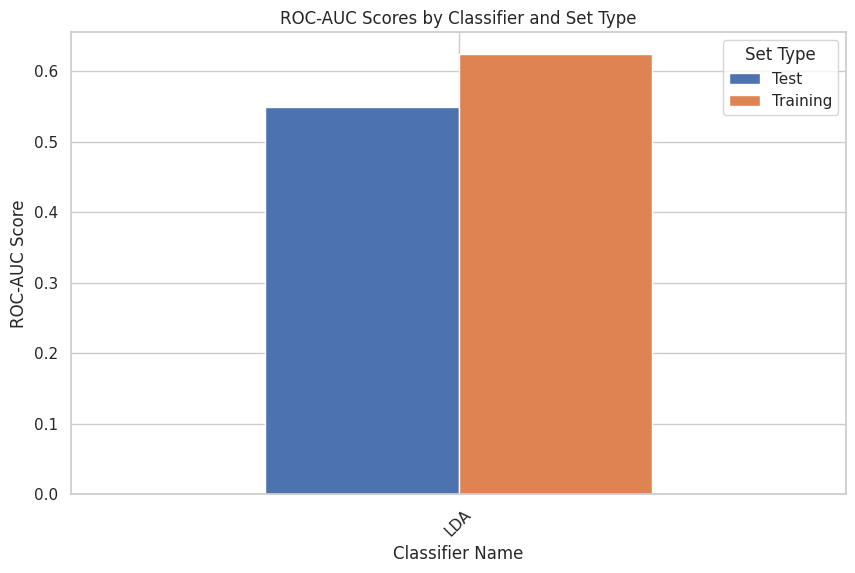

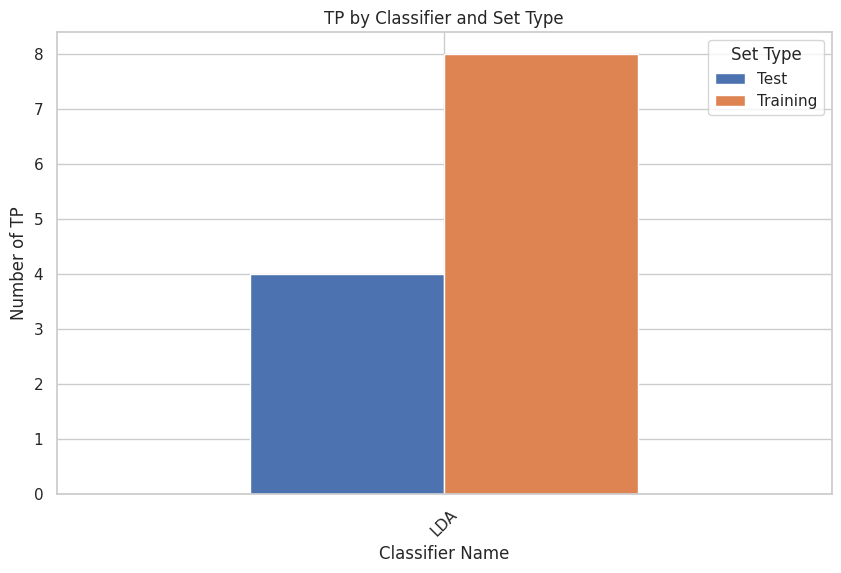

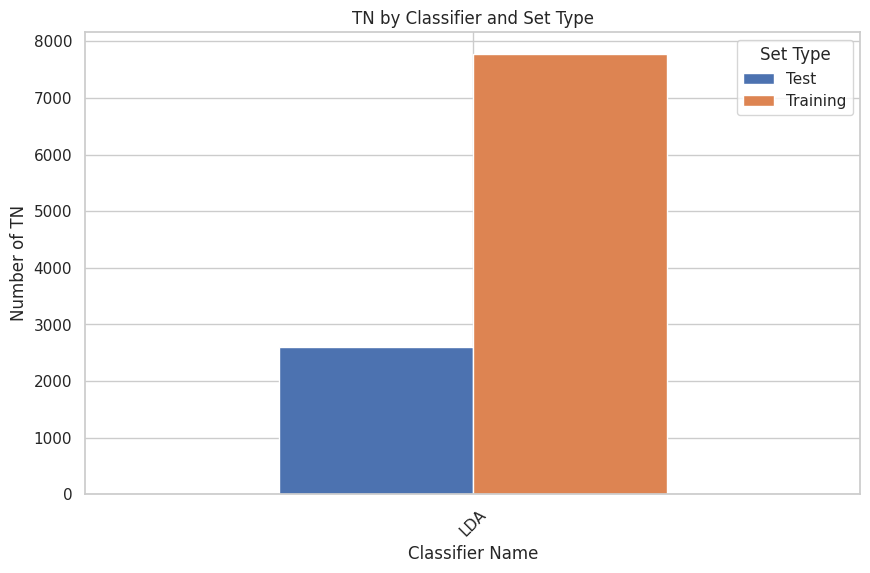

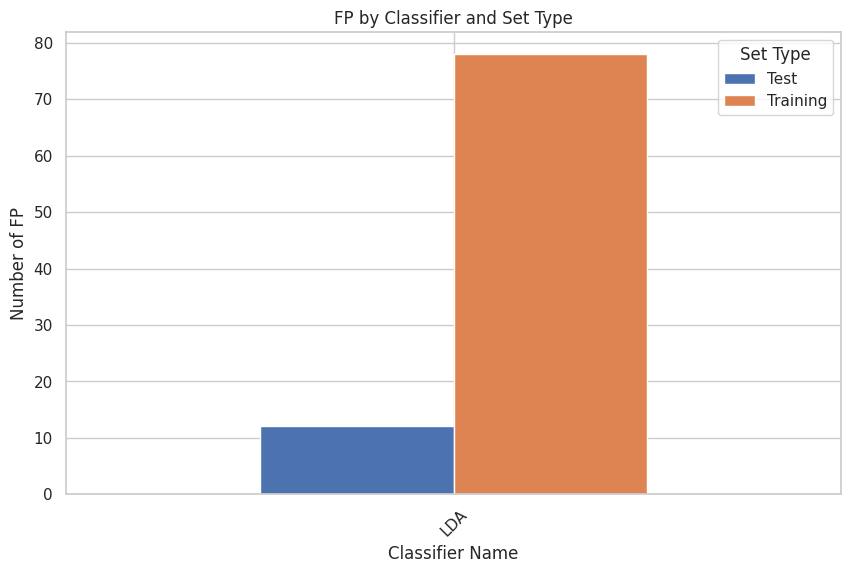

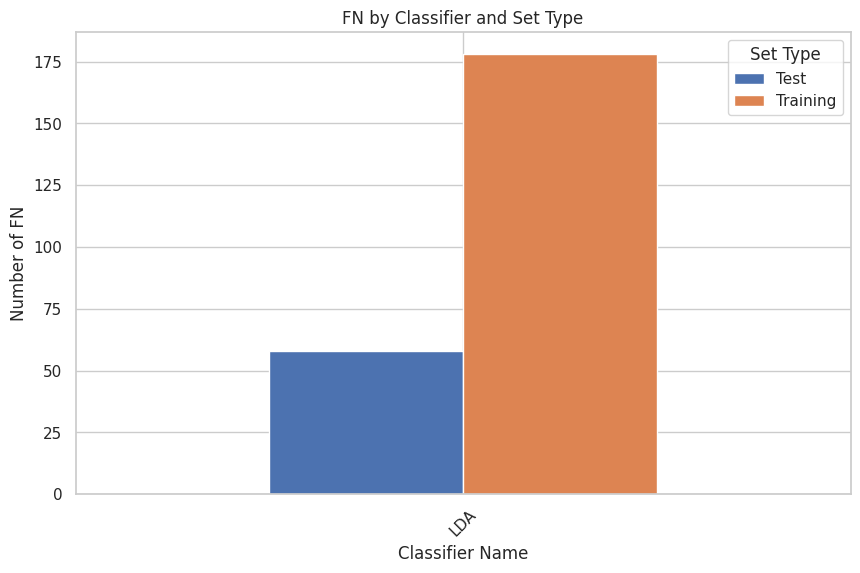

In [ ]:
import matplotlib.pyplot as plt

# Filter DataFrame for ROC-AUC values
roc_auc_data = results_df[['Classifier Name', 'Set Type', 'ROC-AUC']]

# Pivot the DataFrame for easy plotting
roc_auc_pivot = roc_auc_data.pivot(index='Classifier Name', columns='Set Type', values='ROC-AUC')

# Plot
roc_auc_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('ROC-AUC Scores by Classifier and Set Type')
plt.xlabel('Classifier Name')
plt.ylabel('ROC-AUC Score')
plt.xticks(rotation=45)
plt.show()

# Select relevant columns for confusion matrix components
confusion_matrix_components = results_df[['Classifier Name', 'Set Type', 'TP', 'TN', 'FP', 'FN']]

# Pivot and plot each component
for component in ['TP', 'TN', 'FP', 'FN']:
    component_data = confusion_matrix_components.pivot(index='Classifier Name', columns='Set Type', values=component)
    component_data.plot(kind='bar', figsize=(10, 6))
    plt.title(f'{component} by Classifier and Set Type')
    plt.xlabel('Classifier Name')
    plt.ylabel(f'Number of {component}')
    plt.xticks(rotation=45)
    plt.show()

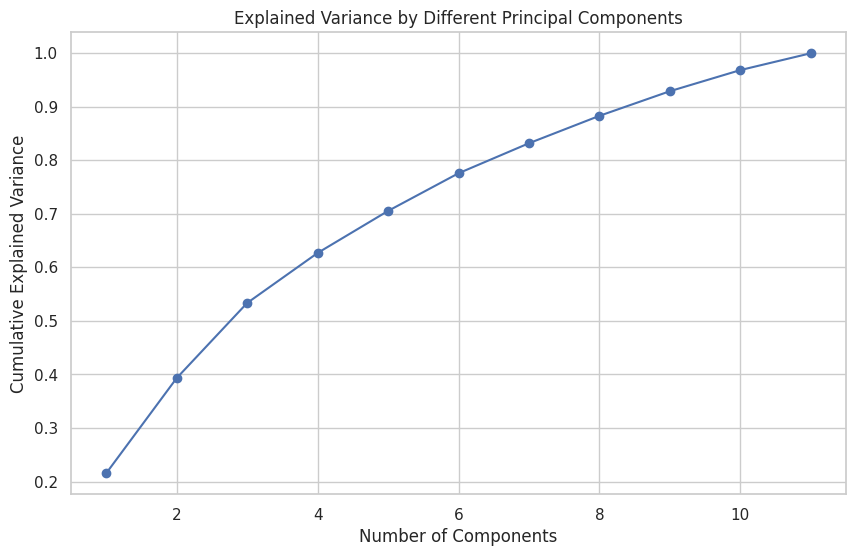

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



# Standardizing the features
X_standardized = (X - X.mean()) / X.std()

# Performing PCA
pca = PCA().fit(X_standardized)

# Cumulative variance explained by the principal components
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Plotting the cumulative variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Different Principal Components')
plt.grid(True)
plt.show()



In [ ]:
# Applying PCA with 10 components
pca_10 = PCA(n_components=10)
X_reduced_10 = pca_10.fit_transform(X_standardized)

# Checking the shape of the reduced dataset
X_reduced_10.shape


(10716, 10)

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, f1_score, roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix, matthews_corrcoef
import joblib
import numpy as np
from datetime import datetime

# Assume X and y are your data and labels

# Start timer
start_time = datetime.now()

# Applying PCA for dimensionality reduction
pca = pca_10
X_reduced = X_reduced_10

# Reduced SVM Parameter Grid
svm_param_grid = {
    'C': [1, 10, 100],  # Reduced number of values for C
    'gamma': [0.01, 0.001, 0.0001],  # Reduced number of values for gamma
    'kernel': ['rbf']
}

# Grid Search Setup for SVM
svm_classifier = SVC(probability=True, verbose=True, tol=1e-3)  # Increased tolerance for faster convergence
svm_grid_search = GridSearchCV(svm_classifier, svm_param_grid, cv=3, scoring=make_scorer(f1_score), n_jobs=-1)  # Reduced CV folds
svm_grid_search.fit(X_reduced, y)
svm_best_model = svm_grid_search.best_estimator_

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    metrics = evaluate_model_during_grid_search(svm_best_model, X_train, X_test, y_train, y_test)
    for metric in train_metrics_results:
        train_metrics_results[metric].append(metrics['train'][metric])
        test_metrics_results[metric].append(metrics['test'][metric])




# Average metrics across folds
avg_train_metrics_svm = {metric: np.mean(values) for metric, values in train_metrics_results.items()}
avg_test_metrics_svm = {metric: np.mean(values) for metric, values in test_metrics_results.items()}

# Print and save the results
print("SVM Grid Search Results:")
print(f"Best Parameters: {svm_grid_search.best_params_}")
for metric in avg_train_metrics_svm:
    print(f"Average Training {metric}: {avg_train_metrics_svm[metric]:.4f}")
    print(f"Average Testing {metric}: {avg_test_metrics_svm[metric]:.4f}")




joblib.dump(svm_best_model, 'svm_model.pkl')
with open('svm_metrics.pkl', 'wb') as file:
    pickle.dump({'train': avg_train_metrics_svm, 'test': avg_test_metrics_svm}, file)
print('SVM model saved!')

# End timing and print duration
end_time = datetime.now()
duration = end_time - start_time
durationDict["SVM"] = duration
print("Duration: ", duration)



[LibSVM][LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[LibSVM]SVM Grid Search Results:
Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Average Training Accuracy: 0.9642
Average Testing Accuracy: 0.9595
Average Training Precision: 0.2404
Average Testing Precision: 0.0888
Average Training Recall: 0.1976
Average Testing Recall: 0.0948
Average Training F1 Score: 0.2007
Average Testing F1 Score: 0.0784
Average Training AUC ROC: 0.5900
Average Testing AUC ROC: 0.5374
SVM model saved!
Duration:  0:00:57.834557


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


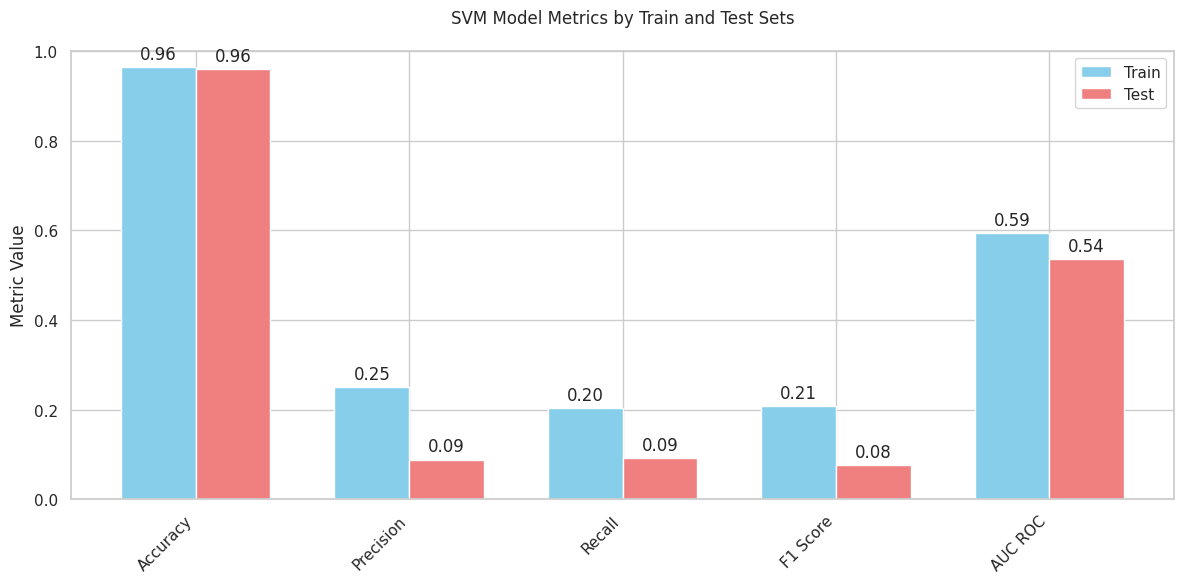

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC ROC']

# Extract values from the averaged training and testing metrics
train_values = [avg_train_metrics_svm[metric] for metric in metrics]
test_values = [avg_test_metrics_svm[metric] for metric in metrics]

# Create side-by-side bar plots
x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, train_values, width, label='Train', color='skyblue')
rects2 = ax.bar(x + width/2, test_values, width, label='Test', color='lightcoral')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Metric Value')
ax.set_title('SVM Model Metrics by Train and Test Sets', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Annotate the bars with their values
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1)  # Set y-axis limit to match the score range (0 to 1)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Assuming svm is your trained svm model
# Assuming X_train, y_train, X_test, y_test are defined

# Predict on training and test sets
y_train_pred = svm_best_model.predict(X_train)
y_test_pred = svm_best_model.predict(X_test)

# Confusion matrices for training and test sets
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Extracting TN, FP, FN, TP from confusion matrices
tn_train, fp_train, fn_train, tp_train = conf_matrix_train.ravel()
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()

# Data for DataFrame
data = {
    'Classifier Name': ['SVM', 'SVM'],
    'Set Type': ['Training', 'Test'],
    'Balance Type': ['Unbalanced', 'Unbalanced'],  # Update if you have balanced data
    'Number of Training Samples': [len(X_train), len(X_test)],
    'Number of Non-Healthy Companies': [y_train.sum(), y_test.sum()],
    'TP': [tp_train, tp_test],
    'TN': [tn_train, tn_test],
    'FP': [fp_train, fp_test],
    'FN': [fn_train, fn_test],
    'ROC-AUC': [avg_train_metrics_svm ['AUC ROC'], avg_test_metrics_svm ['AUC ROC']]  # Replace with actual ROC-AUC values
}

# Create the DataFrame
df_svm = pd.DataFrame(data)

# Display the DataFrame
print(df_svm)

  Classifier Name  Set Type Balance Type  Number of Training Samples  \
0             SVM  Training   Unbalanced                        8037   
1             SVM      Test   Unbalanced                        2679   

   Number of Non-Healthy Companies  TP    TN  FP   FN   ROC-AUC  
0                              186   0  7851   0  186  0.589994  
1                               62   0  2617   0   62  0.537396  


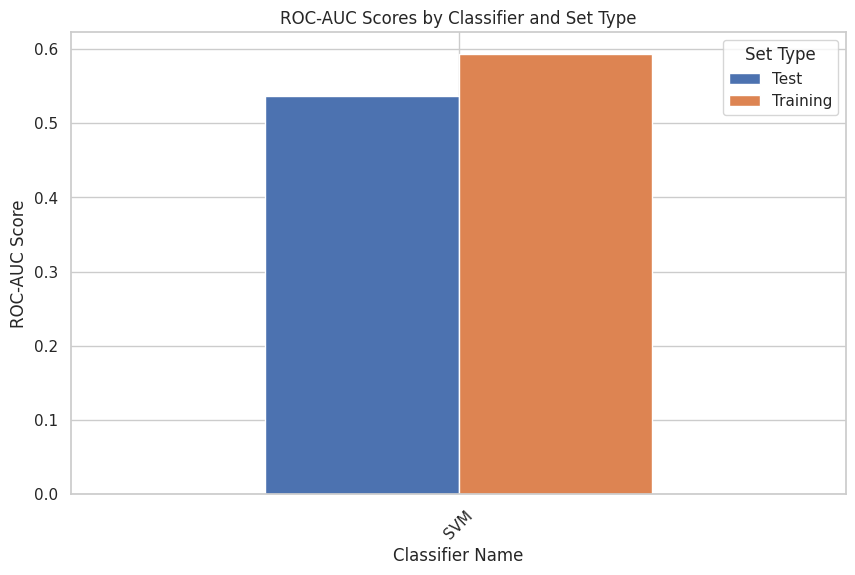

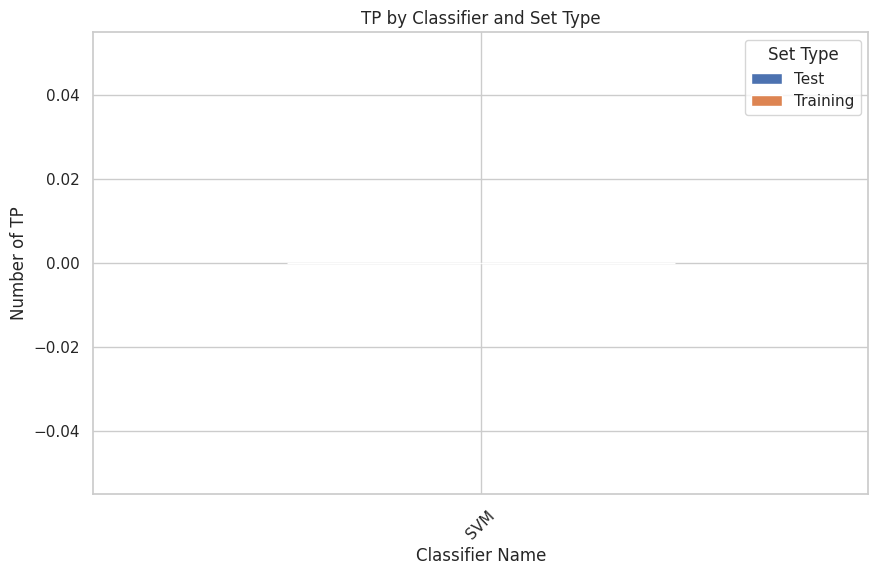

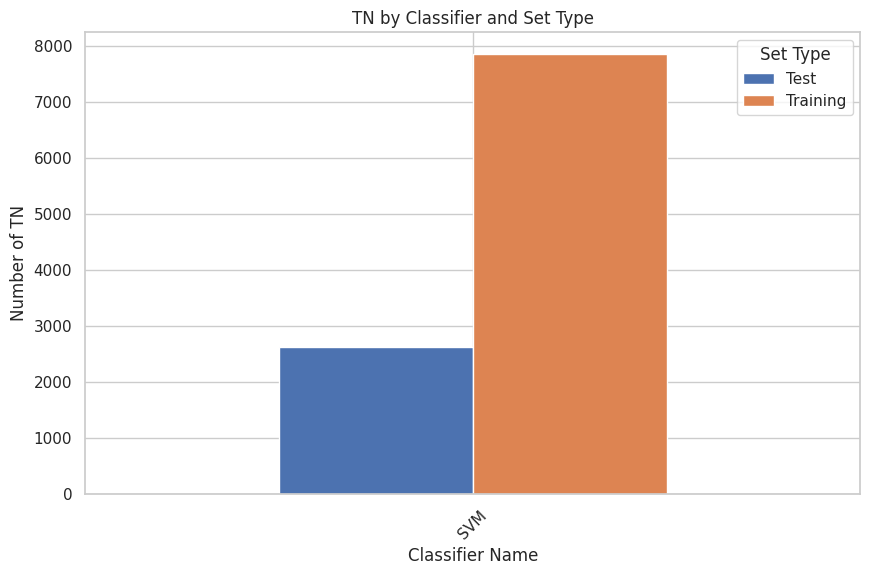

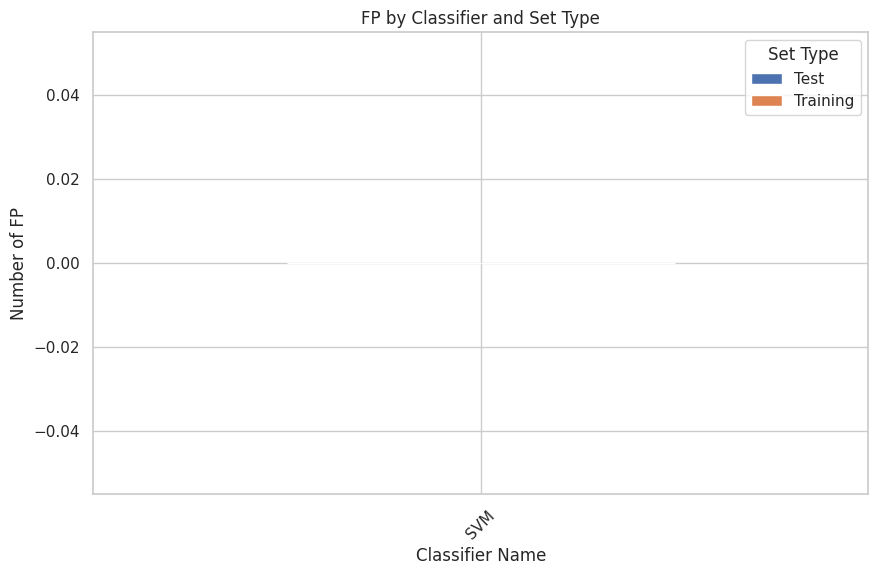

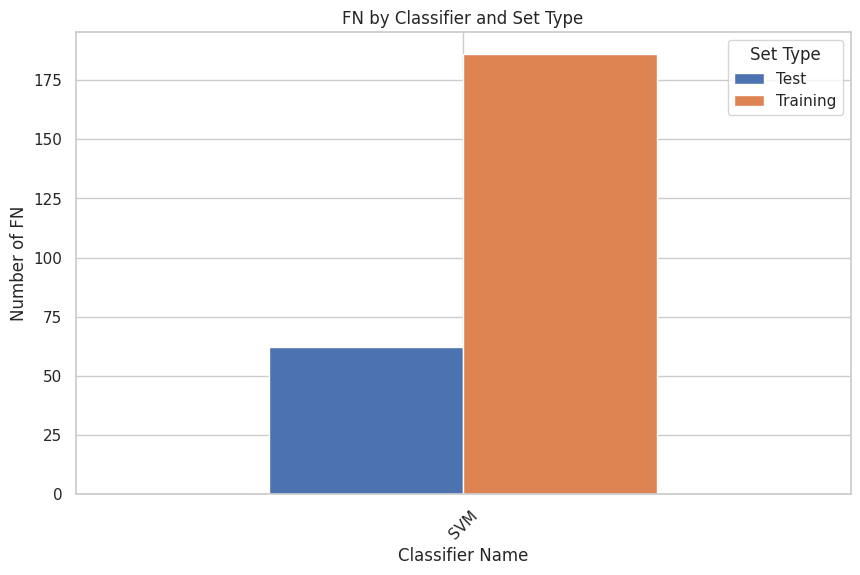

In [ ]:
import matplotlib.pyplot as plt

# Filter DataFrame for ROC-AUC values
roc_auc_data = results_df[['Classifier Name', 'Set Type', 'ROC-AUC']]

# Pivot the DataFrame for easy plotting
roc_auc_pivot = roc_auc_data.pivot(index='Classifier Name', columns='Set Type', values='ROC-AUC')

# Plot
roc_auc_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('ROC-AUC Scores by Classifier and Set Type')
plt.xlabel('Classifier Name')
plt.ylabel('ROC-AUC Score')
plt.xticks(rotation=45)
plt.show()

# Select relevant columns for confusion matrix components
confusion_matrix_components = results_df[['Classifier Name', 'Set Type', 'TP', 'TN', 'FP', 'FN']]

# Pivot and plot each component
for component in ['TP', 'TN', 'FP', 'FN']:
    component_data = confusion_matrix_components.pivot(index='Classifier Name', columns='Set Type', values=component)
    component_data.plot(kind='bar', figsize=(10, 6))
    plt.title(f'{component} by Classifier and Set Type')
    plt.xlabel('Classifier Name')
    plt.ylabel(f'Number of {component}')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
import joblib
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, f1_score, roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix, matthews_corrcoef
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from datetime import datetime

# Assume X and y are your data and labels

# Start timer
start_time = datetime.now()

# Logistic Regression Parameters
logistic_param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # You can adjust the C values
    'solver': ['liblinear', 'saga']
}

# Grid Search Setup for Logistic Regression
logistic_classifier = LogisticRegression(max_iter=10000)
logistic_grid_search = GridSearchCV(logistic_classifier, logistic_param_grid, cv=4, scoring=make_scorer(f1_score), n_jobs=-1)
logistic_grid_search.fit(X, y)
logistic_best_model = logistic_grid_search.best_estimator_

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    metrics = evaluate_model_during_grid_search(logistic_best_model, X_train, X_test, y_train, y_test)
    for metric in train_metrics_results:
        train_metrics_results[metric].append(metrics['train'][metric])
        test_metrics_results[metric].append(metrics['test'][metric])




# Average metrics across folds
avg_train_metrics_logistic = {metric: np.mean(values) for metric, values in train_metrics_results.items()}
avg_test_metrics_logistic = {metric: np.mean(values) for metric, values in test_metrics_results.items()}

# Print and save the results
print("Logistic Reg Search Results:")
print(f"Best Parameters: {logistic_grid_search.best_params_}")
for metric in avg_train_metrics_logistic:
    print(f"Average Training {metric}: {avg_train_metrics_logistic[metric]:.4f}")
    print(f"Average Testing {metric}: {avg_test_metrics_logistic[metric]:.4f}")



joblib.dump(logistic_best_model, 'logistic_model.pkl')
with open('logistic_metrics.pkl', 'wb') as file:
    pickle.dump({'train': avg_train_metrics_logistic, 'test': avg_test_metrics_logistic}, file)
print('Logistic Reg model saved!')

# End timing and print duration
end_time = datetime.now()
duration = end_time - start_time
durationDict["Logistic Reg"] = duration
print("Duration: ", duration)


Logistic Reg Search Results:
Best Parameters: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
Average Training Accuracy: 0.9668
Average Testing Accuracy: 0.9630
Average Training Precision: 0.1923
Average Testing Precision: 0.0710
Average Training Recall: 0.1581
Average Testing Recall: 0.0758
Average Training F1 Score: 0.1605
Average Testing F1 Score: 0.0627
Average Training AUC ROC: 0.5720
Average Testing AUC ROC: 0.5299
Logistic Reg model saved!
Duration:  0:00:02.796981


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

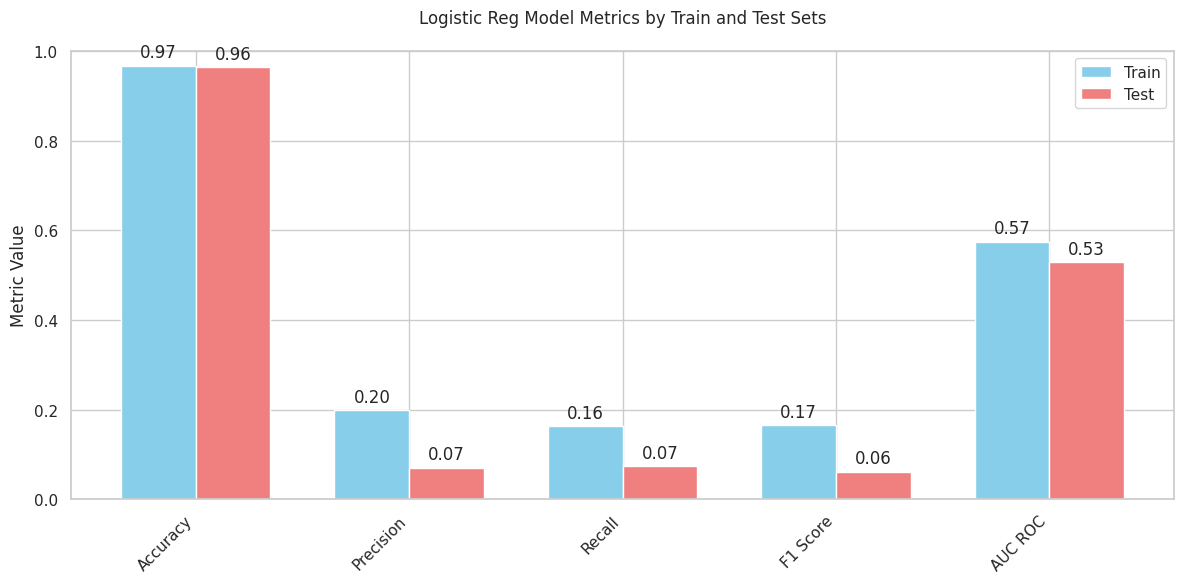

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC ROC']

# Extract values from the averaged training and testing metrics
train_values = [avg_train_metrics_logistic[metric] for metric in metrics]
test_values = [avg_test_metrics_logistic[metric] for metric in metrics]

# Create side-by-side bar plots
x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, train_values, width, label='Train', color='skyblue')
rects2 = ax.bar(x + width/2, test_values, width, label='Test', color='lightcoral')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Metric Value')
ax.set_title('Logistic Reg Model Metrics by Train and Test Sets', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Annotate the bars with their values
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1)  # Set y-axis limit to match the score range (0 to 1)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Assuming logistic reg is your trained  logistic model
# Assuming X_train, y_train, X_test, y_test are defined

# Predict on training and test sets
y_train_pred =  logistic_best_model.predict(X_train)
y_test_pred =  logistic_best_model.predict(X_test)

# Confusion matrices for training and test sets
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Extracting TN, FP, FN, TP from confusion matrices
tn_train, fp_train, fn_train, tp_train = conf_matrix_train.ravel()
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()

# Data for DataFrame
data = {
    'Classifier Name': ['Logistic Reg', 'Logistic Reg'],
    'Set Type': ['Training', 'Test'],
    'Balance Type': ['Unbalanced', 'Unbalanced'],  # Update if you have balanced data
    'Number of Training Samples': [len(X_train), len(X_test)],
    'Number of Non-Healthy Companies': [y_train.sum(), y_test.sum()],
    'TP': [tp_train, tp_test],
    'TN': [tn_train, tn_test],
    'FP': [fp_train, fp_test],
    'FN': [fn_train, fn_test],
    'ROC-AUC': [avg_train_metrics_logistic['AUC ROC'], avg_test_metrics_logistic['AUC ROC']]  # Replace with actual ROC-AUC values
}

# Create the DataFrame
df_logistic = pd.DataFrame(data)

# Display the DataFrame
print(df_logistic)

  Classifier Name  Set Type Balance Type  Number of Training Samples  \
0    Logistic Reg  Training   Unbalanced                        8037   
1    Logistic Reg      Test   Unbalanced                        2679   

   Number of Non-Healthy Companies  TP    TN  FP   FN   ROC-AUC  
0                              186   0  7851   0  186  0.571995  
1                               62   0  2617   0   62  0.529917  


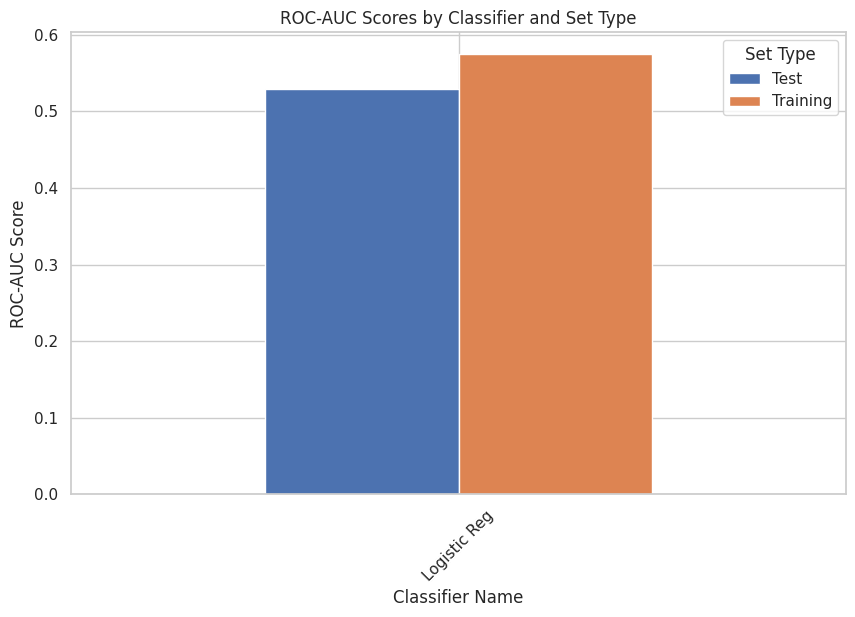

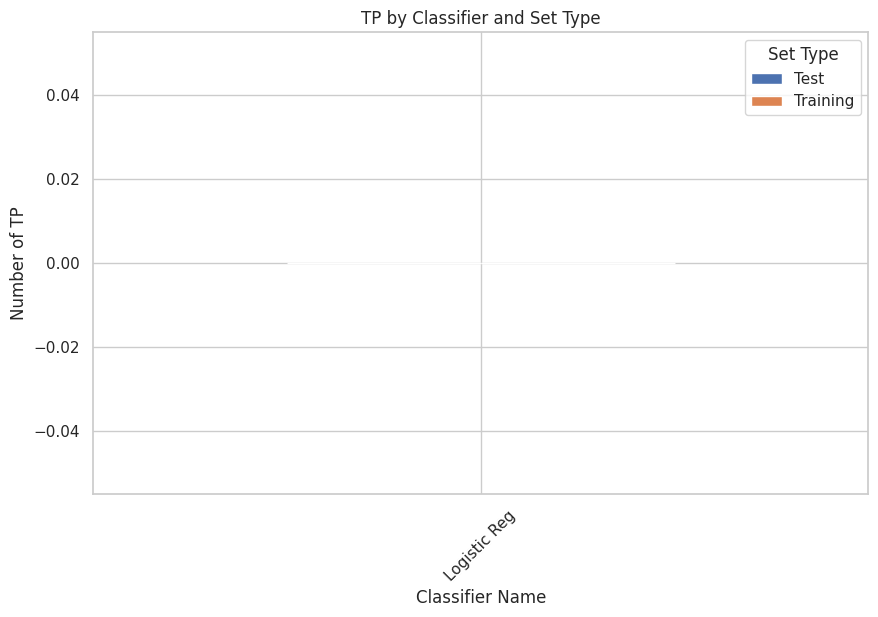

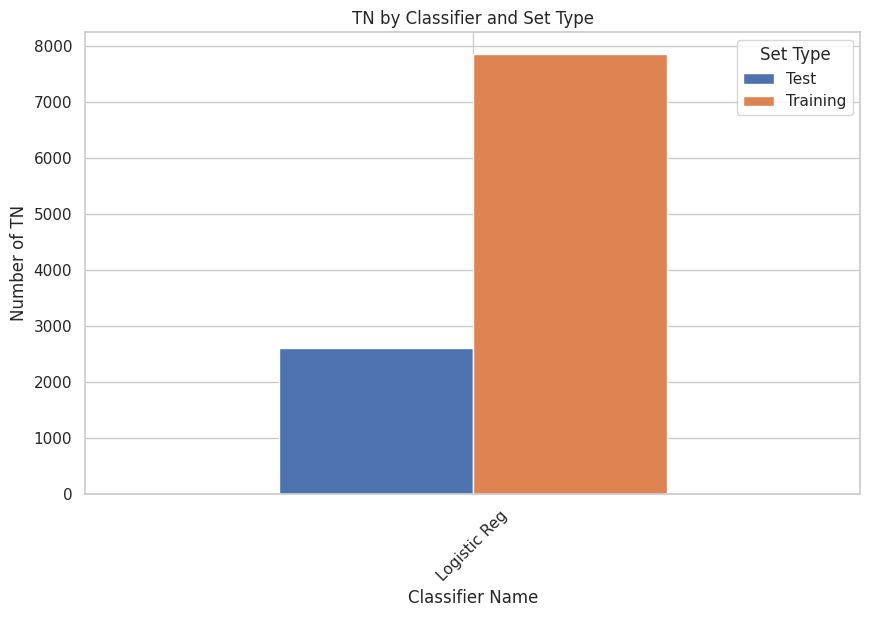

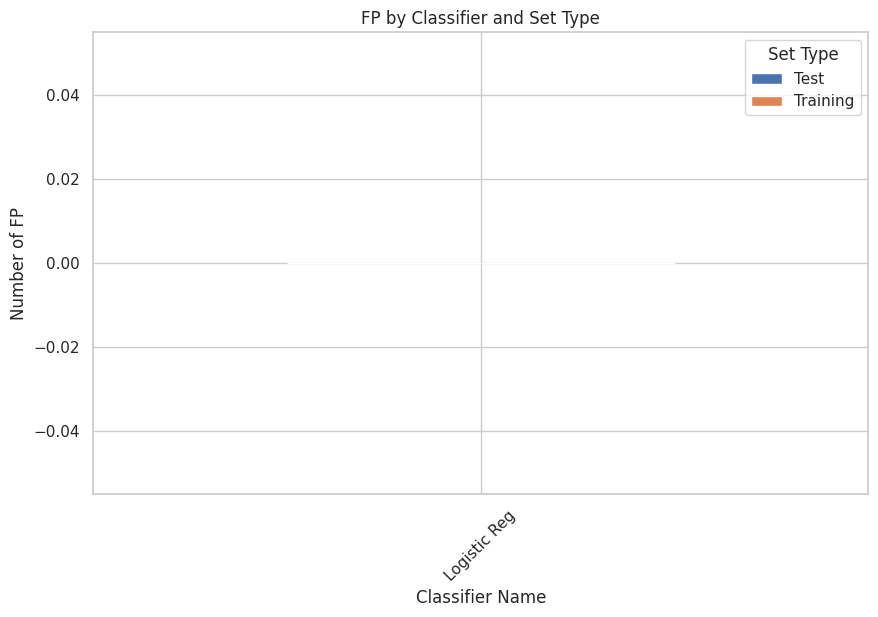

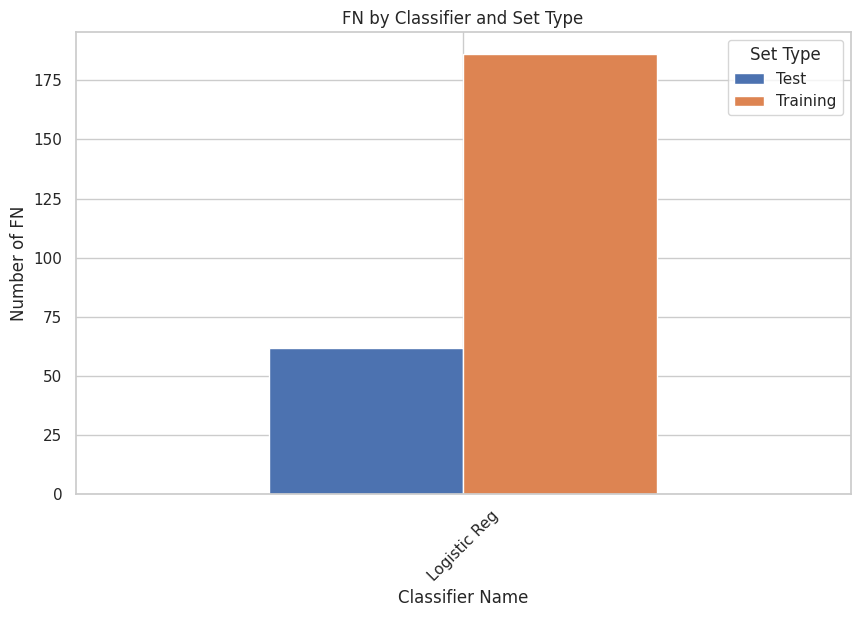

In [ ]:
import matplotlib.pyplot as plt

# Filter DataFrame for ROC-AUC values
roc_auc_data = results_df[['Classifier Name', 'Set Type', 'ROC-AUC']]

# Pivot the DataFrame for easy plotting
roc_auc_pivot = roc_auc_data.pivot(index='Classifier Name', columns='Set Type', values='ROC-AUC')

# Plot
roc_auc_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('ROC-AUC Scores by Classifier and Set Type')
plt.xlabel('Classifier Name')
plt.ylabel('ROC-AUC Score')
plt.xticks(rotation=45)
plt.show()

# Select relevant columns for confusion matrix components
confusion_matrix_components = results_df[['Classifier Name', 'Set Type', 'TP', 'TN', 'FP', 'FN']]

# Pivot and plot each component
for component in ['TP', 'TN', 'FP', 'FN']:
    component_data = confusion_matrix_components.pivot(index='Classifier Name', columns='Set Type', values=component)
    component_data.plot(kind='bar', figsize=(10, 6))
    plt.title(f'{component} by Classifier and Set Type')
    plt.xlabel('Classifier Name')
    plt.ylabel(f'Number of {component}')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
import joblib
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, f1_score, roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix, matthews_corrcoef
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


# Start timer
start_time = datetime.now()

# QDA Parameters
qda_classifier = QuadraticDiscriminantAnalysis()

param_grid_qda = {
    'reg_param': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],  # Regularization parameter
    'store_covariance': [True, False],           # Whether to store covariance matrices
    'priors': [None, [0.5, 0.5], [0.7, 0.3], [0.3, 0.7]],  # Prior probabilities for each class
}






# Create a GridSearchCV object
qda_grid_search = GridSearchCV(qda_classifier, param_grid_qda, scoring='f1', cv=5)
qda_grid_search.fit(X_train, y_train)
best_params_qda = qda_grid_search.best_params_
qda_best_model = qda_grid_search.best_estimator_

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    metrics = evaluate_model_during_grid_search(qda_best_model, X_train, X_test, y_train, y_test)
    for metric in train_metrics_results:
        train_metrics_results[metric].append(metrics['train'][metric])
        test_metrics_results[metric].append(metrics['test'][metric])




# Average metrics across folds
avg_train_metrics_qda = {metric: np.mean(values) for metric, values in train_metrics_results.items()}
avg_test_metrics_qda = {metric: np.mean(values) for metric, values in test_metrics_results.items()}

# Print and save the results
print("QDA Search Results:")
print(f"Best Parameters: {qda_grid_search.best_params_}")
for metric in avg_train_metrics_qda:
    print(f"Average Training {metric}: {avg_train_metrics_qda[metric]:.4f}")
    print(f"Average Testing {metric}: {avg_test_metrics_qda[metric]:.4f}")



joblib.dump(qda_best_model, 'qda_model.pkl')
with open('qda_metrics.pkl', 'wb') as file:
    pickle.dump({'train': avg_train_metrics_qda, 'test': avg_test_metrics_qda}, file)
print('QDA model saved!')

# End timing and print duration
end_time = datetime.now()
duration = end_time - start_time
durationDict["Qda"] = duration
print("Duration: ", duration)


QDA Search Results:
Best Parameters: {'priors': [0.7, 0.3], 'reg_param': 0.1, 'store_covariance': True}
Average Training Accuracy: 0.9611
Average Testing Accuracy: 0.9580
Average Training Precision: 0.1806
Average Testing Precision: 0.0784
Average Training Recall: 0.1835
Average Testing Recall: 0.1095
Average Training F1 Score: 0.1630
Average Testing F1 Score: 0.0793
Average Training AUC ROC: 0.5815
Average Testing AUC ROC: 0.5438
QDA model saved!
Duration:  0:00:02.161210


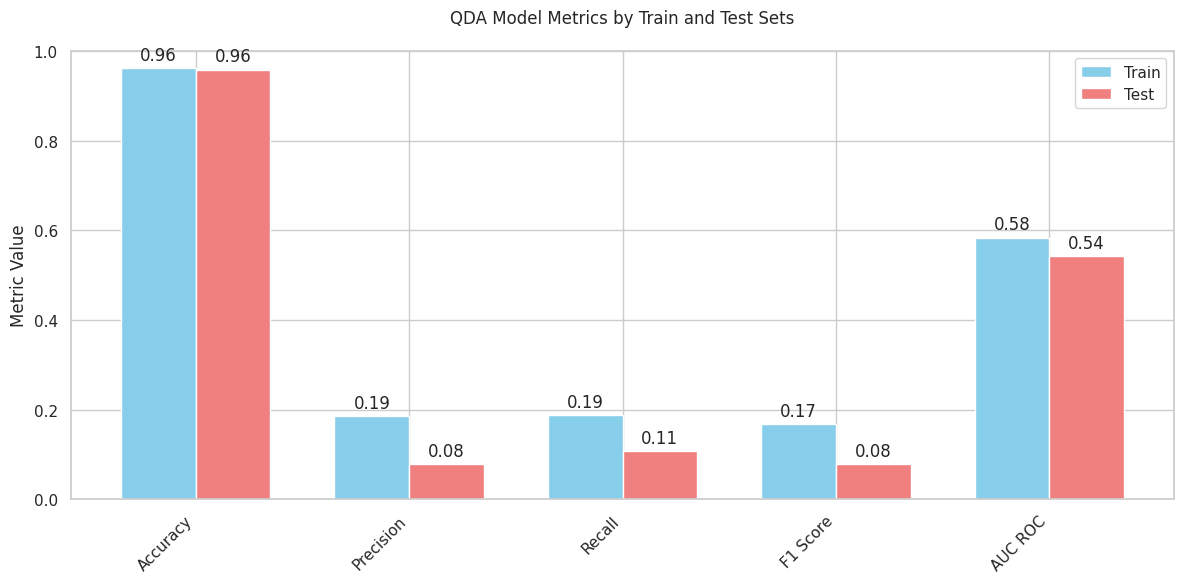

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC ROC']

# Extract values from the averaged training and testing metrics
train_values = [avg_train_metrics_qda[metric] for metric in metrics]
test_values = [avg_test_metrics_qda[metric] for metric in metrics]

# Create side-by-side bar plots
x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, train_values, width, label='Train', color='skyblue')
rects2 = ax.bar(x + width/2, test_values, width, label='Test', color='lightcoral')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Metric Value')
ax.set_title('QDA Model Metrics by Train and Test Sets', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Annotate the bars with their values
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1)  # Set y-axis limit to match the score range (0 to 1)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Assuming qda is your trained qda model
# Assuming X_train, y_train, X_test, y_test are defined

# Predict on training and test sets
y_train_pred = qda_best_model.predict(X_train)
y_test_pred = qda_best_model.predict(X_test)

# Confusion matrices for training and test sets
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Extracting TN, FP, FN, TP from confusion matrices
tn_train, fp_train, fn_train, tp_train = conf_matrix_train.ravel()
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()

# Data for DataFrame
data = {
    'Classifier Name': ['QDA  ', 'QDA'],
    'Set Type': ['Training', 'Test'],
    'Balance Type': ['Unbalanced', 'Unbalanced'],  # Update if you have balanced data
    'Number of Training Samples': [len(X_train), len(X_test)],
    'Number of Non-Healthy Companies': [y_train.sum(), y_test.sum()],
    'TP': [tp_train, tp_test],
    'TN': [tn_train, tn_test],
    'FP': [fp_train, fp_test],
    'FN': [fn_train, fn_test],
    'ROC-AUC': [avg_train_metrics_qda['AUC ROC'], avg_test_metrics_qda['AUC ROC']]  # Replace with actual ROC-AUC values
}

# Create the DataFrame
df_qda = pd.DataFrame(data)

# Display the DataFrame
print(df_qda)

  Classifier Name  Set Type Balance Type  Number of Training Samples  \
0           QDA    Training   Unbalanced                        8037   
1             QDA      Test   Unbalanced                        2679   

   Number of Non-Healthy Companies  TP    TN   FP   FN   ROC-AUC  
0                              186  59  7440  411  127  0.581475  
1                               62  14  2477  140   48  0.543833  


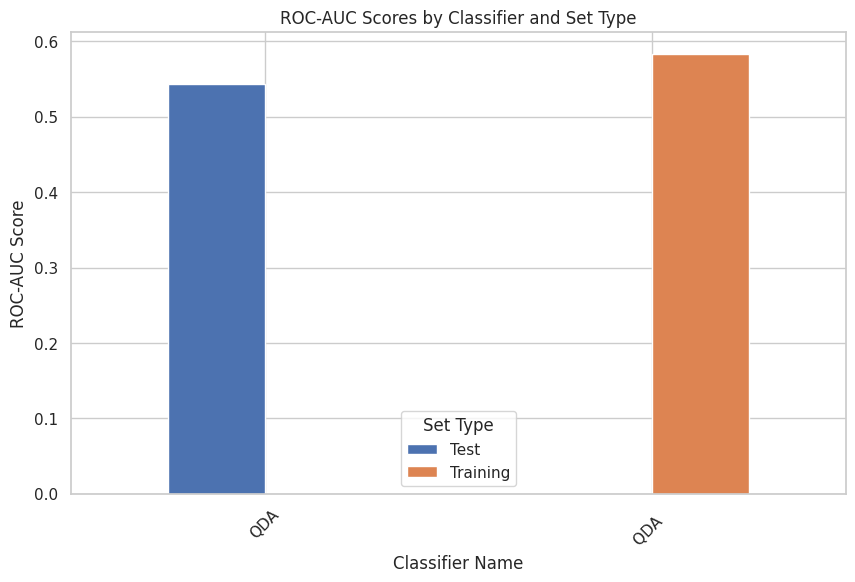

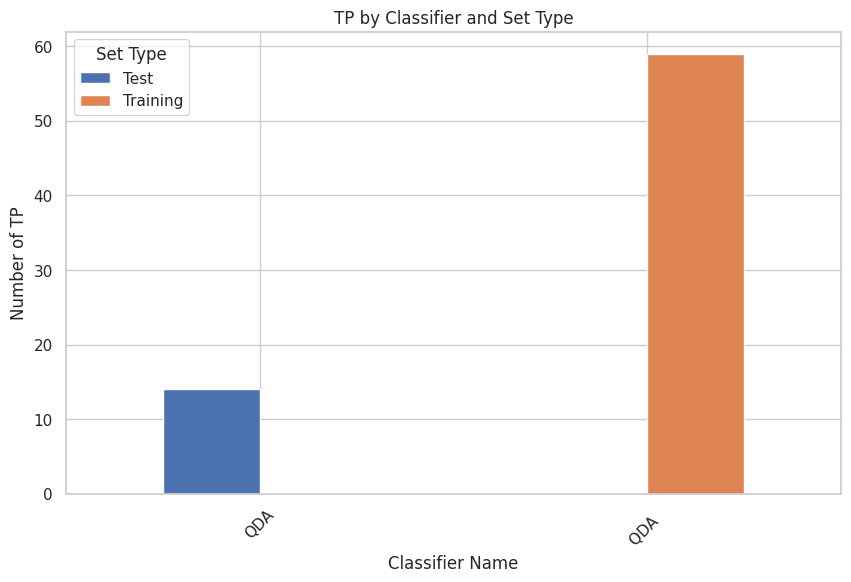

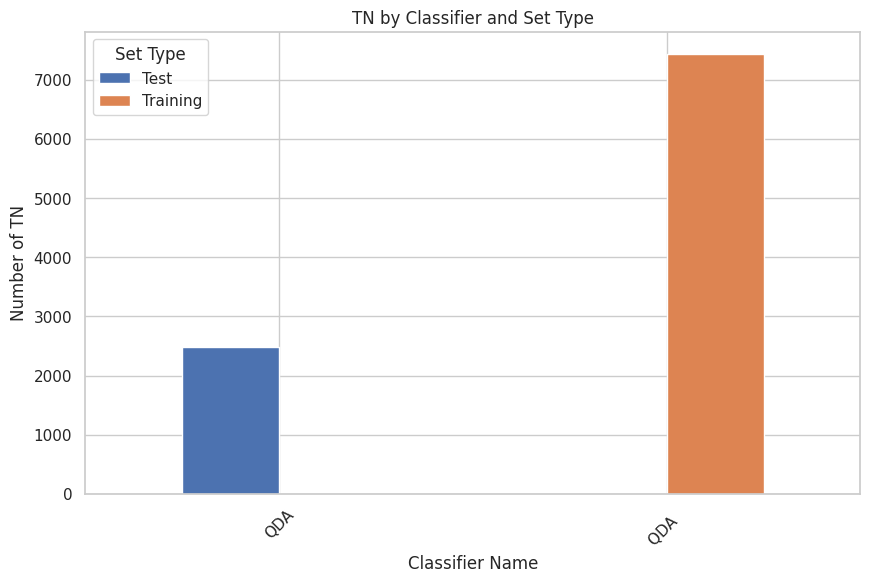

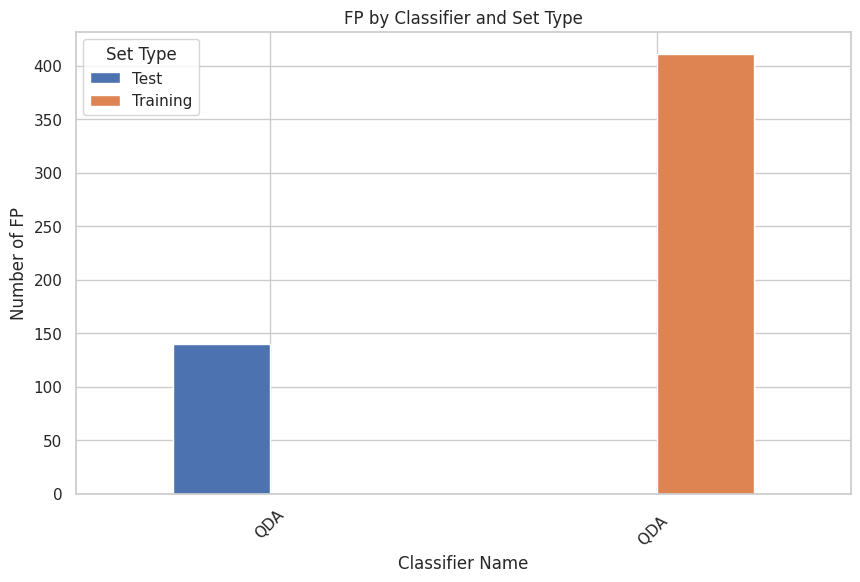

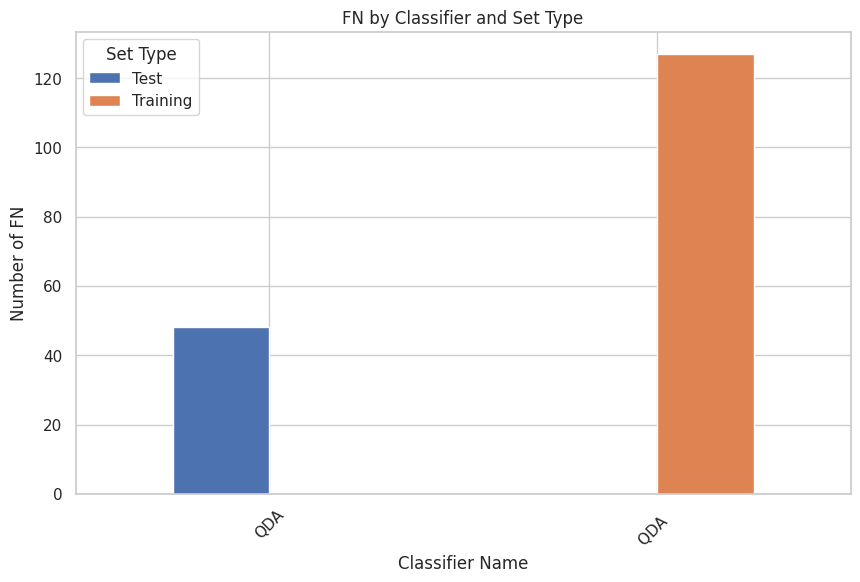

In [ ]:
import matplotlib.pyplot as plt

# Filter DataFrame for ROC-AUC values
roc_auc_data = results_df[['Classifier Name', 'Set Type', 'ROC-AUC']]

# Pivot the DataFrame for easy plotting
roc_auc_pivot = roc_auc_data.pivot(index='Classifier Name', columns='Set Type', values='ROC-AUC')

# Plot
roc_auc_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('ROC-AUC Scores by Classifier and Set Type')
plt.xlabel('Classifier Name')
plt.ylabel('ROC-AUC Score')
plt.xticks(rotation=45)
plt.show()

# Select relevant columns for confusion matrix components
confusion_matrix_components = results_df[['Classifier Name', 'Set Type', 'TP', 'TN', 'FP', 'FN']]

# Pivot and plot each component
for component in ['TP', 'TN', 'FP', 'FN']:
    component_data = confusion_matrix_components.pivot(index='Classifier Name', columns='Set Type', values=component)
    component_data.plot(kind='bar', figsize=(10, 6))
    plt.title(f'{component} by Classifier and Set Type')
    plt.xlabel('Classifier Name')
    plt.ylabel(f'Number of {component}')
    plt.xticks(rotation=45)
    plt.show()

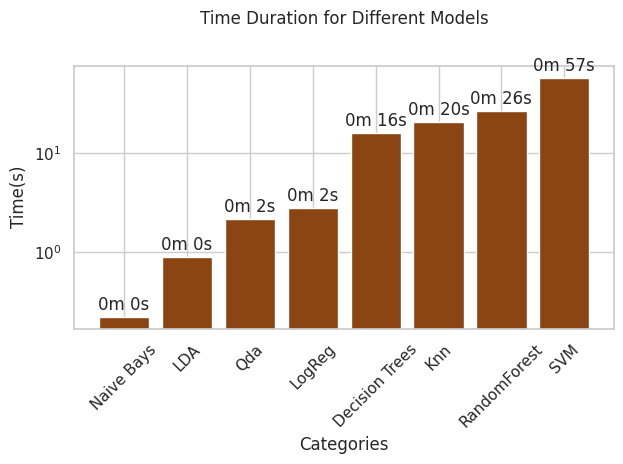

In [ ]:
import matplotlib.pyplot as plt

# Time durations in seconds
durations_seconds = [duration.total_seconds() for duration in durationDict.values()]

# Model names or categories
categories = list(durationDict.keys())

# Create a list of (category, duration) tuples and sort them by duration in ascending order
sorted_categories_and_durations = sorted(zip(categories, durations_seconds), key=lambda x: x[1])

# Separate the sorted tuples back into separate lists
sorted_categories, sorted_durations_seconds = zip(*sorted_categories_and_durations)

# Convert durations to minutes and seconds with "m"
durations_formatted = []
for duration_seconds in sorted_durations_seconds:
    duration_minutes = int(duration_seconds // 60)
    duration_seconds_remaining = int(duration_seconds % 60)
    duration_formatted = f"{duration_minutes}m {duration_seconds_remaining}s"
    durations_formatted.append(duration_formatted)

# Create a bar graph with a logarithmic scale
plt.bar(sorted_categories, sorted_durations_seconds, color='saddlebrown')
plt.yscale('log')  # Use a logarithmic scale on the y-axis

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Time(s)')
plt.title('Time Duration for Different Models',pad=30)

# Annotate the bars with time durations
for i, duration in enumerate(durations_formatted):
    plt.annotate(duration, (sorted_categories[i], sorted_durations_seconds[i]), textcoords="offset points", xytext=(0, 5), ha='center')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Ensures labels are not cut off
plt.show()


In [ ]:
import joblib
import pickle
import os
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Define a function to load metrics
def load_metrics(model_name):
    try:
        with open(f'{model_name}_metrics.pkl', 'rb') as file:
            return pickle.load(file)
    except FileNotFoundError:
        return None

# Define a function to calculate the composite score
def calculate_composite_score(f1_score, auc_roc_score, f1_weight=0.55, auc_roc_weight=0.45):
    return (f1_weight * f1_score) + (auc_roc_weight * auc_roc_score)

# Define a dictionary to store the models
models = {
    "best_knn_": joblib.load('knn_model.pkl'),
    "best_naive_bayes": joblib.load('nb_model.pkl'),
    "best_decision_tree": joblib.load('dt_model.pkl'),
    "best_random_forest": joblib.load('rf_model.pkl'),
    "best_lda": joblib.load('lda_model.pkl'),
    "best_svm": joblib.load('svm_model.pkl'),
    "best_logistic": joblib.load('logistic_model.pkl'),
    "best_qda":joblib.load('qda_model.pkl'),

}

# Define the cross-validation strategy (e.g., Stratified K-Fold)
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# Initialize variables to track the best model and its score
best_model_name = None
best_composite_score = 0.0  # Initialize with a low score
best_metrics = None  # Initialize with None

# Iterate through models and calculate their composite scores
for model_name, model in models.items():
    # Calculate the mean F1 Score using cross-validation
    f1_scores = cross_val_score(model, X, y, cv=skf, scoring=make_scorer(f1_score))
    mean_f1_score = f1_scores.mean()

    # Calculate the mean AUC ROC Score using cross-validation
    auc_roc_scores = cross_val_score(model, X, y, cv=skf, scoring=make_scorer(roc_auc_score))
    mean_auc_roc_score = auc_roc_scores.mean()

    # Calculate the composite score
    composite_score = calculate_composite_score(mean_f1_score, mean_auc_roc_score)

    if composite_score > best_composite_score:
        best_composite_score = composite_score
        best_model_name = model_name
        best_model = model

# Report the best-performing model and its metrics
if best_model_name:
    print("Best Model:", best_model_name)
    print("Best Composite Score:", best_composite_score)

    # Remove prefix and suffix from model name for metrics file name
    metrics_name = best_model_name.replace("best_", "").replace("_model", "")
    best_metrics = load_metrics(metrics_name)

    if best_metrics:
        print(f"Metrics for {best_model_name}: {best_metrics}")
else:
    print("No best model found.")


[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Best Model: best_qda
Best Composite Score: 0.3653460989176046
Metrics for best_qda: {'train': {'Accuracy': 0.961060304425366, 'Precision': 0.1806298816175548, 'Recall': 0.18346774193548385, 'F1 Score': 0.16295716725457288, 'AUC ROC': 0.5814750928927621}, 'test': {'Accuracy': 0.9580222719920369, 'Precision': 0.0784098242392003, 'Recall': 0.10954301075268817, 'F1 Score': 0.07931620710620357, 'AUC ROC': 0.5438334083186445}}


In [ ]:
import joblib
import pickle
import os
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Define a function to load metrics
def load_metrics(model_name):
    try:
        with open(f'{model_name}_metrics.pkl', 'rb') as file:
            return pickle.load(file)
    except FileNotFoundError:
        return None

# Define a dictionary to store the models
models = {
    "best_knn_": joblib.load('knn_model.pkl'),
    "best_naive_bayes": joblib.load('nb_model.pkl'),
    "best_decision_tree": joblib.load('dt_model.pkl'),
    "best_random_forest": joblib.load('rf_model.pkl'),
    "best_lda": joblib.load('lda_model.pkl'),
    "best_svm": joblib.load('svm_model.pkl'),
    "best_logistic": joblib.load('logistic_model.pkl'),
    "best_qda":joblib.load('qda_model.pkl'),

}

# Define the cross-validation strategy (e.g., Stratified K-Fold)
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# Initialize variables to track the best model and its score
best_model_name = None
best_f1_score = 0.0  # Initialize with a low score
best_metrics = None  # Initialize with None

# Iterate through models and calculate their F1 scores
for model_name, model in models.items():
    # Calculate the mean F1 Score using cross-validation
    f1_scores = cross_val_score(model, X, y, cv=skf, scoring=make_scorer(f1_score))
    mean_f1_score = f1_scores.mean()

    if mean_f1_score > best_f1_score:
        best_f1_score = mean_f1_score
        best_model_name = model_name

# Report the best-performing model and its F1 score
if best_model_name:
    print("Best Model:", best_model_name)
    print("Best F1 Score:", best_f1_score)

    # Remove prefix and suffix from model name for metrics file name
    metrics_name = best_model_name.replace("best_", "").replace("_model", "")
    best_metrics = load_metrics(metrics_name)

    if best_metrics:
        print(f"Metrics for {best_model_name}: {best_metrics}")
else:
    print("No best model found.")


[LibSVM][LibSVM][LibSVM][LibSVM]Best Model: best_qda
Best F1 Score: 0.1623801927144199
Metrics for best_qda: {'train': {'Accuracy': 0.961060304425366, 'Precision': 0.1806298816175548, 'Recall': 0.18346774193548385, 'F1 Score': 0.16295716725457288, 'AUC ROC': 0.5814750928927621}, 'test': {'Accuracy': 0.9580222719920369, 'Precision': 0.0784098242392003, 'Recall': 0.10954301075268817, 'F1 Score': 0.07931620710620357, 'AUC ROC': 0.5438334083186445}}


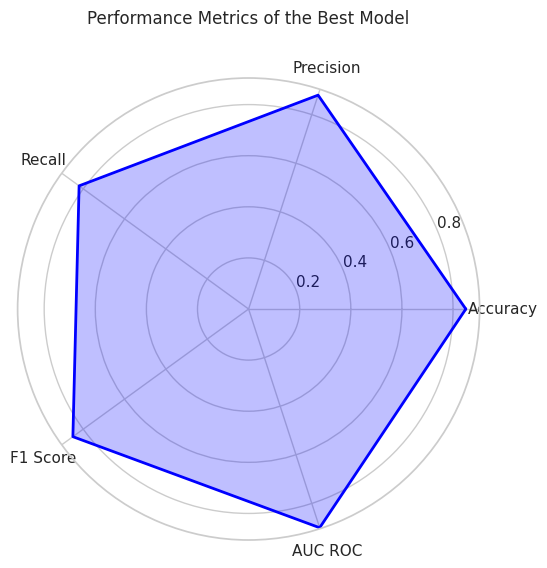

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming best_metrics is a dictionary with metrics
metrics = list(best_metrics.keys())
values = list(best_metrics.values())

# Number of variables we're plotting
num_vars = len(metrics)

# Split the circle and arrange the axes
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
values += values[:1]  # Repeat the first value to close the circle
angles += angles[:1]  # Ensure the graph is circular

# Plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)

# Labels for each point
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)

# Title
ax.set_title('Performance Metrics of the Best Model', y=1.1)

# Show the plot
plt.show()

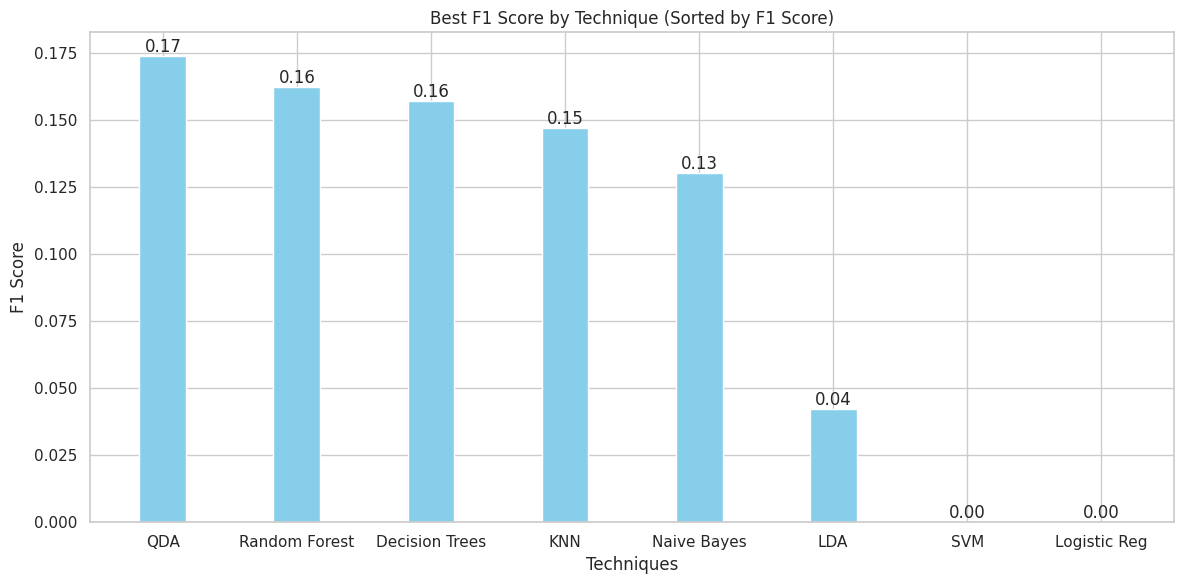

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
techniques = ["KNN", "Naive Bayes", "Decision Trees", "Random Forest", "LDA", "SVM", "Logistic Reg", "QDA"]
best_f1_scores = [knn_grid_search.best_score_, nb_grid_search.best_score_, dt_grid_search.best_score_,
                  best_f1_score, lda_grid_search.best_score_, svm_grid_search.best_score_,
                  logistic_grid_search.best_score_, qda_grid_search.best_score_]

# Pair techniques with their corresponding F1 scores
data_f1 = list(zip(techniques, best_f1_scores))

# Sort the data by F1 Score in descending order
data_f1.sort(key=lambda x: x[1], reverse=True)

# Extract sorted techniques and F1 scores
sorted_techniques_f1, sorted_best_f1_scores = zip(*data_f1)

# Create an array of indices for the techniques
x_f1 = np.arange(len(sorted_techniques_f1))

# Bar width
width_f1 = 0.35

# Create a figure and axis for F1 Score
fig_f1, ax_f1 = plt.subplots(figsize=(12, 6))

# Plot Best F1 Score
ax_f1.bar(x_f1, sorted_best_f1_scores, width_f1, color='skyblue')
# Set axis labels and title for F1 Score
ax_f1.set_xlabel('Techniques')
ax_f1.set_ylabel('F1 Score')
ax_f1.set_title('Best F1 Score by Technique (Sorted by F1 Score)')
ax_f1.set_xticks(x_f1)
ax_f1.set_xticklabels(sorted_techniques_f1)

# Add text labels for F1 Score inside the bars
for i in range(len(sorted_techniques_f1)):
    ax_f1.text(x_f1[i], sorted_best_f1_scores[i], f'{sorted_best_f1_scores[i]:.2f}', ha='center', va='bottom')

# Display the F1 Score chart
plt.tight_layout()
plt.show()

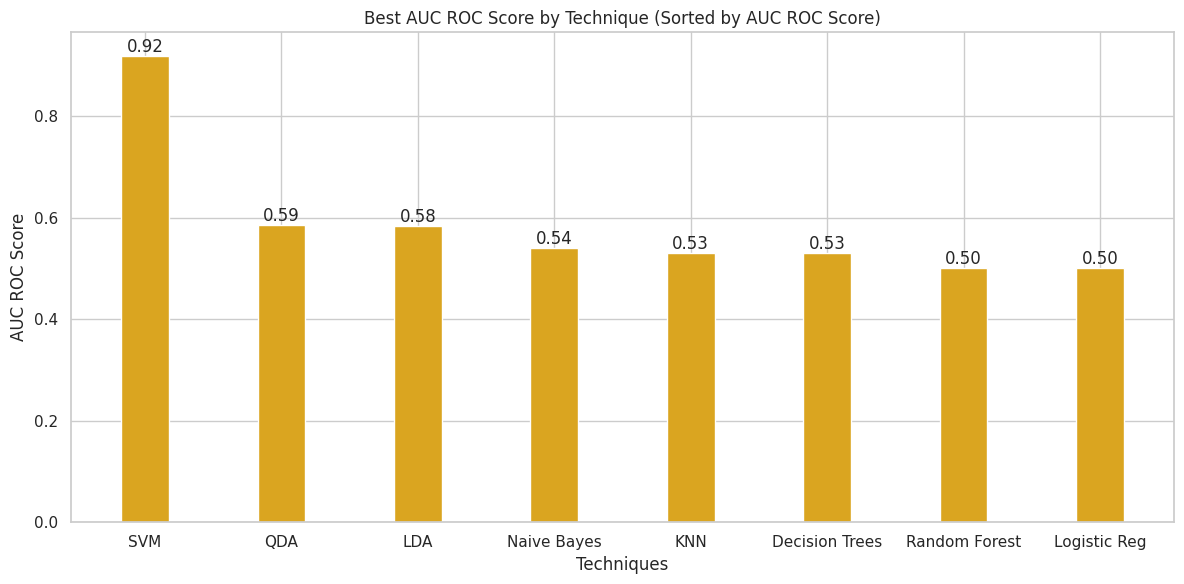

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
techniques = ["KNN", "Naive Bayes", "Decision Trees", "Random Forest", "LDA", "SVM", "Logistic Reg", "QDA"]
best_f1_scores = [knn_grid_search.best_score_, nb_grid_search.best_score_, dt_grid_search.best_score_,
                  best_f1_score, lda_grid_search.best_score_, svm_grid_search.best_score_,
                  logistic_grid_search.best_score_, qda_grid_search.best_score_]




from sklearn.metrics import roc_auc_score

# Load the models (assuming they are already trained and saved)
knn_model = joblib.load('knn_model.pkl')
dt_model = joblib.load('dt_model.pkl')
lda_model = joblib.load('lda_model.pkl')
logistic_model = joblib.load('logistic_model.pkl')
nb_model = joblib.load('nb_model.pkl')
rf_model = joblib.load('rf_model.pkl')
svm_model = joblib.load('svm_model.pkl')
qda_model = joblib.load('qda_model.pkl')


# Generate predictions (assuming you have a test set X_test and y_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_dt =dt_model.predict(X_test)
y_pred_lda = lda_model.predict(X_test)
y_pred_logistic = logistic_model.predict(X_test)
y_pred_nb = nb_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_qda = qda_model.predict(X_test)



# Calculate AUC ROC scores
auc_roc_knn = roc_auc_score(y_test, y_pred_knn)
auc_roc_dt = roc_auc_score(y_test, y_pred_dt)
auc_roc_lda = roc_auc_score(y_test, y_pred_lda)
auc_roc_logistic = roc_auc_score(y_test, y_pred_logistic)
auc_roc_nb  = roc_auc_score(y_test, y_pred_nb  )
auc_roc_rf  = roc_auc_score(y_test, y_pred_rf)
auc_roc_svm = roc_auc_score(y_test, y_pred_svm)
auc_roc_qda = roc_auc_score(y_test, y_pred_qda)

auc_roc_scores = [auc_roc_knn,auc_roc_dt,auc_roc_lda,auc_roc_logistic,auc_roc_nb ,auc_roc_rf,auc_roc_svm ,auc_roc_qda]

# Pair techniques with their corresponding F1 scores and AUC ROC scores
data_f1_auc_roc = list(zip(techniques, best_f1_scores, auc_roc_scores))

# Sort the data by AUC ROC Score in descending order
data_f1_auc_roc.sort(key=lambda x: x[2], reverse=True)

# Extract sorted techniques, F1 scores, and AUC ROC scores
sorted_techniques_auc_roc, sorted_best_f1_scores_auc_roc, sorted_auc_roc_scores = zip(*data_f1_auc_roc)

# Create an array of indices for the techniques
x_auc_roc = np.arange(len(sorted_techniques_auc_roc))

# Bar width
width_auc_roc = 0.35

# Create a figure and axis for AUC ROC Score
fig_auc_roc, ax_auc_roc = plt.subplots(figsize=(12, 6))

# Plot Best AUC ROC Score
ax_auc_roc.bar(x_auc_roc, sorted_auc_roc_scores, width_auc_roc, color='goldenrod')
# Set axis labels and title for AUC ROC Score
ax_auc_roc.set_xlabel('Techniques')
ax_auc_roc.set_ylabel('AUC ROC Score')
ax_auc_roc.set_title('Best AUC ROC Score by Technique (Sorted by AUC ROC Score)')
ax_auc_roc.set_xticks(x_auc_roc)
ax_auc_roc.set_xticklabels(sorted_techniques_auc_roc)

# Add text labels for AUC ROC Score inside the bars
for i in range(len(sorted_techniques_auc_roc)):
    ax_auc_roc.text(x_auc_roc[i], sorted_auc_roc_scores[i], f'{sorted_auc_roc_scores[i]:.2f}', ha='center', va='bottom')

# Display the AUC ROC Score chart
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score

# Define a threshold for positive predictions (adjust as needed)
threshold = 0.5  # You may need to adjust this threshold

# Make predictions using the best model
y_pred_probabilities = best_model.predict_proba(X)[:, 1]

# Scenario (a): Calculate Recall for companies that will go bankrupt (success rate >= 60%)
success_rate_threshold_a = 0.6
y_true_a = (y >= success_rate_threshold_a).astype(int)
y_pred_a = (y_pred_probabilities >= threshold).astype(int)
recall_a = recall_score(y_true_a, y_pred_a)

# Scenario (b): Calculate Precision for companies that will not go bankrupt (success rate >= 70%)
success_rate_threshold_b = 0.7
y_true_b = (y < (1 - success_rate_threshold_b)).astype(int)
y_pred_b = (y_pred_probabilities < threshold).astype(int)
precision_b = precision_score(y_true_b, y_pred_b)

# Check if the conditions are satisfied
condition_a_satisfied = (recall_a >= 0.8)  # You can adjust the desired recall threshold here
condition_b_satisfied = (precision_b >= 0.8)  # You can adjust the desired precision threshold here

# Print results
print("Recall for Scenario (a):", recall_a)
print("Precision for Scenario (b):", precision_b)

# Print whether the conditions are satisfied or not
if condition_a_satisfied:
    print("Scenario (a) is satisfied.")
else:
    print("Scenario (a) is not satisfied.")

if condition_b_satisfied:
    print("Scenario (b) is satisfied.")
else:
    print("Scenario (b) is not satisfied.")


Recall for Scenario (a): 0.29435483870967744
Precision for Scenario (b): 0.9826595323028141
Scenario (a) is not satisfied.
Scenario (b) is satisfied.


Text(0, 0.5, 'Composite Score')

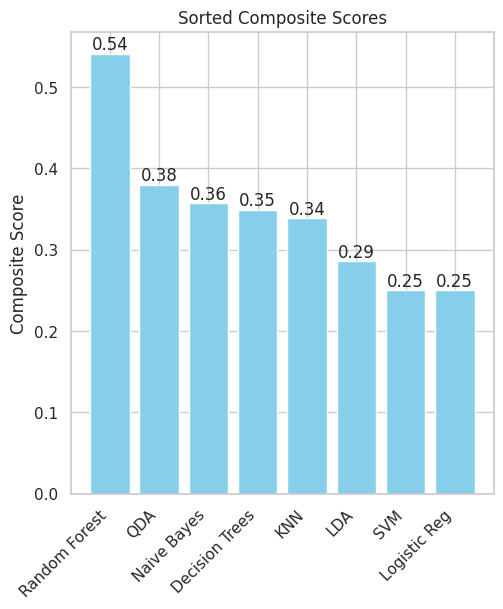

In [ ]:
# Combine techniques and composite scores into pairs - NO STRATIFIED - equal weights
composite_scores = {
    "KNN": 0.5 * best_f1_scores[0] + 0.5 * auc_roc_knn,
    "Naive Bayes": 0.5 * best_f1_scores[1] + 0.5 * auc_roc_nb,
    "Decision Trees": 0.5 * best_f1_scores[2] + 0.5 * auc_roc_dt,
    "Random Forest": 0.5 * best_f1_scores[3] + 0.5 * auc_roc_rf,
    "LDA": 0.5 * best_f1_scores[4] + 0.5 * auc_roc_lda,
    "SVM": 0.5 * best_f1_scores[5] + 0.5 * auc_roc_svm,
    "Logistic Reg": 0.5 * best_f1_scores[6] + 0.5 * auc_roc_logistic,
    "QDA": 0.5 * best_f1_scores[7] + 0.5 * auc_roc_qda
}



# Sort techniques based on composite scores in descending order
sorted_techniques = sorted(composite_scores.keys(), key=lambda x: composite_scores[x], reverse=True)
sorted_composite_scores = [composite_scores[technique] for technique in sorted_techniques]


# Sort F1 scores based on techniques in descending order
sorted_f1_scores = [best_f1_scores[sorted_techniques.index(technique)] for technique in sorted_techniques]

# Create two subplots side by side
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
bars = plt.bar(sorted_techniques, sorted_composite_scores, color='skyblue')
for bar, score in zip(bars, sorted_composite_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score:.2f}', ha='center', va='bottom')
plt.title('Sorted Composite Scores')
# Rotate x-axis labels at a 45-degree angle for better readability
plt.xticks(rotation=45, ha='right')
plt.ylabel('Composite Score')




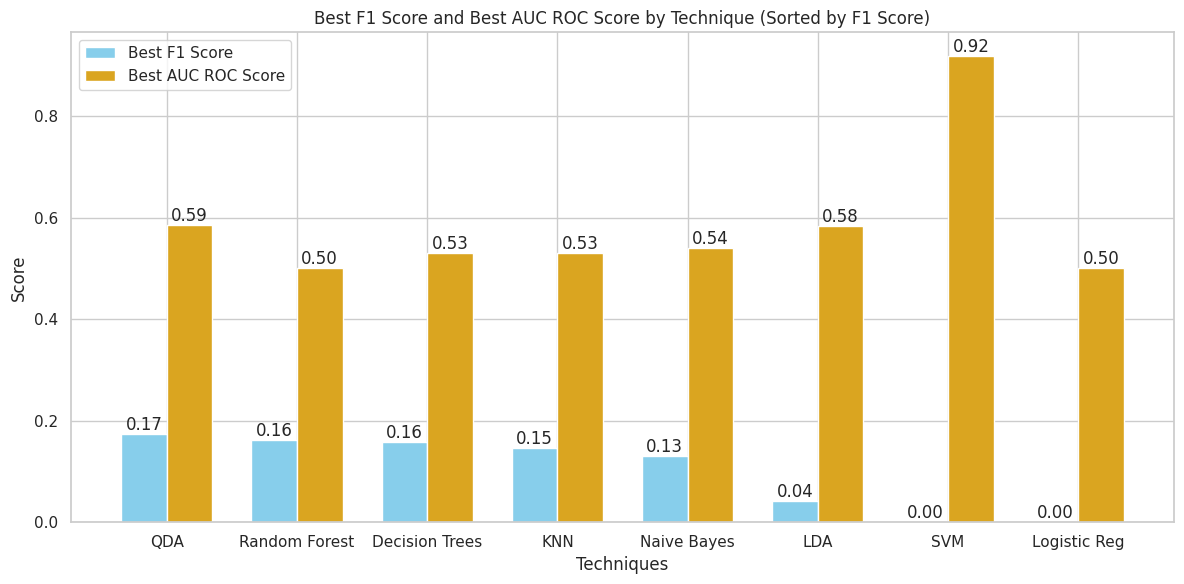

In [ ]:
#F1 SORTED AND AUC ROC SCORES -NO STRATIFIED

import matplotlib.pyplot as plt
import numpy as np

# Data
techniques = ["KNN", "Naive Bayes", "Decision Trees", "Random Forest", "LDA", "SVM", "Logistic Reg", "QDA"]
best_f1_scores = [knn_grid_search.best_score_, nb_grid_search.best_score_, dt_grid_search.best_score_,
                  best_f1_score, lda_grid_search.best_score_, svm_grid_search.best_score_,
                  logistic_grid_search.best_score_, qda_grid_search.best_score_]

from sklearn.metrics import roc_auc_score

# Load the models (assuming they are already trained and saved)
knn_model = joblib.load('knn_model.pkl')
dt_model = joblib.load('dt_model.pkl')
lda_model = joblib.load('lda_model.pkl')
logistic_model = joblib.load('logistic_model.pkl')
nb_model = joblib.load('nb_model.pkl')
rf_model = joblib.load('rf_model.pkl')
svm_model = joblib.load('svm_model.pkl')
qda_model = joblib.load('qda_model.pkl')


# Generate predictions (assuming you have a test set X_test and y_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_dt =dt_model.predict(X_test)
y_pred_lda = lda_model.predict(X_test)
y_pred_logistic = logistic_model.predict(X_test)
y_pred_nb = nb_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_qda = qda_model.predict(X_test)



# Calculate AUC ROC scores
auc_roc_knn = roc_auc_score(y_test, y_pred_knn)
auc_roc_dt = roc_auc_score(y_test, y_pred_dt)
auc_roc_lda = roc_auc_score(y_test, y_pred_lda)
auc_roc_logistic = roc_auc_score(y_test, y_pred_logistic)
auc_roc_nb  = roc_auc_score(y_test, y_pred_nb  )
auc_roc_rf  = roc_auc_score(y_test, y_pred_rf)
auc_roc_svm = roc_auc_score(y_test, y_pred_svm)
auc_roc_qda = roc_auc_score(y_test, y_pred_qda)

best_auc_roc_scores = [auc_roc_knn,auc_roc_dt,auc_roc_lda,auc_roc_logistic,auc_roc_nb ,auc_roc_rf,auc_roc_svm ,auc_roc_qda]

# Pair techniques with their corresponding F1 scores and AUC ROC scores
data = list(zip(techniques, best_f1_scores, best_auc_roc_scores))

# Sort the data by Best F1 Score in descending order
data.sort(key=lambda x: x[1], reverse=True)

# Extract sorted techniques and scores
sorted_techniques, sorted_best_f1_scores, sorted_best_auc_roc_scores = zip(*data)

# Create an array of indices for the techniques
x = np.arange(len(sorted_techniques))

# Bar width
width = 0.35

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot Best F1 Score
ax.bar(x - width/2, sorted_best_f1_scores, width, label='Best F1 Score', color='skyblue')
# Plot Best AUC ROC Score
ax.bar(x + width/2, sorted_best_auc_roc_scores, width, label='Best AUC ROC Score', color='goldenrod')

# Set axis labels and title
ax.set_xlabel('Techniques')
ax.set_ylabel('Score')
ax.set_title('Best F1 Score and Best AUC ROC Score by Technique (Sorted by F1 Score)')
ax.set_xticks(x)
ax.set_xticklabels(sorted_techniques)
ax.legend()

# Add text labels for F1 Score and AUC ROC Score inside the bars
for i in range(len(sorted_techniques)):
    ax.text(x[i] - width/2, sorted_best_f1_scores[i], f'{sorted_best_f1_scores[i]:.2f}', ha='center', va='bottom')
    ax.text(x[i] + width/2, sorted_best_auc_roc_scores[i], f'{sorted_best_auc_roc_scores[i]:.2f}', ha='center', va='bottom')

# Display the combined graph
plt.tight_layout()
plt.show()



In [ ]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score, roc_auc_score
import joblib
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Define the models
models = {
    "best_knn": joblib.load('knn_model.pkl'),
    "best_naive_bayes": joblib.load('nb_model.pkl'),
    "best_decision_tree": joblib.load('dt_model.pkl'),
    "best_random_forest": joblib.load('rf_model.pkl'),
    "best_lda": joblib.load('lda_model.pkl'),
    "best_svm": joblib.load('svm_model.pkl'),
    "best_logistic": joblib.load('logistic_model.pkl'),
    "best_qda":joblib.load('qda_model.pkl'),

}

# Define the cross-validation strategy
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# Define a function to calculate the composite score
def calculate_composite_score(f1_score, auc_roc_score, f1_weight=0.6, auc_roc_weight=0.4):
    return (f1_weight * f1_score) + (auc_roc_weight * auc_roc_score)

# Initialize a DataFrame to store the scores
score_data = pd.DataFrame(columns=['Model', 'Metric', 'Value'])

# Iterate through models and calculate their scores
for model_name, model in models.items():
    # Calculate the mean F1 Score using cross-validation
    f1_scores = cross_val_score(model, X, y, cv=skf, scoring=make_scorer(f1_score))
    mean_f1_score = f1_scores.mean()

    # Calculate the mean AUC ROC Score using cross-validation
    auc_roc_scores = cross_val_score(model, X, y, cv=skf, scoring=make_scorer(roc_auc_score))
    mean_auc_roc_score = auc_roc_scores.mean()

    # Calculate the composite score
    composite_score = calculate_composite_score(mean_f1_score, mean_auc_roc_score)

    # Append the scores to the DataFrame
    score_data = score_data.append([
        {'Model': model_name, 'Metric': 'F1 Score', 'Value': mean_f1_score},
        {'Model': model_name, 'Metric': 'AUC ROC Score', 'Value': mean_auc_roc_score},
        {'Model': model_name, 'Metric': 'Composite Score', 'Value': composite_score}
    ], ignore_index=True)

# Sort each metric's scores separately
sorted_data = pd.concat([
    score_data[score_data['Metric'] == 'Composite Score'].sort_values(by='Value', ascending=False),
    score_data[score_data['Metric'] == 'F1 Score'].sort_values(by='Value', ascending=False),
    score_data[score_data['Metric'] == 'AUC ROC Score'].sort_values(by='Value', ascending=False)
])




<ipython-input-159-147c78e18b0b>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_data = score_data.append([
<ipython-input-159-147c78e18b0b>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_data = score_data.append([
<ipython-input-159-147c78e18b0b>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_data = score_data.append([
<ipython-input-159-147c78e18b0b>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_data = score_data.append([
<ipython-input-159-147c78e18b0b>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_da

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

<ipython-input-159-147c78e18b0b>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_data = score_data.append([
<ipython-input-159-147c78e18b0b>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_data = score_data.append([
<ipython-input-159-147c78e18b0b>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_data = score_data.append([


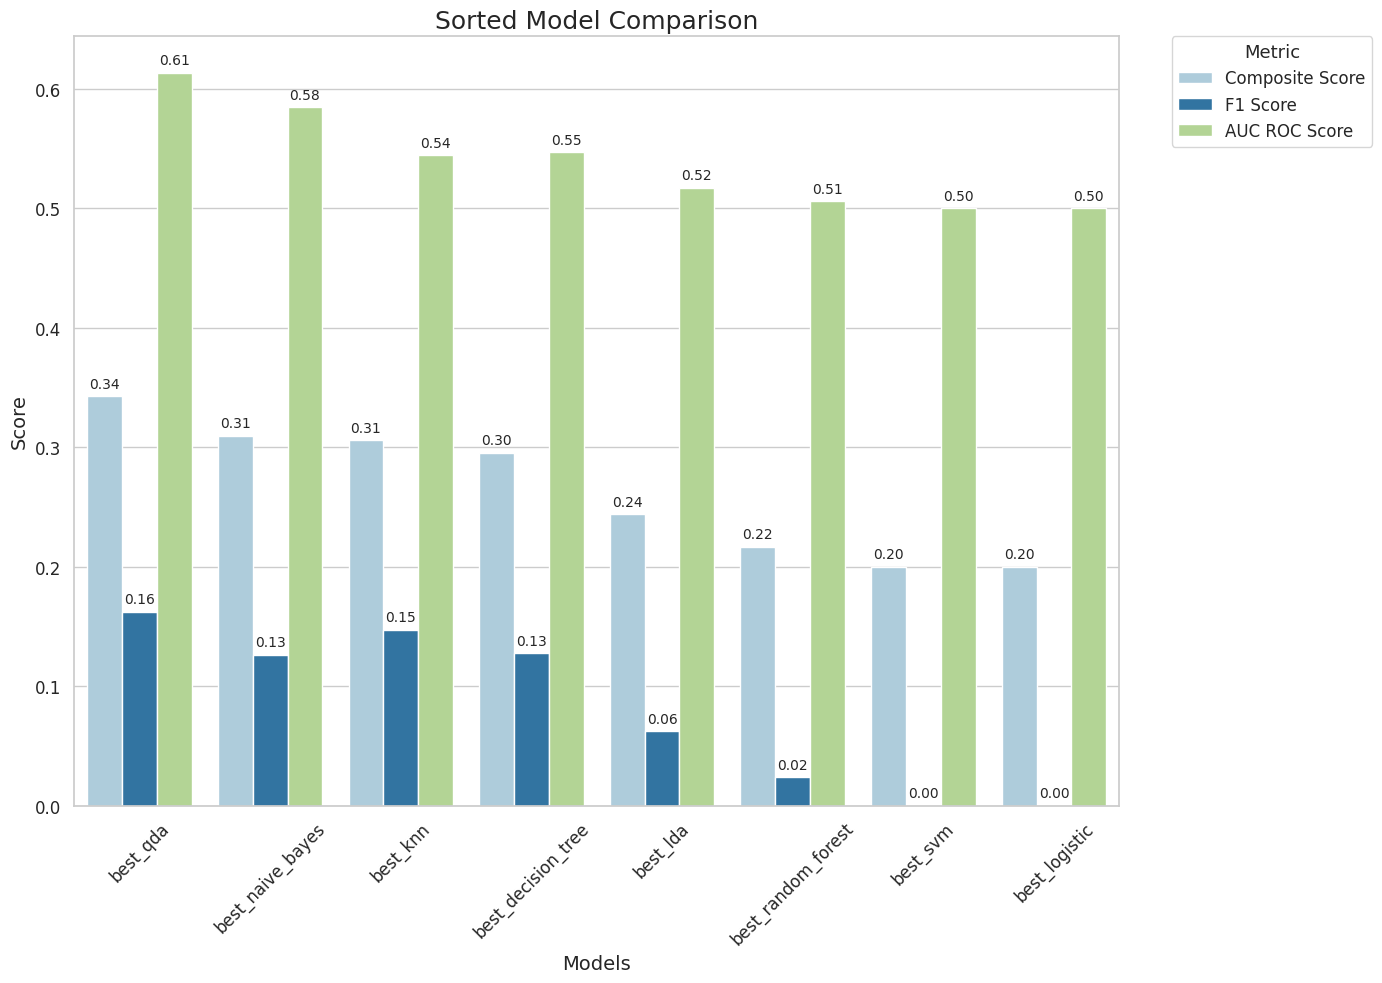

In [ ]:
# Improved plotting
plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")  # Sets the style of the plot
palette = sns.color_palette("Paired")  # Change to your preferred palette

sns.barplot(x='Model', y='Value', hue='Metric', data=sorted_data, palette=palette)
plt.title('Sorted Model Comparison', fontsize=18)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Metric', title_fontsize='13', fontsize='12', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Enhanced annotations
ax = plt.gca()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=10)

plt.tight_layout()
plt.show()

[LibSVM][LibSVM][LibSVM][LibSVM]

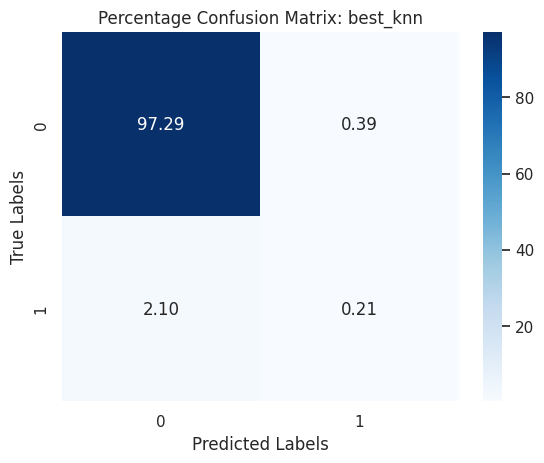

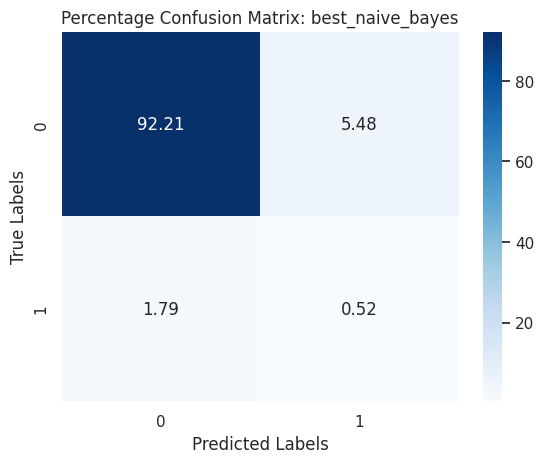

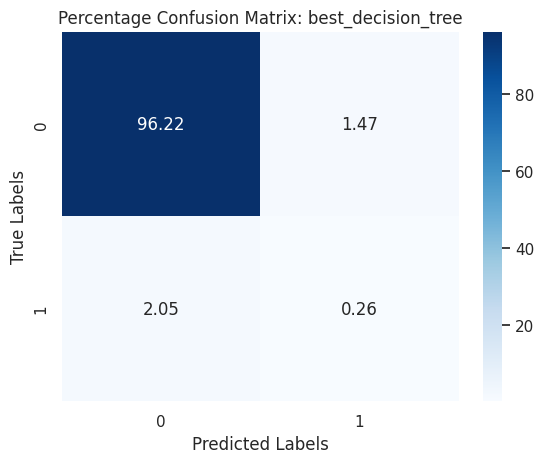

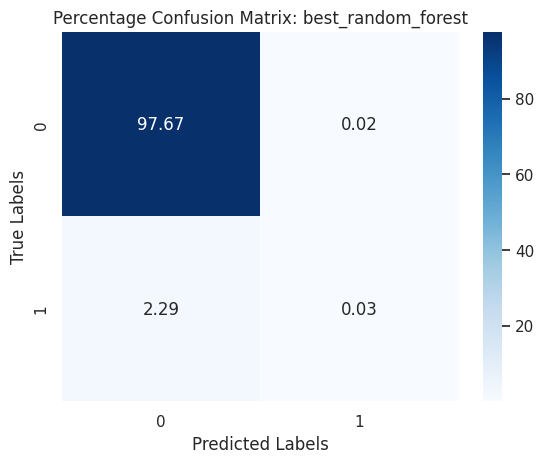

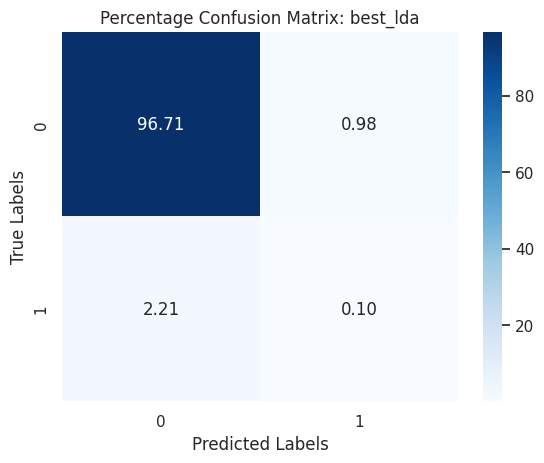

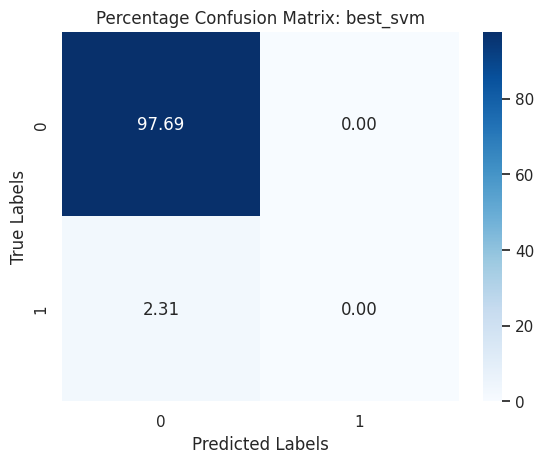

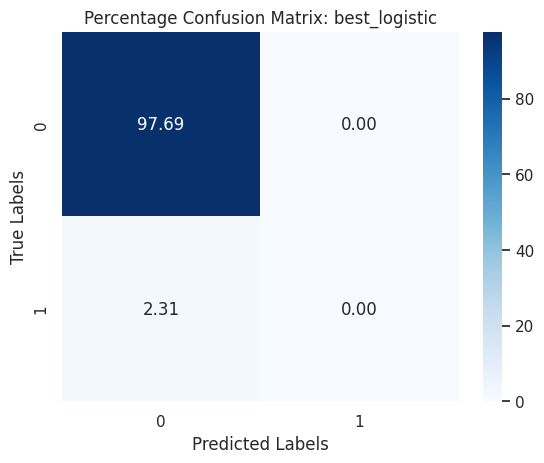

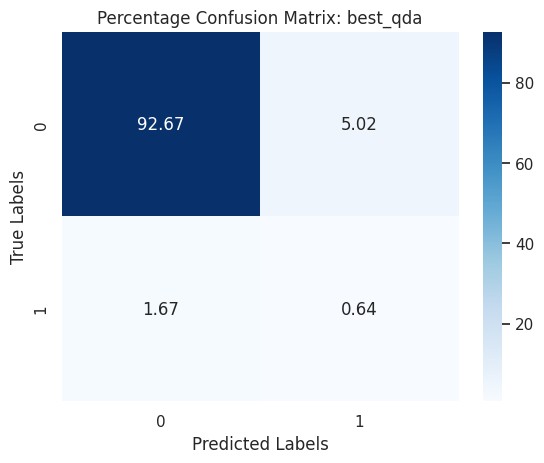

In [ ]:
import joblib
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy as np


# Load the trained models
# Define the models
models = {
    "best_knn": joblib.load('knn_model.pkl'),
    "best_naive_bayes": joblib.load('nb_model.pkl'),
    "best_decision_tree": joblib.load('dt_model.pkl'),
    "best_random_forest": joblib.load('rf_model.pkl'),
    "best_lda": joblib.load('lda_model.pkl'),
    "best_svm": joblib.load('svm_model.pkl'),
    "best_logistic": joblib.load('logistic_model.pkl'),
    "best_qda":joblib.load('qda_model.pkl'),

}

# Load the evaluation metrics (assuming you have them saved)
metrics = {
    "knn_metrics": joblib.load('knn_metrics.pkl'),
    "naive_bayes_metrics": joblib.load('nb_metrics.pkl'),
    "decision_trees_metrics":joblib.load('dt_metrics.pkl'),
     "lda_metrics":joblib.load('lda_metrics.pkl'),
     "random_forests_metrics":joblib.load('rf_metrics.pkl'),
     "svm_metrics":joblib.load('svm_metrics.pkl'),
     "logistic_reg_metrics":joblib.load('logistic_metrics.pkl'),
     "qda_metrics":joblib.load('qda_metrics.pkl'),
}




skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)



# Initialize a dictionary to store confusion matrices for each model
model_confusion_matrices = {name: [] for name in models.keys()}

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        model_confusion_matrices[model_name].append(cm)



# Sum up the confusion matrices from each fold for each model
cumulative_confusion_matrices = {}

for model_name, matrices in model_confusion_matrices.items():
    # Sum the confusion matrices element-wise
    cumulative_cm = np.sum(matrices, axis=0)
    cumulative_confusion_matrices[model_name] = cumulative_cm


# Convert cumulative confusion matrices to percentages
percentage_confusion_matrices = {}

for model_name, cm in cumulative_confusion_matrices.items():
    total = np.sum(cm)
    percentage_cm = (cm / total) * 100  # Convert to percentage
    percentage_confusion_matrices[model_name] = percentage_cm


for model_name, cm in percentage_confusion_matrices.items():
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Percentage Confusion Matrix: {model_name}')
    plt.show()


In [ ]:
# Assuming you have similar DataFrames for other models: df_knn, df_dt, df_rf, etc.
# Let's say results_df is for Naive Bayes

# List of all individual model DataFrames
all_model_dfs = [df_knn, df_dt, df_rf, df_nb, df_lda, df_svm, df_logistic, df_qda]  # Add all model DataFrames here

# Concatenate all DataFrames into a single DataFrame
final_results_df = pd.concat(all_model_dfs)

# Reset index if necessary
final_results_df.reset_index(drop=True, inplace=True)


# Save the aggregated DataFrame to a CSV file
final_results_df.to_csv('balancedDataOutcomes.csv', index=False)


In [ ]:
data = pd.read_excel('balancedDataOutcomes.csv')

# Display the first rows  to understand our structure
data.head()

ValueError: ignored